<h1 style="font-family: 'Arial Rounded MT Bold', Arial, sans-serif; 
           color: #be6d02ff; 
           text-align: left; 
           font-size: 40px;">
<b>Coffee Sales Analysis</b>
</h1>


# <u>***Importing Required Libraries***</u>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
# pd.reset_option('all')

df = pd.read_csv('CoffeeSales.csv')
df

hour_of_day cash_type  money    coffee_name Time_of_Day Weekday  \
0              10      card  38.70          Latte     Morning     Fri   
1              12      card  38.70  Hot Chocolate   Afternoon     Fri   
2              12      card  38.70  Hot Chocolate   Afternoon     Fri   
3              13      card  28.90      Americano   Afternoon     Fri   
4              13      card  38.70          Latte   Afternoon     Fri   
...           ...       ...    ...            ...         ...     ...   
3542           10      card  35.76     Cappuccino     Morning     Sun   
3543           14      card  35.76          Cocoa   Afternoon     Sun   
3544           14      card  35.76          Cocoa   Afternoon     Sun   
3545           15      card  25.96      Americano   Afternoon     Sun   
3546           18      card  35.76          Latte       Night     Sun   

     Month_name  Weekdaysort  Monthsort        Date             Time  
0           Mar            5          3  2024-03-01  10:15:50.520000  
1           Mar            5          3  2024-03-01  12:19:22.539000  
2           Mar            5          3  2024-03-01  12:20:18.089000  
3           Mar            5          3  2024-03-01  13:46:33.006000  
4           Mar            5          3  2024-03-01  13:48:14.626000  
...         ...          ...        ...         ...              ...  
3542        Mar            7          3  2025-03-23  10:34:54.894000  
3543        Mar            7          3  2025-03-23  14:43:37.362000  
3544        Mar            7          3  2025-03-23  14:44:16.864000  
3545        Mar            7          3  2025-03-23  15:47:28.723000  
3546        Mar            7          3  2025-03-23  18:11:38.635000  

[3547 rows x 11 columns]

# <u>***Data Inspection***</u>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


> ### ***We can see that the dataset does not contain any data type errors.***

### ◉ *Checking Null Values :*

In [4]:
df.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

> ### ***There is no null value in whole dataset***

### ◉ *Checking Statistical summary of dataset :*

In [5]:
df.describe()

hour_of_day        money  Weekdaysort    Monthsort
count  3547.000000  3547.000000  3547.000000  3547.000000
mean     14.185791    31.645216     3.845785     6.453905
std       4.234010     4.877754     1.971501     3.500754
min       6.000000    18.120000     1.000000     1.000000
25%      10.000000    27.920000     2.000000     3.000000
50%      14.000000    32.820000     4.000000     7.000000
75%      18.000000    35.760000     6.000000    10.000000
max      22.000000    38.700000     7.000000    12.000000

### ◉ *Check that data frame does not contain exact same rows :*

In [6]:
df.duplicated().sum()

np.int64(0)

> ### ***There is no duplicated row in dataset.***
> ### ***We are ready to go — no further data cleaning is needed.***

# <u>***Visualizing Dataset Insights***</u>

## ***A. Sales Performance Analysis :***

### ◉ *What is the total revenue generated from coffee sales?*

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
yr = df.groupby('year')['money'].sum().reset_index() # yearly_revenue
yr



year     money
0  2024  82644.80
1  2025  29600.78

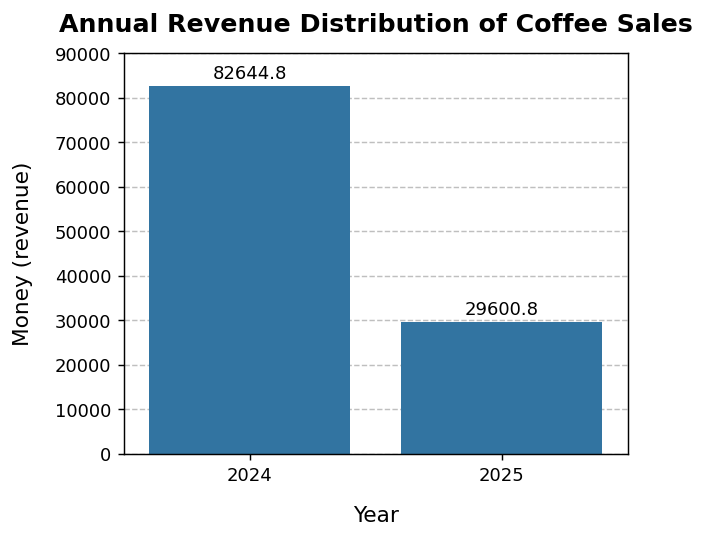

'Total Revenue of 2 Years :112245.58'

In [8]:
plt.figure(figsize=(5,4),dpi=130)
ax=sns.barplot(x='year',y='money',data=yr)
ax.bar_label(ax.containers[0],padding=2)
plt.ylabel('Money (revenue)',fontsize=12,labelpad=12)
plt.xlabel('Year',fontsize=12,labelpad=12)
plt.title('Annual Revenue Distribution of Coffee Sales', fontsize=14,fontweight='bold',pad=12)
ax.yaxis.grid(True, linestyle="--", alpha=0.8)
ax.set_axisbelow(True)
plt.ylim(0,90000)
plt.show()
f"Total Revenue of 2 Years :{yr['money'].sum()}"

> ### ***The revenue of year 2024 is 82,644.80, revenue of year 2025 is 29,600.78, and the combined revenue of both years is 112,245.58.***


### ◉ *What is the average sale amount per transaction?*

In [9]:
average_sale = df['money'].mean()
f"Average sale per transaction: {average_sale:.2f}"

'Average sale per transaction: 31.65'

> ### ***Average sale per transaction is 31.65***

### ◉ *Which coffee type generates the most revenue?*


In [10]:
cn=df.groupby(['coffee_name','year'])['money'].sum().reset_index()
cn

coffee_name  year     money
0             Americano  2024   8316.02
1             Americano  2025   6334.24
2   Americano with Milk  2024  18918.58
3   Americano with Milk  2025   5832.54
4            Cappuccino  2024  13076.42
5            Cappuccino  2025   4362.72
6                 Cocoa  2024   4945.16
7                 Cocoa  2025   3576.00
8               Cortado  2024   6502.22
9               Cortado  2025    882.64
10             Espresso  2024   2016.36
11             Espresso  2025    673.92
12        Hot Chocolate  2024   7430.26
13        Hot Chocolate  2025   2503.20
14                Latte  2024  21439.78
15                Latte  2025   5435.52

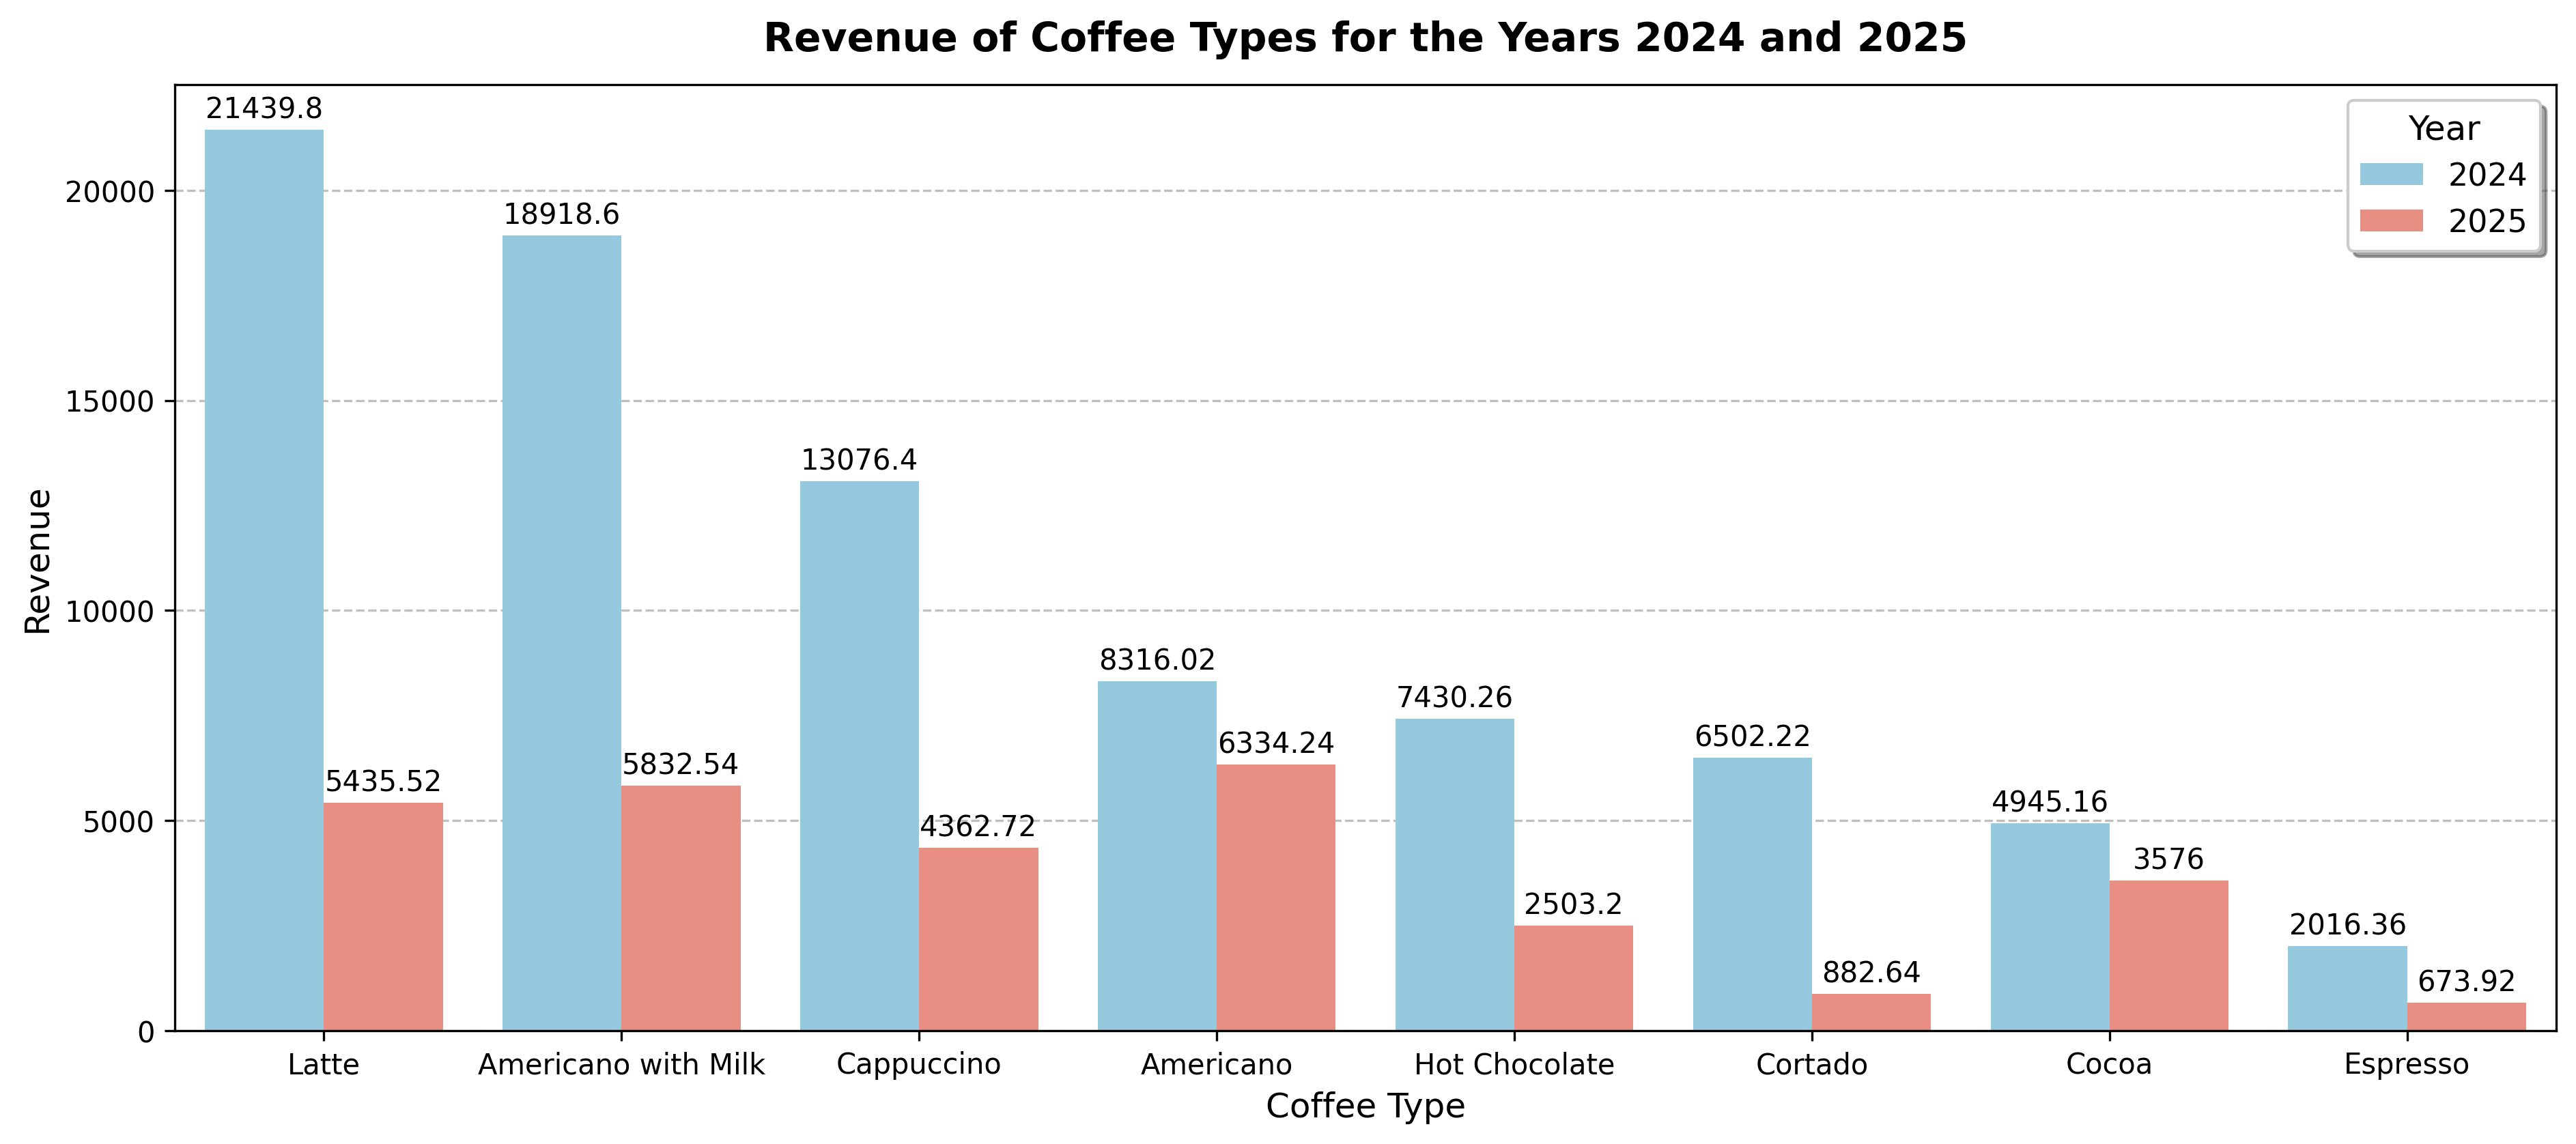

In [11]:
plt.figure(figsize=(15,6),dpi=300)
cn = cn.sort_values(by='money', ascending=False)
ax=sns.barplot(x='coffee_name',y='money',data=cn , hue='year', palette={2024: 'skyblue', 2025: 'salmon'})
ax.bar_label(ax.containers[0],padding=2)
ax.bar_label(ax.containers[1],padding=2)
plt.title('Revenue of Coffee Types for the Years 2024 and 2025', fontsize=14, fontweight='bold',pad=12)
plt.xlabel("Coffee Type", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
ax.legend(title='Year', title_fontsize=12, fontsize=11, loc='upper right', frameon=True, shadow=True)
ax.yaxis.grid(True, linestyle="--", alpha=0.8)
ax.set_axisbelow(True)
plt.show()

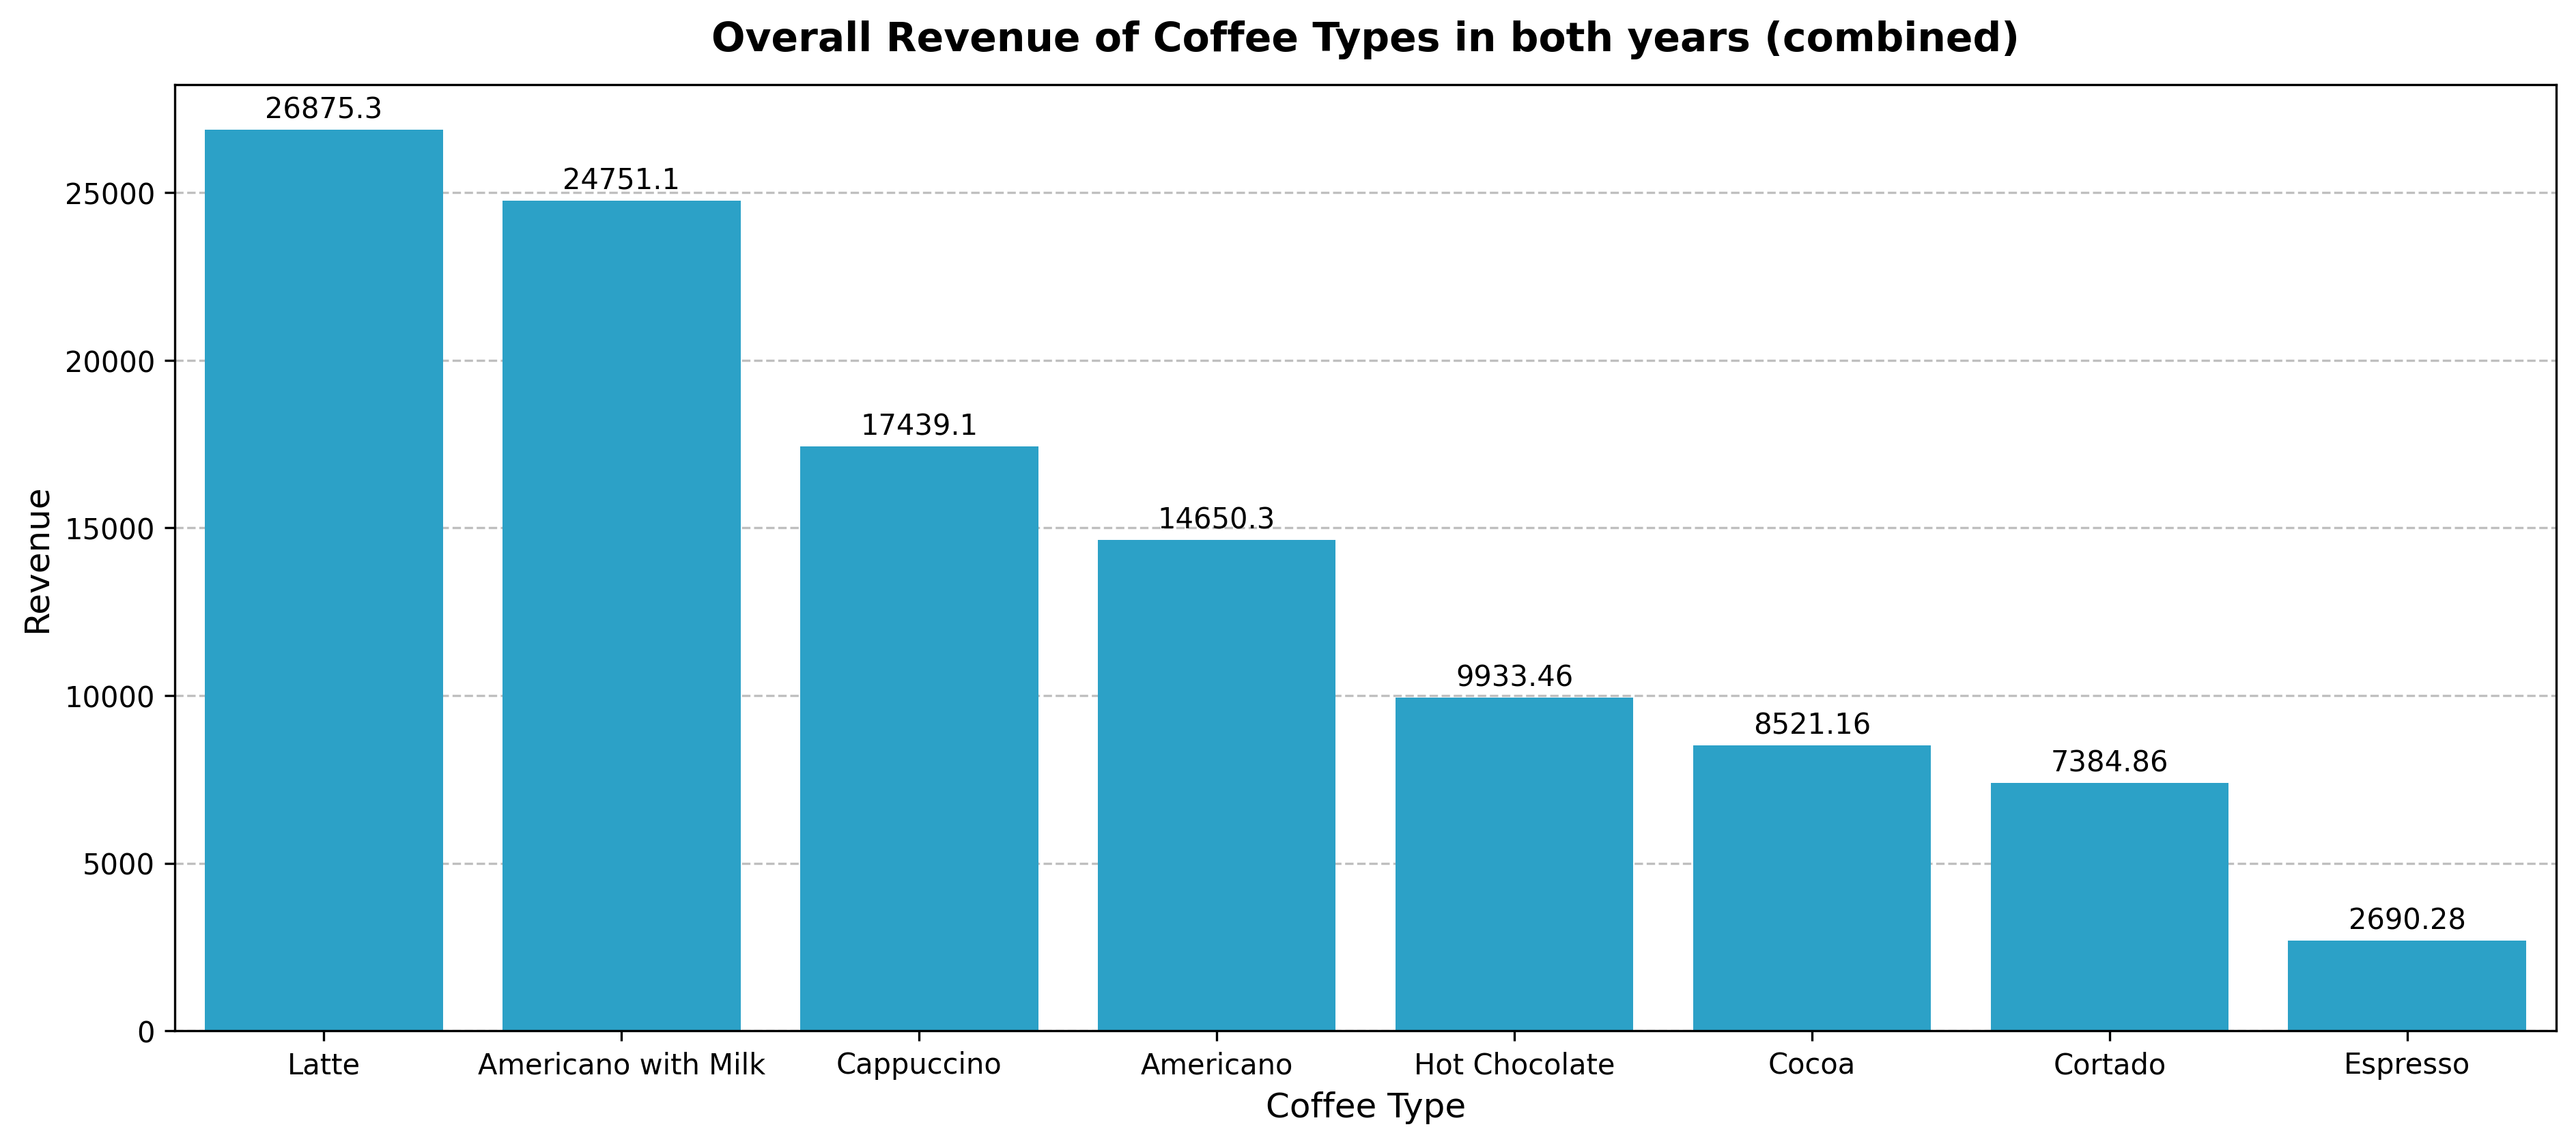

coffee_name     money
7                Latte  26875.30
1  Americano with Milk  24751.12
2           Cappuccino  17439.14
0            Americano  14650.26
6        Hot Chocolate   9933.46
3                Cocoa   8521.16
4              Cortado   7384.86
5             Espresso   2690.28

In [12]:
ocn=df.groupby('coffee_name')['money'].sum().reset_index()
ocn = ocn.sort_values(by='money', ascending=False)
plt.figure(figsize=(15,6),dpi=300)
ax=sns.barplot(x='coffee_name',y='money',data=ocn,color='#12aee1ff')
ax.bar_label(ax.containers[0],padding=2)
plt.title('Overall Revenue of Coffee Types in both years (combined)', fontsize=14, fontweight='bold',pad=12)
plt.xlabel("Coffee Type", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
ax.yaxis.grid(True, linestyle="--", alpha=0.8)
ax.set_axisbelow(True)
plt.show()
ocn

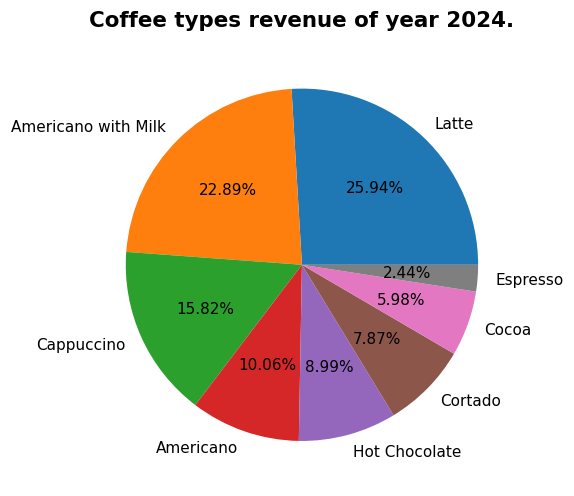

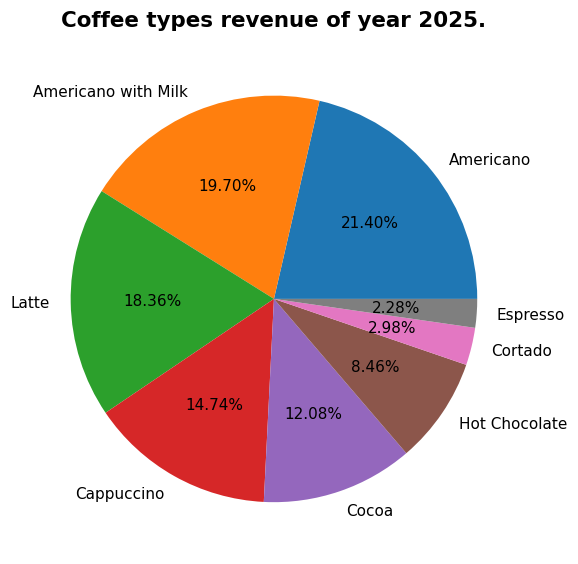

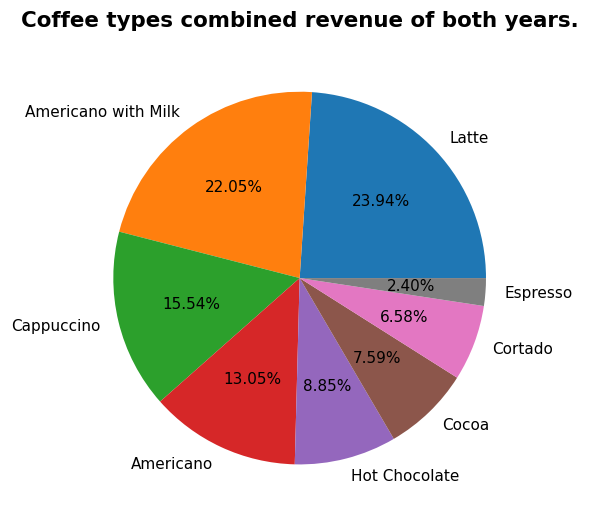

In [13]:

plt.figure(figsize= (5.2,5.2),dpi=110)
ocn1 = cn.groupby(['year','coffee_name'])['money'].sum().reset_index()[0:8].sort_values(by='money',ascending=False)
plt.pie(ocn1['money'], labels= ocn1['coffee_name'] ,autopct = "%1.2f%%")
plt.title('Coffee types revenue of year 2024.', fontsize=14, fontweight='bold', pad=12)
plt.show()

plt.figure(figsize= (6,6),dpi=110)
ocn2 = cn.groupby(['year','coffee_name'])['money'].sum().reset_index()[8:16].sort_values(by='money',ascending=False)
plt.pie(ocn2['money'], labels= ocn2['coffee_name'] ,autopct = "%1.2f%%")
plt.title('Coffee types revenue of year 2025.', fontsize=14, fontweight='bold', pad=12)
plt.show()

plt.figure(figsize= (5.5,5.5),dpi=110)
plt.pie(ocn['money'], labels= ocn['coffee_name'] ,autopct = "%1.2f%%")
plt.title('Coffee types combined revenue of both years.', fontsize=14, fontweight='bold', pad=12)
plt.show() 

> ### ***Latte is the top revenue-generating coffee type in 2024, while Americano leads in 2025; however, when combining revenue from both years, Latte emerges as the overall top earner.***

### ◉ *Which coffee type is sold the most (quantity)?*

In [14]:
ct=df.groupby('coffee_name')['year'].value_counts().reset_index()
ct


coffee_name  year  count
0             Americano  2024    320
1             Americano  2025    244
2   Americano with Milk  2024    620
3   Americano with Milk  2025    189
4            Cappuccino  2024    364
5            Cappuccino  2025    122
6                 Cocoa  2024    139
7                 Cocoa  2025    100
8               Cortado  2024    253
9               Cortado  2025     34
10             Espresso  2024     97
11             Espresso  2025     32
12        Hot Chocolate  2024    206
13        Hot Chocolate  2025     70
14                Latte  2024    605
15                Latte  2025    152

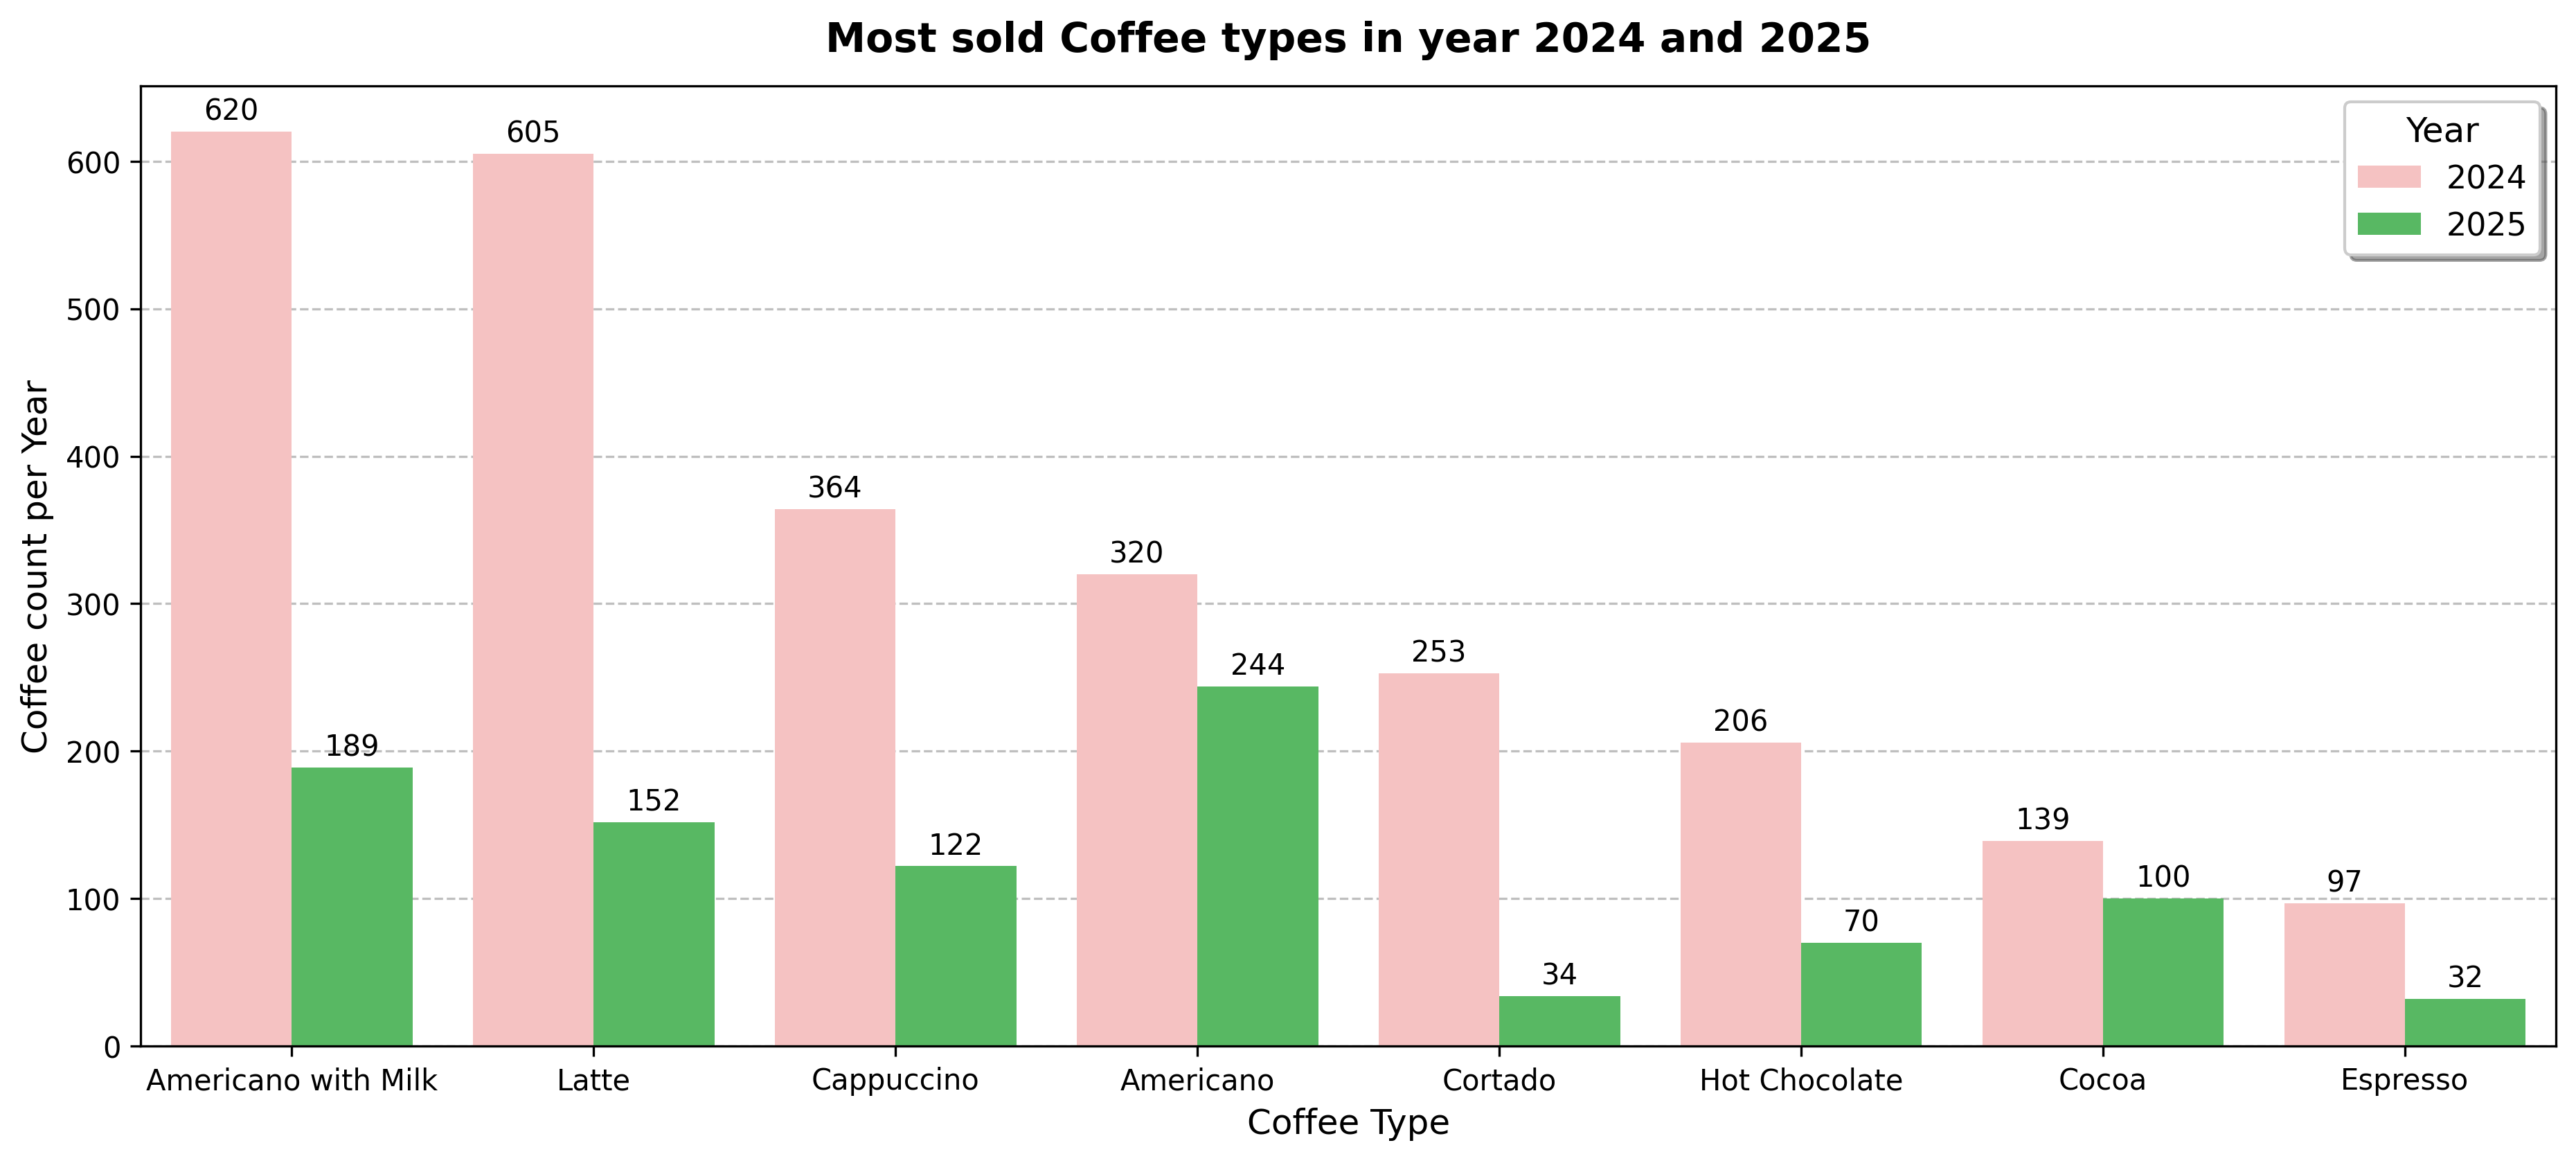

In [15]:
plt.figure(figsize=(15,6),dpi=300)
ct = ct.sort_values(by='count', ascending=False)
ax=sns.barplot(x='coffee_name',y='count',data=ct,hue='year',palette={2024: "#feb9b9", 2025: "#48c857"})
ax.bar_label(ax.containers[0],padding=2)
ax.bar_label(ax.containers[1],padding=2)
plt.title('Most sold Coffee types in year 2024 and 2025', fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Coffee Type", fontsize=12)
plt.ylabel("Coffee count per Year", fontsize=12)
ax.legend(title='Year', title_fontsize=12, fontsize=11, loc='upper right', frameon=True, shadow=True)
ax.yaxis.grid(True, linestyle="--", alpha=0.8)
ax.set_axisbelow(True)
plt.show()

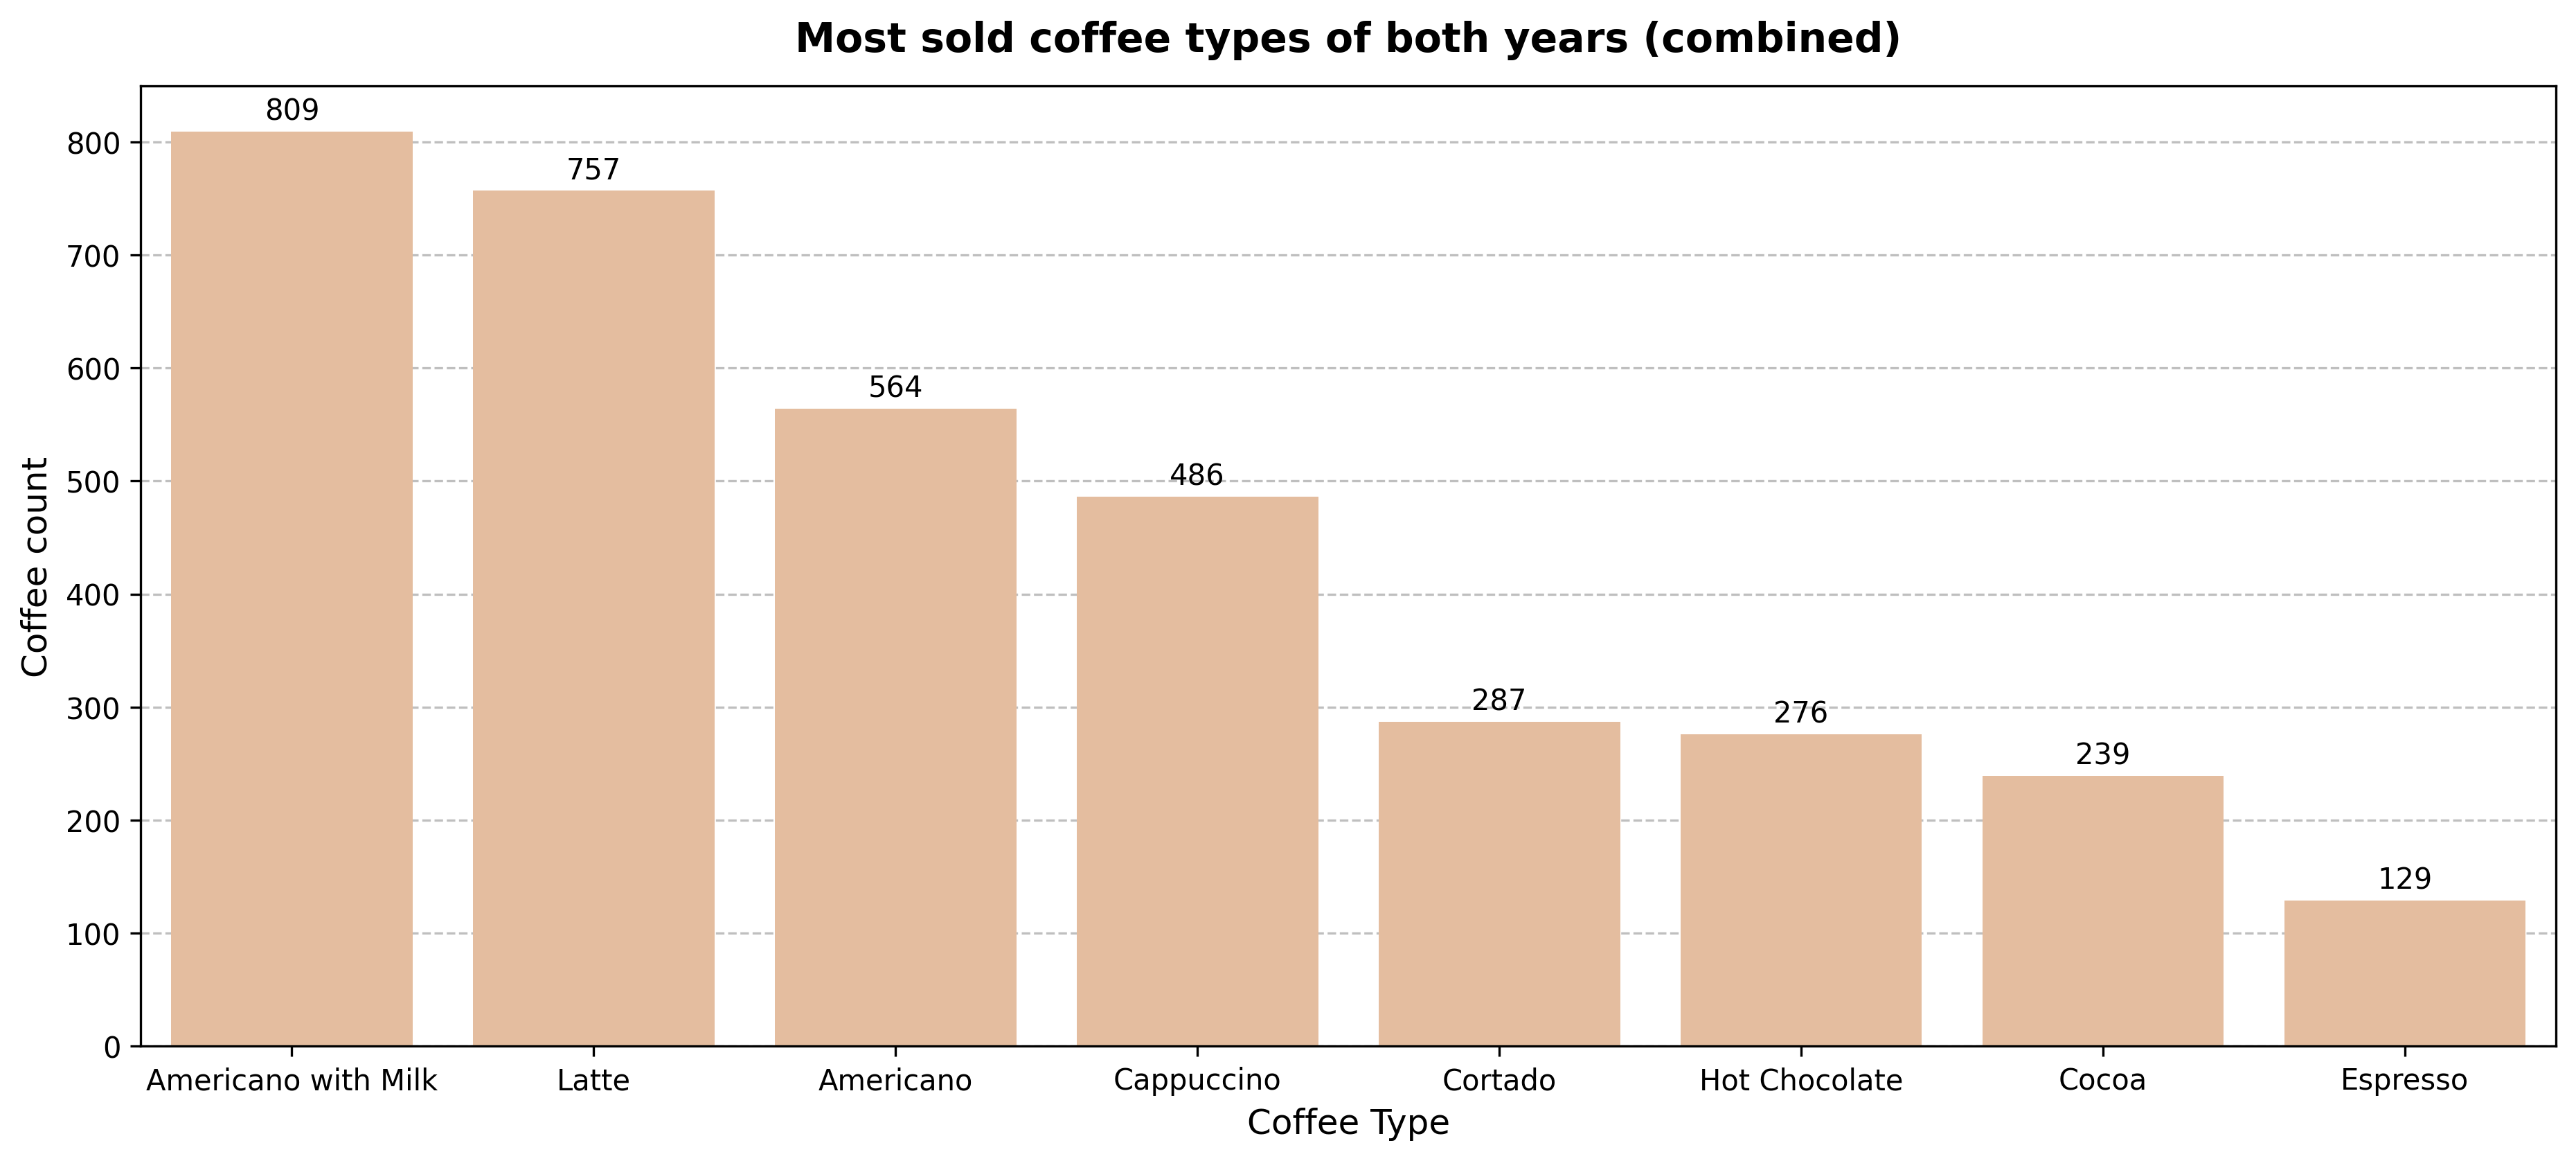

coffee_name  count
0  Americano with Milk    809
1                Latte    757
2            Americano    564
3           Cappuccino    486
4              Cortado    287
5        Hot Chocolate    276
6                Cocoa    239
7             Espresso    129

In [16]:
oct=df['coffee_name'].value_counts().reset_index()
plt.figure(figsize=(15,6),dpi=300)
ax=sns.barplot(x='coffee_name',y='count',data=oct,color="#F0BB93FF")
ax.bar_label(ax.containers[0],padding=2)
plt.title('Most sold coffee types of both years (combined)', fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Coffee Type", fontsize=12)
plt.ylabel("Coffee count", fontsize=12)
ax.yaxis.grid(True, linestyle="--", alpha=0.8)
ax.set_axisbelow(True)
plt.show()
oct


> ### ***In the category of most sold coffee 'Americano with Milk' ranks highest in 2024, and in 2025 'Americano' ranks highest among all.***
> ### ***However, if we combine the sales from both years, it is clear that 'Americano with Milk' was sold in greater quantity overall.***

### ◉ *What is the least popular coffee type?*

> ### ***Based on the Coffee Sold Quantity analysis, 'Espresso' stands out as the least popular coffee type across both 2024 and 2025.***

### ◉ *Which coffee brings in the highest average price?*

In [17]:
cfd = df.groupby(['coffee_name', 'year']).agg(money=('money', 'sum'),count=('coffee_name', 'count')).reset_index()
cfd['average_price']= cfd['money'] / cfd['count']
cfd.sort_values(by=['year','average_price'],inplace=True,ascending=False)
cfd

coffee_name  year     money  count  average_price
5            Cappuccino  2025   4362.72    122      35.760000
7                 Cocoa  2025   3576.00    100      35.760000
13        Hot Chocolate  2025   2503.20     70      35.760000
15                Latte  2025   5435.52    152      35.760000
3   Americano with Milk  2025   5832.54    189      30.860000
1             Americano  2025   6334.24    244      25.960000
9               Cortado  2025    882.64     34      25.960000
11             Espresso  2025    673.92     32      21.060000
12        Hot Chocolate  2024   7430.26    206      36.069223
4            Cappuccino  2024  13076.42    364      35.924231
6                 Cocoa  2024   4945.16    139      35.576691
14                Latte  2024  21439.78    605      35.437653
2   Americano with Milk  2024  18918.58    620      30.513839
0             Americano  2024   8316.02    320      25.987563
8               Cortado  2024   6502.22    253      25.700474
10             Espresso  2024   2016.36     97      20.787216

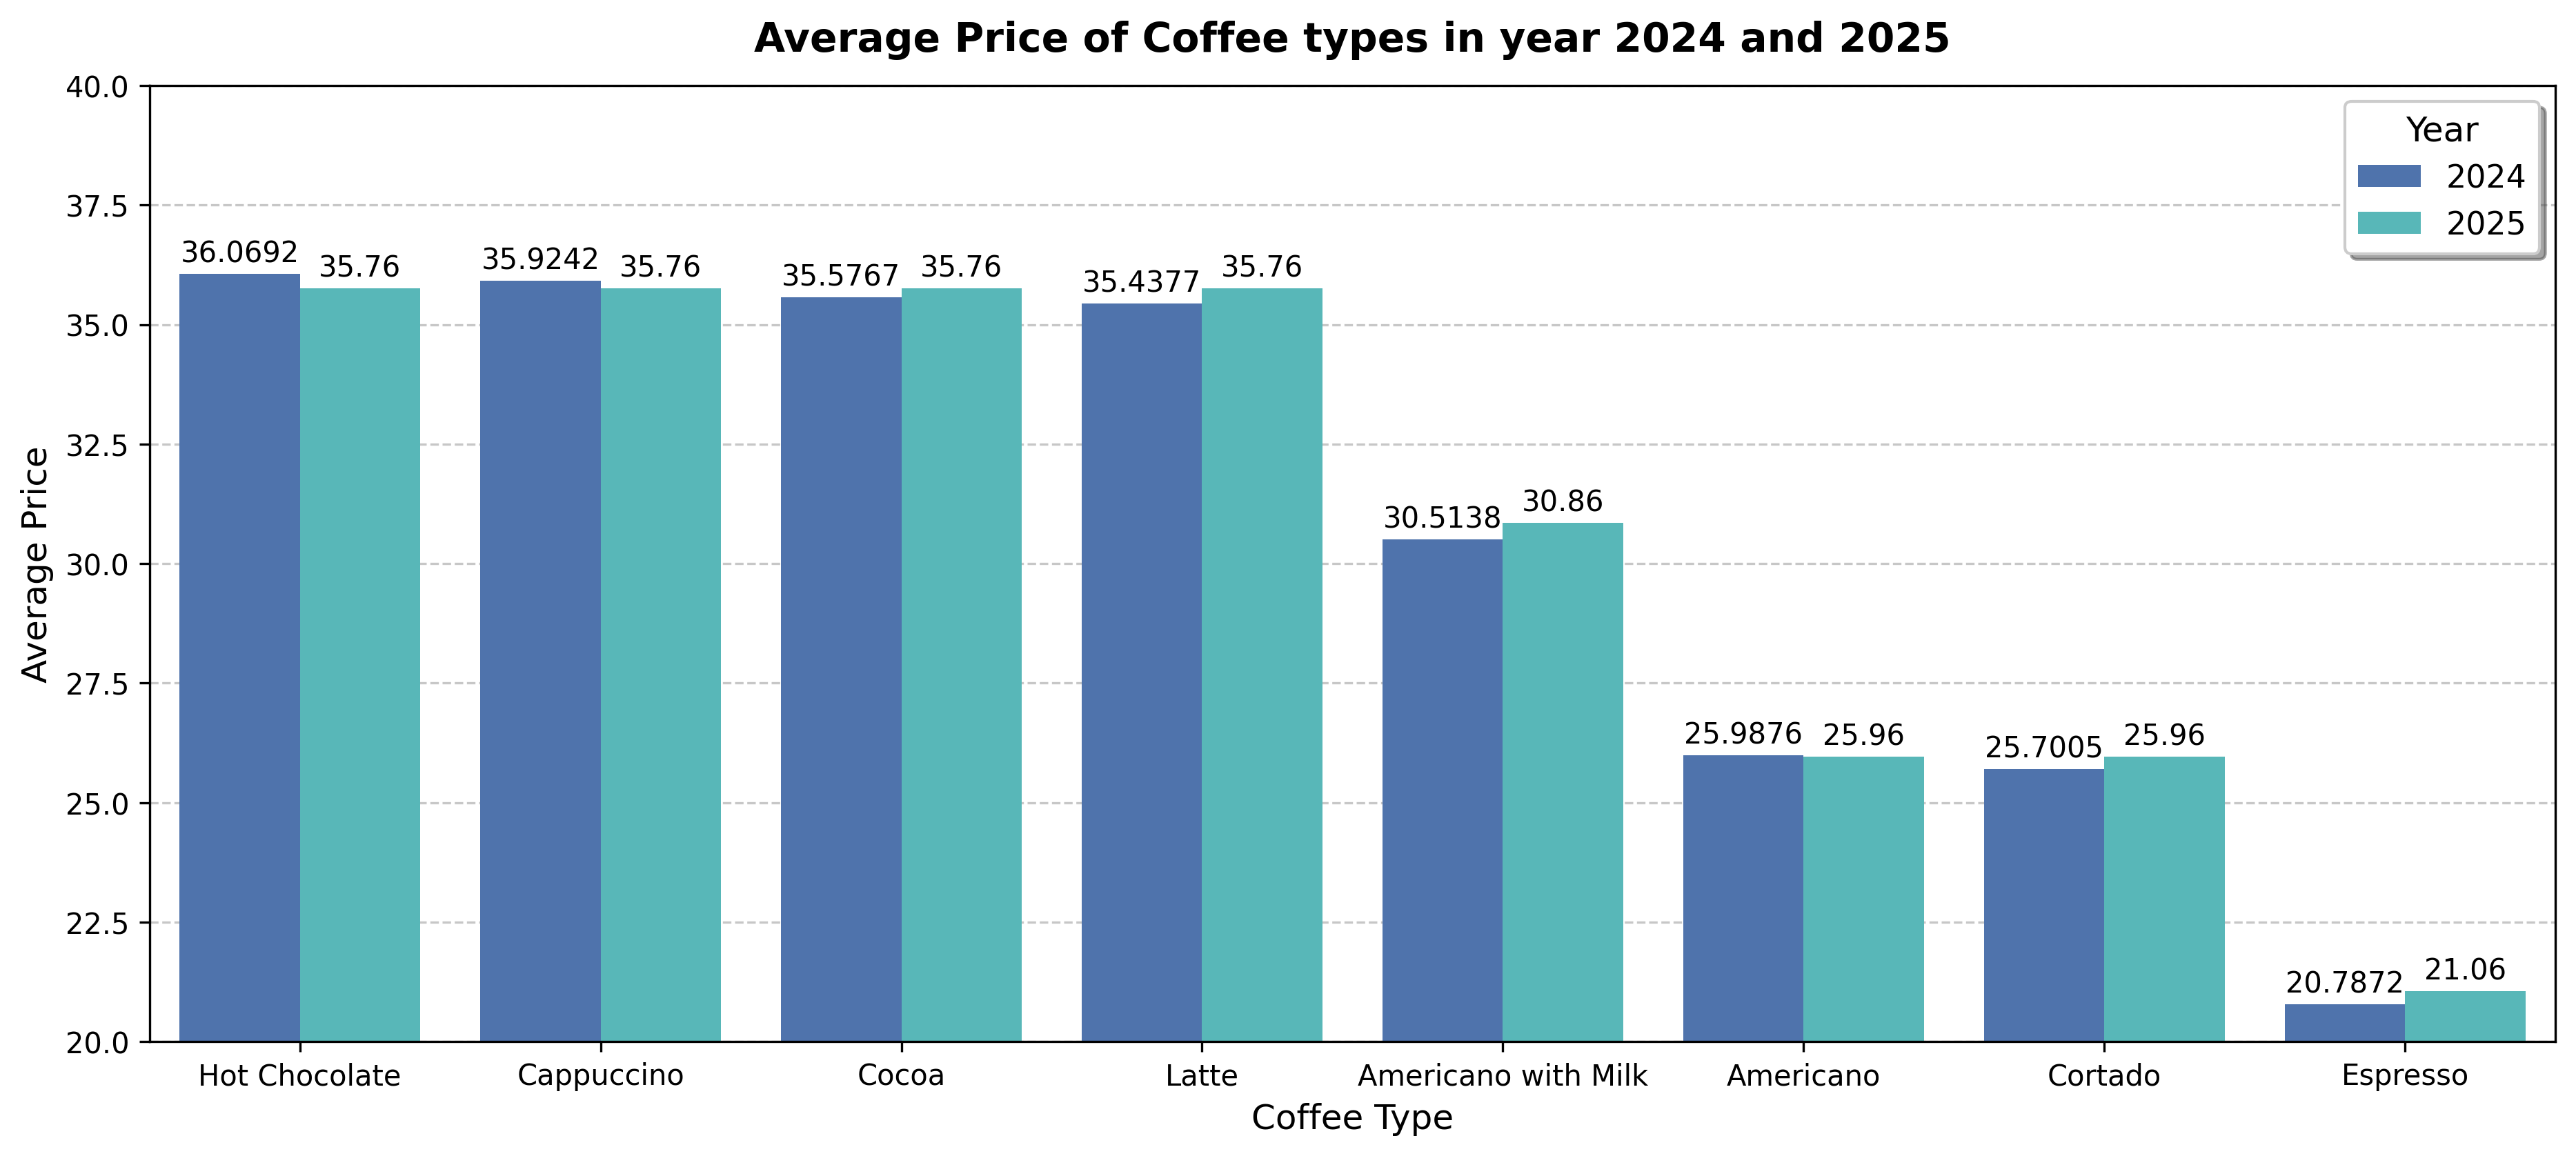

In [18]:
plt.figure(figsize=(15,6),dpi=300)
cfd = cfd.sort_values(by='average_price', ascending=False)
ax=sns.barplot(x='coffee_name',y='average_price',data=cfd,hue='year',palette={2024: "#3F6FBC", 2025: "#48c6c8"})
ax.bar_label(ax.containers[0],padding=2)
ax.bar_label(ax.containers[1],padding=2)
plt.title('Average Price of Coffee types in year 2024 and 2025',fontsize=14 ,fontweight='bold',pad=12)
plt.xlabel("Coffee Type", fontsize=12)
plt.ylim(20,40)
plt.ylabel("Average Price", fontsize=12)
ax.legend(title='Year', title_fontsize=12, fontsize=11, loc='upper right', frameon=True, shadow=True)
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
plt.show()

In [19]:
cfd = cfd.groupby('coffee_name').agg({'money':'sum','count':'sum'}).reset_index()
cfd['average_price'] = cfd['money'] / cfd['count']
cfd

coffee_name     money  count  average_price
0            Americano  14650.26    564      25.975638
1  Americano with Milk  24751.12    809      30.594710
2           Cappuccino  17439.14    486      35.883004
3                Cocoa   8521.16    239      35.653389
4              Cortado   7384.86    287      25.731220
5             Espresso   2690.28    129      20.854884
6        Hot Chocolate   9933.46    276      35.990797
7                Latte  26875.30    757      35.502378

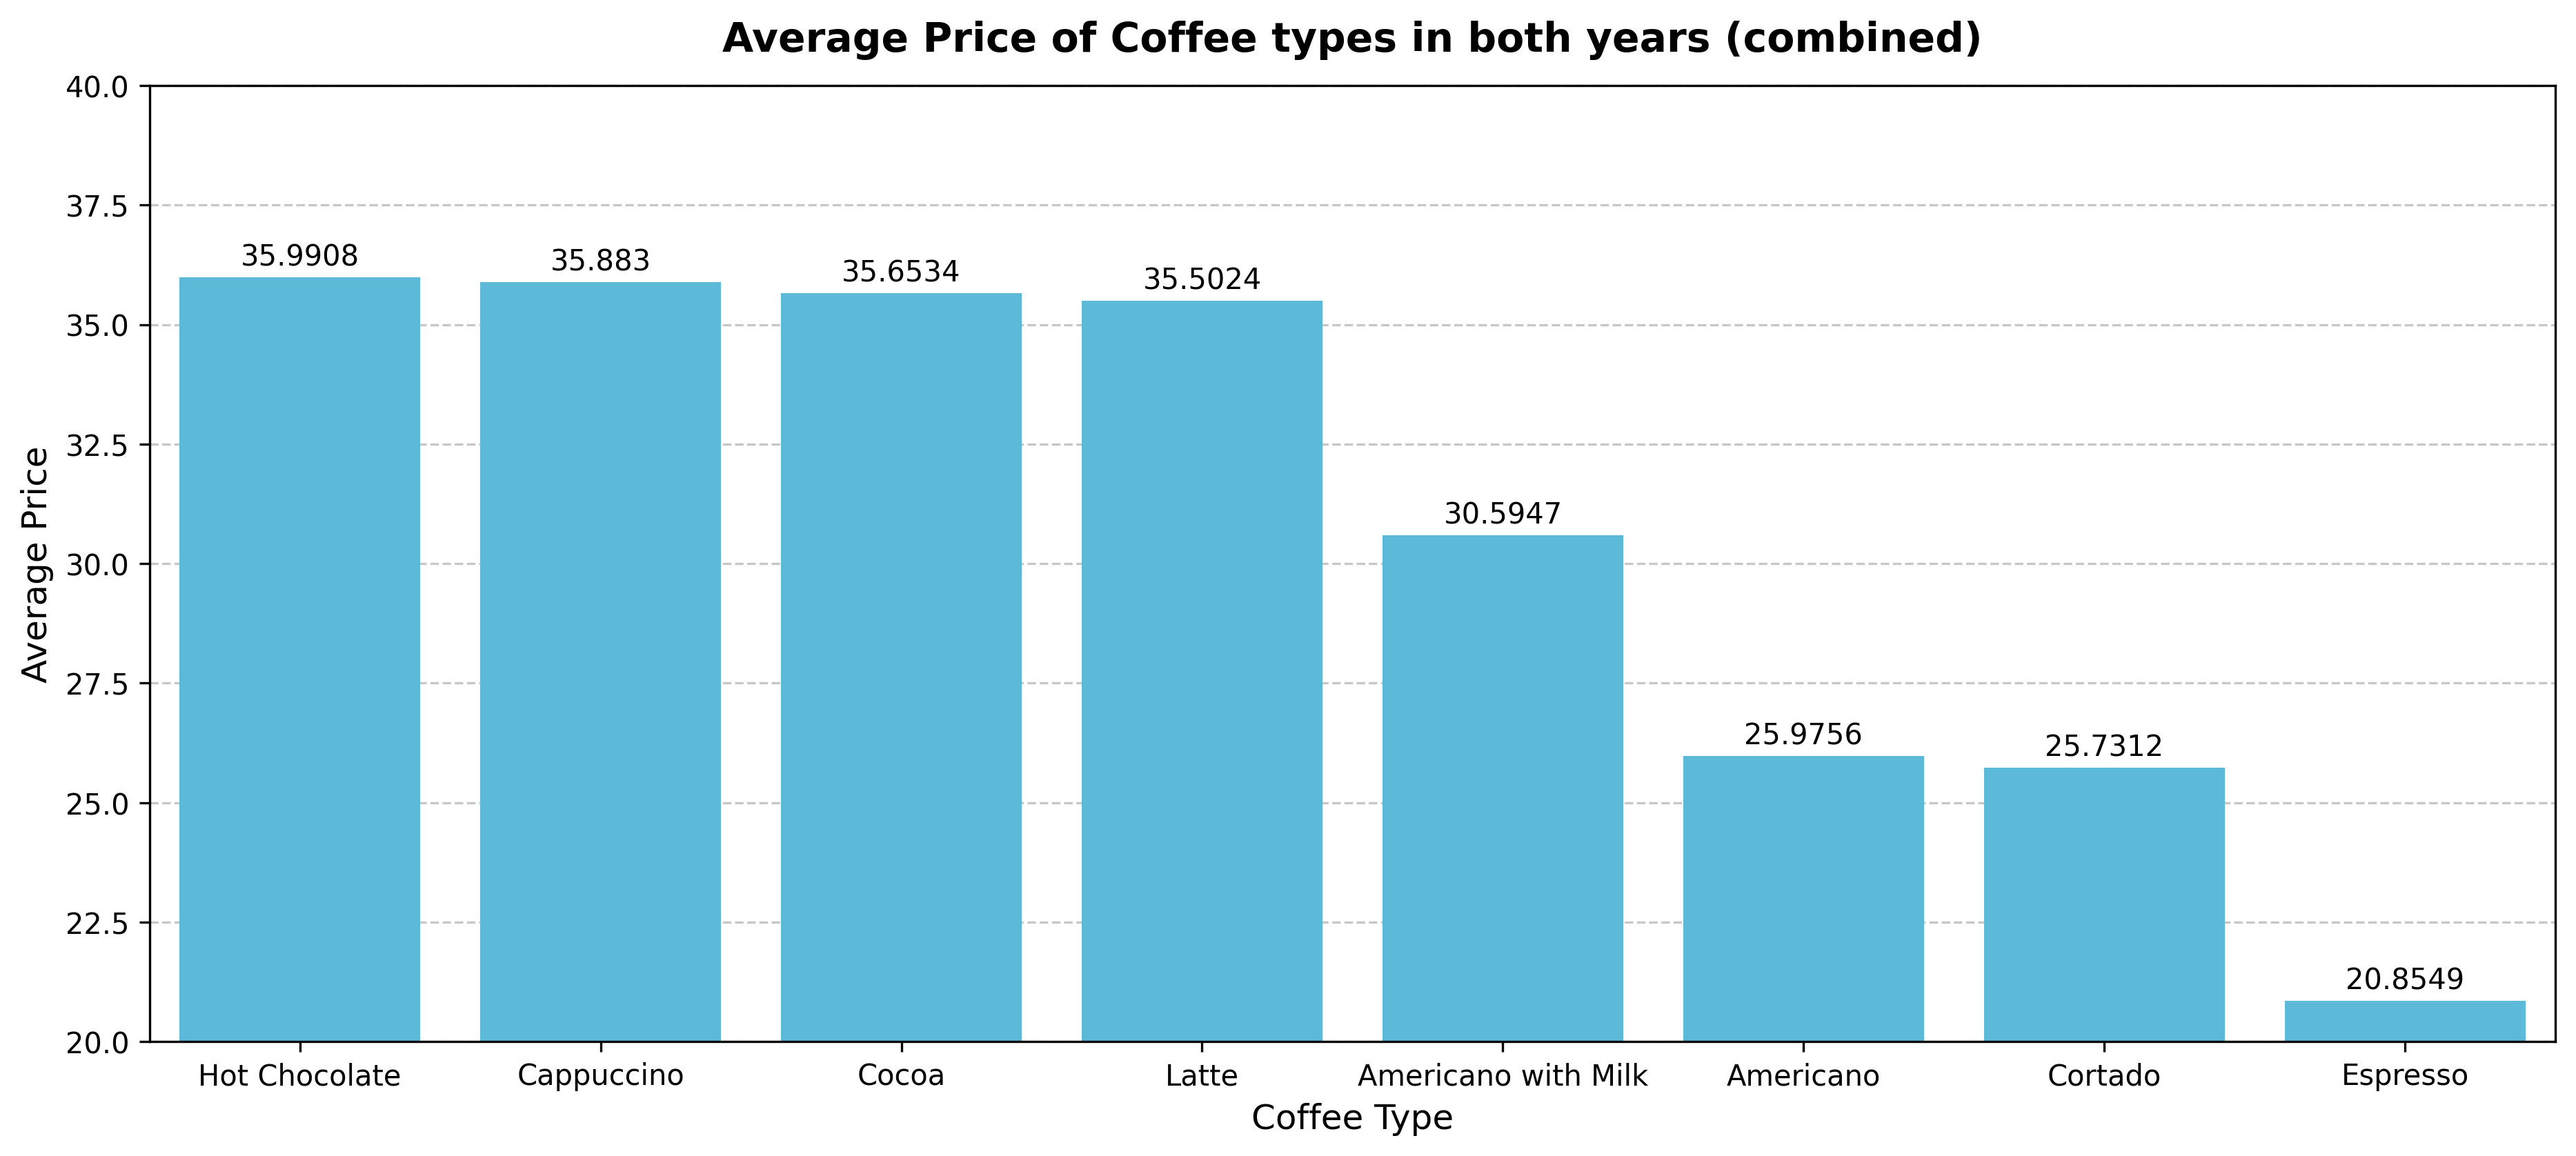

In [20]:
plt.figure(figsize=(15,6),dpi=300)
cfd = cfd.sort_values(by='average_price', ascending=False)
ax=sns.barplot(x='coffee_name',y='average_price',data=cfd,color="#47c3ed")
ax.bar_label(ax.containers[0],padding=2)
plt.title('Average Price of Coffee types in both years (combined)',fontsize=14,fontweight='bold',pad=12)
plt.ylim(20,40)
plt.xlabel("Coffee Type", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
plt.show()

> ### ***If we analyze the 2024 data, the coffee type that brings in the highest average price is Hot Chocolate.***
> ### ***In 2025, the coffee types with the highest average price (all priced equally) are : Hot Chocolate, Cappuccino, Cocoa, and Latte.***
> ### ***When we analyze the combined data of 2024 and 2025, the coffee type with the highest overall average price remains Hot Chocolate.***

## ***B. Time-Based Analysis :***

### ◉ *What are the peak sales hours of the day?*

In [21]:
sal = df.groupby(['hour_of_day','year'])['money'].sum().reset_index().sort_values(by='hour_of_day',ascending=True)
def convert_to_12hr(hour):
    if hour == 0:
        return "12 AM"
    elif hour < 12:
        return f"{hour} AM"
    elif hour == 12:
        return "12 PM"
    else:
        return f"{hour - 12} PM"
    
sal['hour'] = sal['hour_of_day'].apply(convert_to_12hr)

sal_2024 = sal[sal['year'] == 2024]
sal_2025 = sal[sal['year'] == 2025]
sal_2024=sal_2024.sort_values(by='money',ascending=False)
sal_2024

hour_of_day  year    money   hour
7            10  2024  7728.26  10 AM
9            11  2024  6559.90  11 AM
25           19  2024  5979.18   7 PM
19           16  2024  5922.28   4 PM
29           21  2024  5900.74   9 PM
11           12  2024  5711.06  12 PM
3             8  2024  5290.24   8 AM
13           13  2024  5248.68   1 PM
5             9  2024  5123.68   9 AM
23           18  2024  5095.92   6 PM
15           14  2024  4876.92   2 PM
21           17  2024  4828.46   5 PM
17           15  2024  4569.76   3 PM
27           20  2024  4555.12   8 PM
31           22  2024  3209.48  10 PM
1             7  2024  2045.12   7 AM

In [22]:
sal_2025=sal_2025.sort_values(by='money',ascending=False)
sal_2025


hour_of_day  year    money   hour
20           16  2025  3109.56   4 PM
18           15  2025  2906.26   3 PM
22           17  2025  2831.30   5 PM
8            10  2025  2470.26  10 AM
16           14  2025  2296.88   2 PM
6             9  2025  2140.60   9 AM
24           18  2025  2066.68   6 PM
10           11  2025  1893.20  11 AM
14           13  2025  1780.08   1 PM
26           19  2025  1772.78   7 PM
4             8  2025  1727.64   8 AM
12           12  2025  1708.56  12 PM
28           20  2025  1023.80   8 PM
2             7  2025   800.90   7 AM
30           21  2025   497.20   9 PM
32           22  2025   425.68  10 PM
0             6  2025   149.40   6 AM

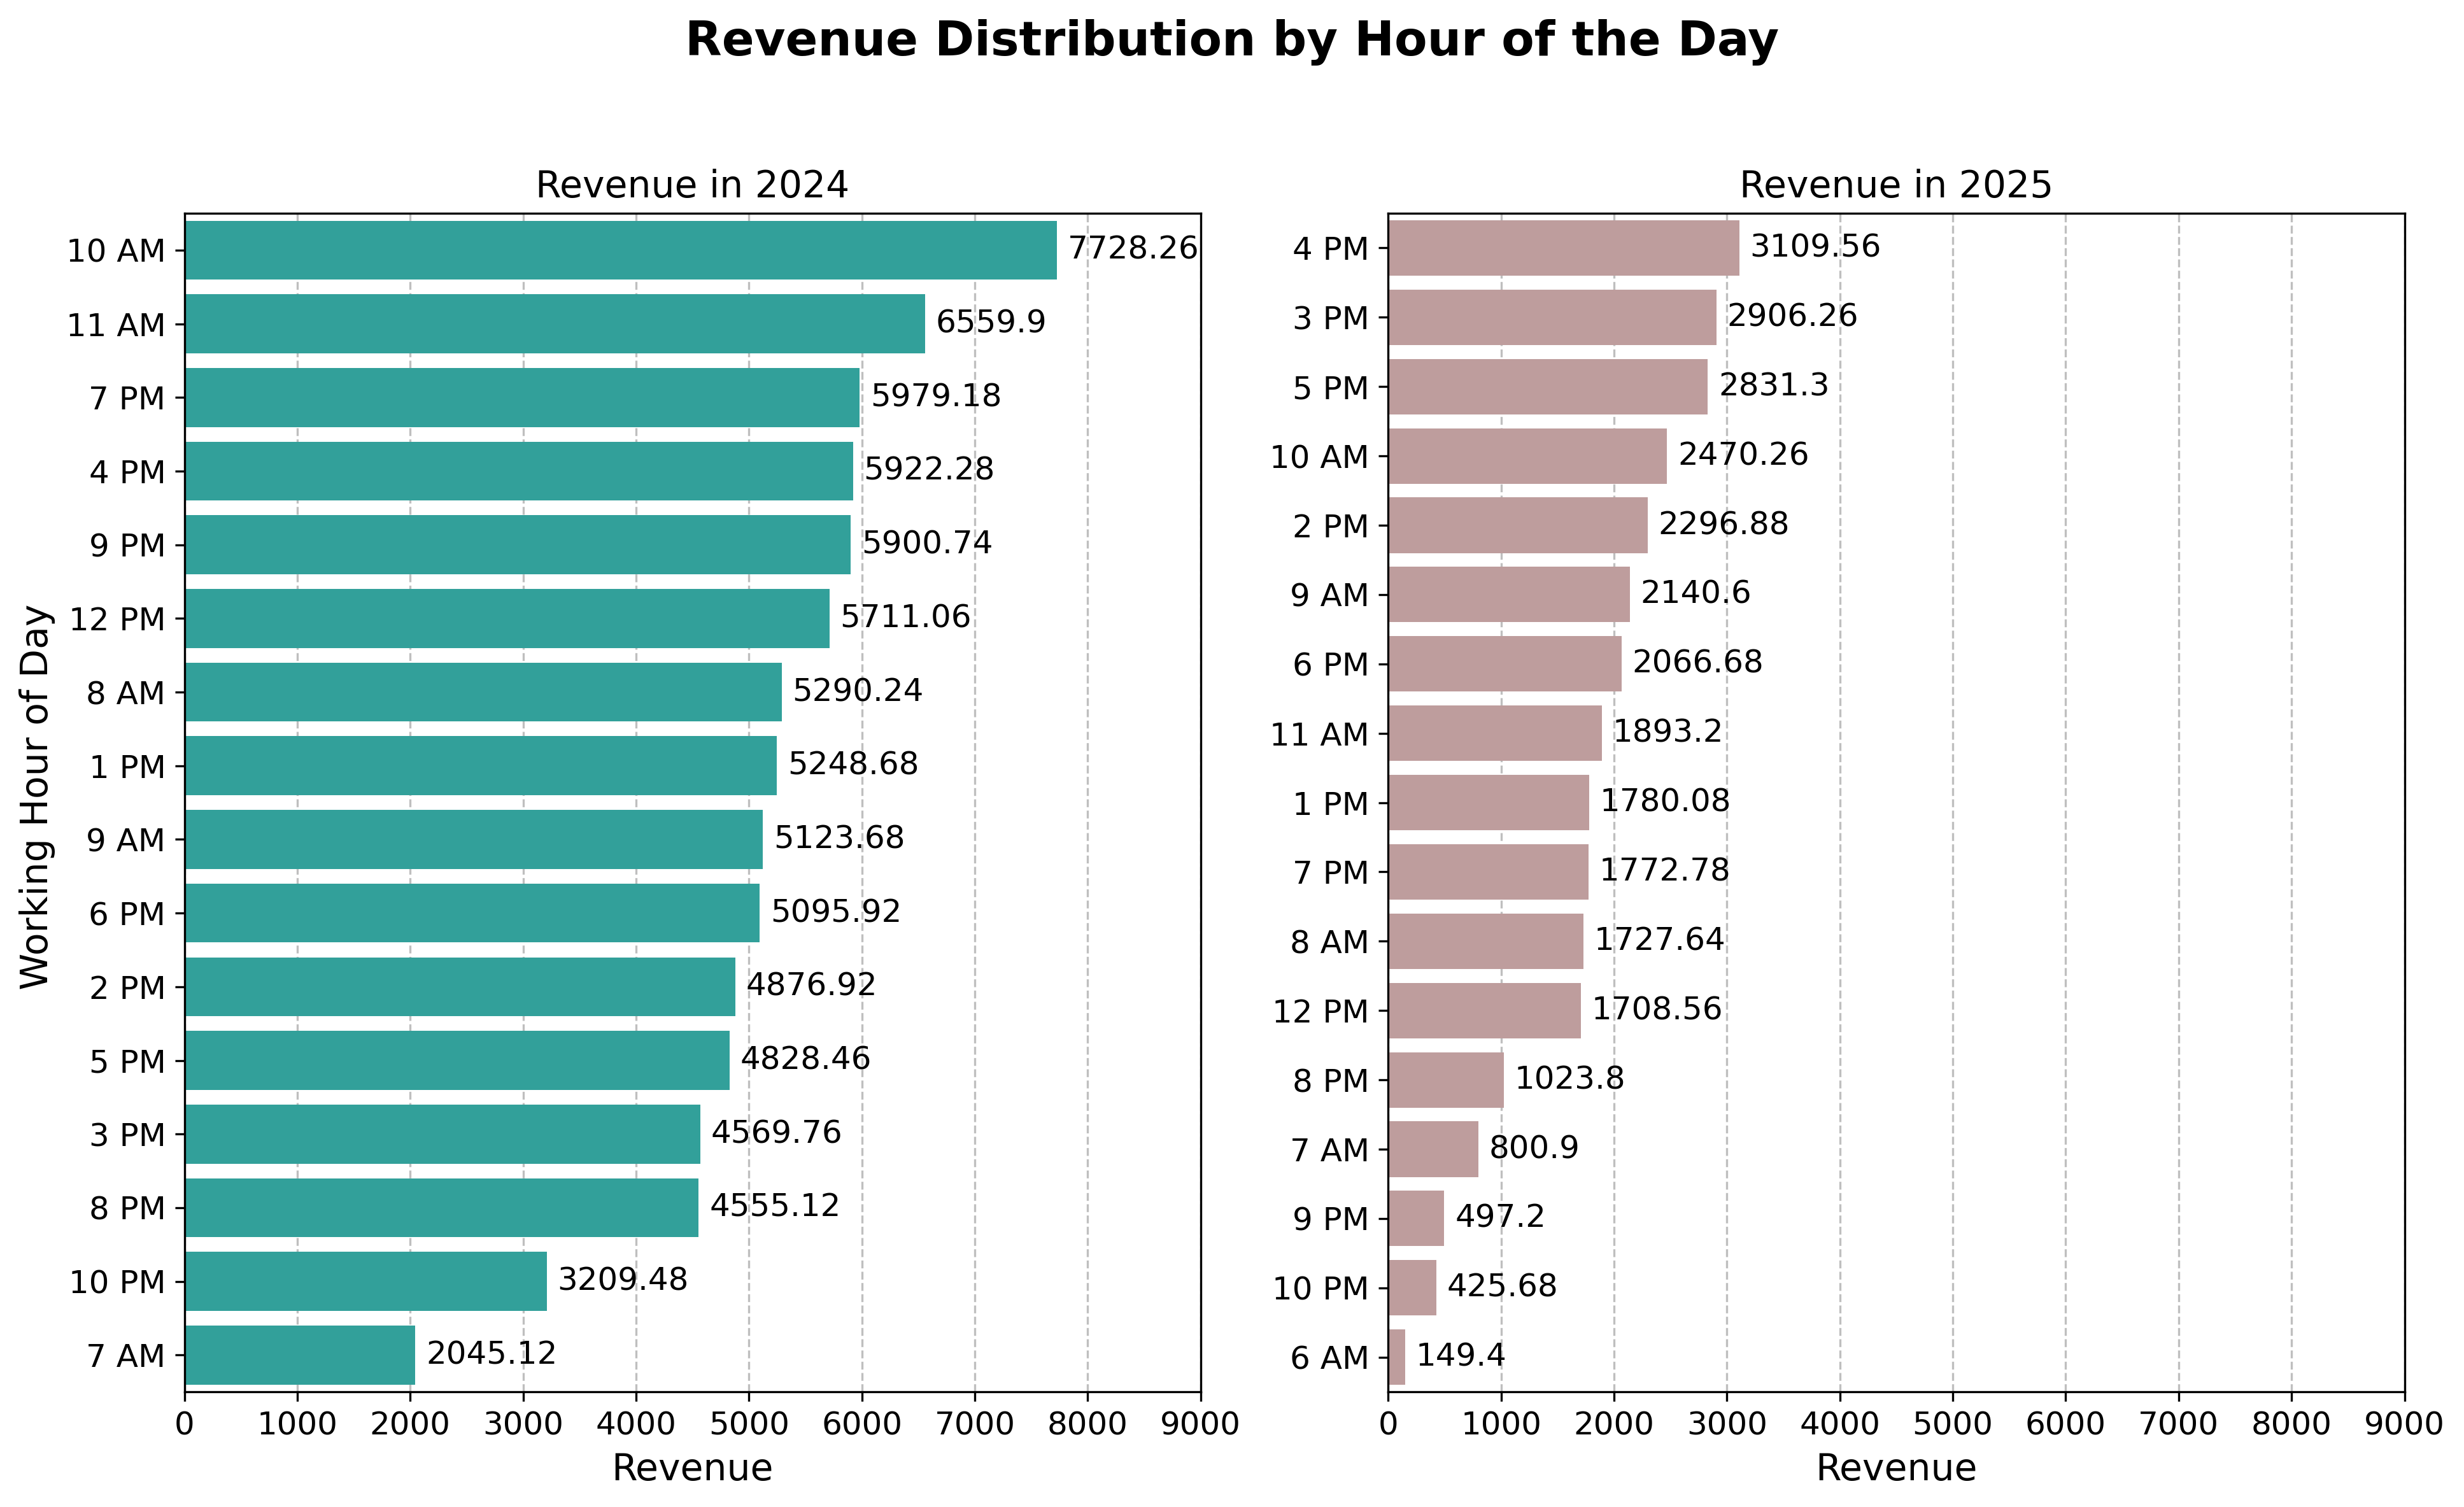

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(13,8), sharey=False,dpi=300)

# Plot 2024
sns.barplot(x='money', y='hour', data=sal_2024, ax=axes[0], color="#20B2AA", orient='h',dodge=True)
axes[0].set_title("Revenue in 2024",fontsize=14)
axes[0].set_xlim(0, 9000)
axes[0].set_xlabel("Revenue",fontsize=14)
axes[0].set_ylabel(" Working Hour of Day",fontsize=14)
axes[0].bar_label(axes[0].containers[0],fontsize=12,padding=4) 
axes[0].tick_params(axis='y', labelsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].xaxis.grid(True, linestyle="--", alpha=0.8)
axes[0].set_axisbelow(True)


# Plot 2025
sns.barplot(x='money', y='hour', data=sal_2025, ax=axes[1], color="#c39797", orient='h',dodge=True)
axes[1].set_title("Revenue in 2025",fontsize=14)
axes[1].set_xlim(0, 9000)
axes[1].set_xlabel("Revenue",fontsize=14)
axes[1].set_ylabel("")
axes[1].bar_label(axes[1].containers[0],fontsize=12,padding=4)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].xaxis.grid(True, linestyle="--", alpha=0.8)
axes[1].set_axisbelow(True)

plt.suptitle("Revenue Distribution by Hour of the Day", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [24]:
sales = df.groupby('hour_of_day')['money'].sum().reset_index().sort_values(by="money",ascending=False)
sales

hour_of_day     money
4            10  10198.52
10           16   9031.84
5            11   8453.10
13           19   7751.96
11           17   7659.76
9            15   7476.02
6            12   7419.62
3             9   7264.28
8            14   7173.80
12           18   7162.60
7            13   7028.76
2             8   7017.88
15           21   6397.94
14           20   5578.92
16           22   3635.16
1             7   2846.02
0             6    149.40

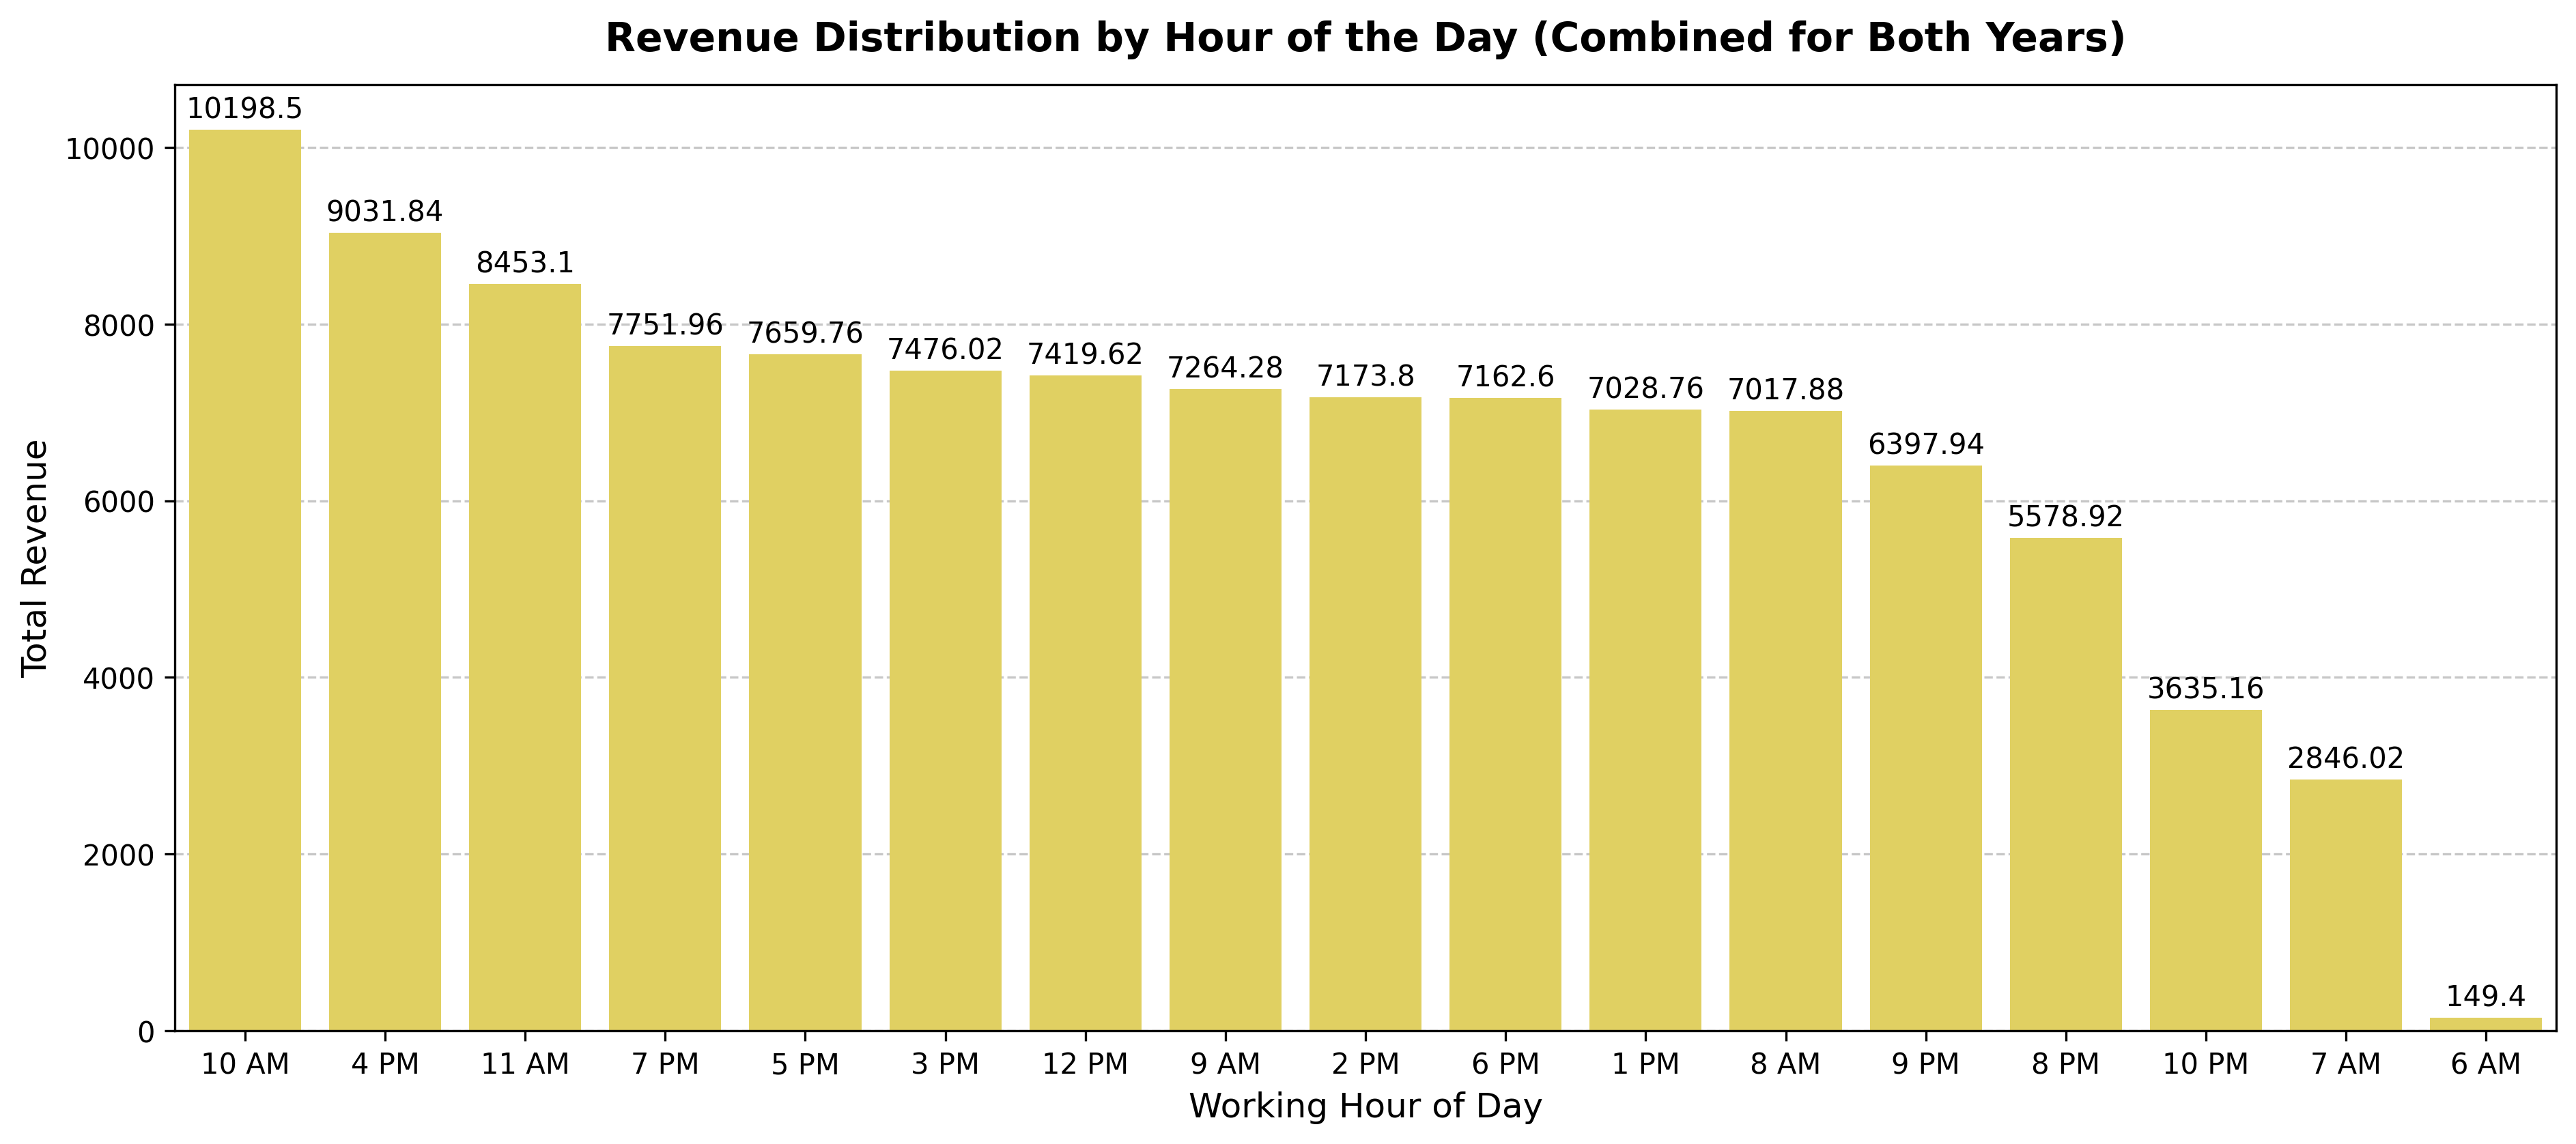

In [25]:
def convert_to_12hr(hour):
    if hour == 0:
        return "12 AM"
    elif hour < 12:
        return f"{hour} AM"
    elif hour == 12:
        return "12 PM"
    else:
        return f"{hour - 12} PM"
    
sales['hour'] = sales['hour_of_day'].apply(convert_to_12hr)
plt.figure(figsize=(15,6),dpi=300)
ax=sns.barplot(x='hour',y='money',data=sales,color="#F5DF4D")
ax.bar_label(ax.containers[0],padding=2)
plt.title('Revenue Distribution by Hour of the Day (Combined for Both Years)', fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Working Hour of Day", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
plt.show()

> ### ***In 2024, the coffee shop’s highest revenue was at 10 AM, making it the peak sales hour. The top five earning hours were 10 AM, 11 AM, 7 PM, 4 PM, and 9 PM, showing strong performance in late mornings and evenings. Notably, there were no sales at 6 AM, suggesting the shop may not have been operating at that hour.***
> ### ***In 2025, the peak shifted to the afternoon, with 4 PM generating the highest revenue. The top five hours were 4 PM, 3 PM, 5 PM, 10 AM, and 2 PM, indicating a shift in customer behavior toward post-lunch and early evening purchases compared to 2024.***
> ### ***Considering the combined data for 2024 and 2025, 10 AM remained the top revenue hour with ₹10,198.52, followed by 4 PM, 11 AM, 7 PM, and 5 PM. This shows that morning and evening hours consistently drive the most sales, while afternoons gained importance in 2025, highlighting evolving customer patterns.***

### ◉ *Which time of the day (Morning, Afternoon, Evening, Night) has the highest sales?*

In [26]:
shift=df.groupby(['Time_of_Day','hour_of_day'])['money'].sum().reset_index().sort_values(by='hour_of_day')
shift.drop(columns=['money'], inplace=True)
shift

Time_of_Day  hour_of_day
5      Morning            6
6      Morning            7
7      Morning            8
8      Morning            9
9      Morning           10
10     Morning           11
0    Afternoon           12
1    Afternoon           13
2    Afternoon           14
3    Afternoon           15
4    Afternoon           16
11       Night           17
12       Night           18
13       Night           19
14       Night           20
15       Night           21
16       Night           22

> ### ***Based on the above DataFrame, we can categorize the working hours as follows: the Morning shift spans 6 AM to 12 AM (6 hours), the Afternoon shift covers 12 PM to 4 PM (4 hours), and the Night shift runs from 4 PM to 10 PM (6 hours).***

In [27]:
sft= df.groupby(['Time_of_Day','year'])['money'].sum().reset_index().sort_values(by='money',ascending=False)
sft

Time_of_Day  year     money
4       Night  2024  29568.90
2     Morning  2024  26747.20
0   Afternoon  2024  26328.70
1   Afternoon  2025  11801.34
3     Morning  2025   9182.00
5       Night  2025   8617.44

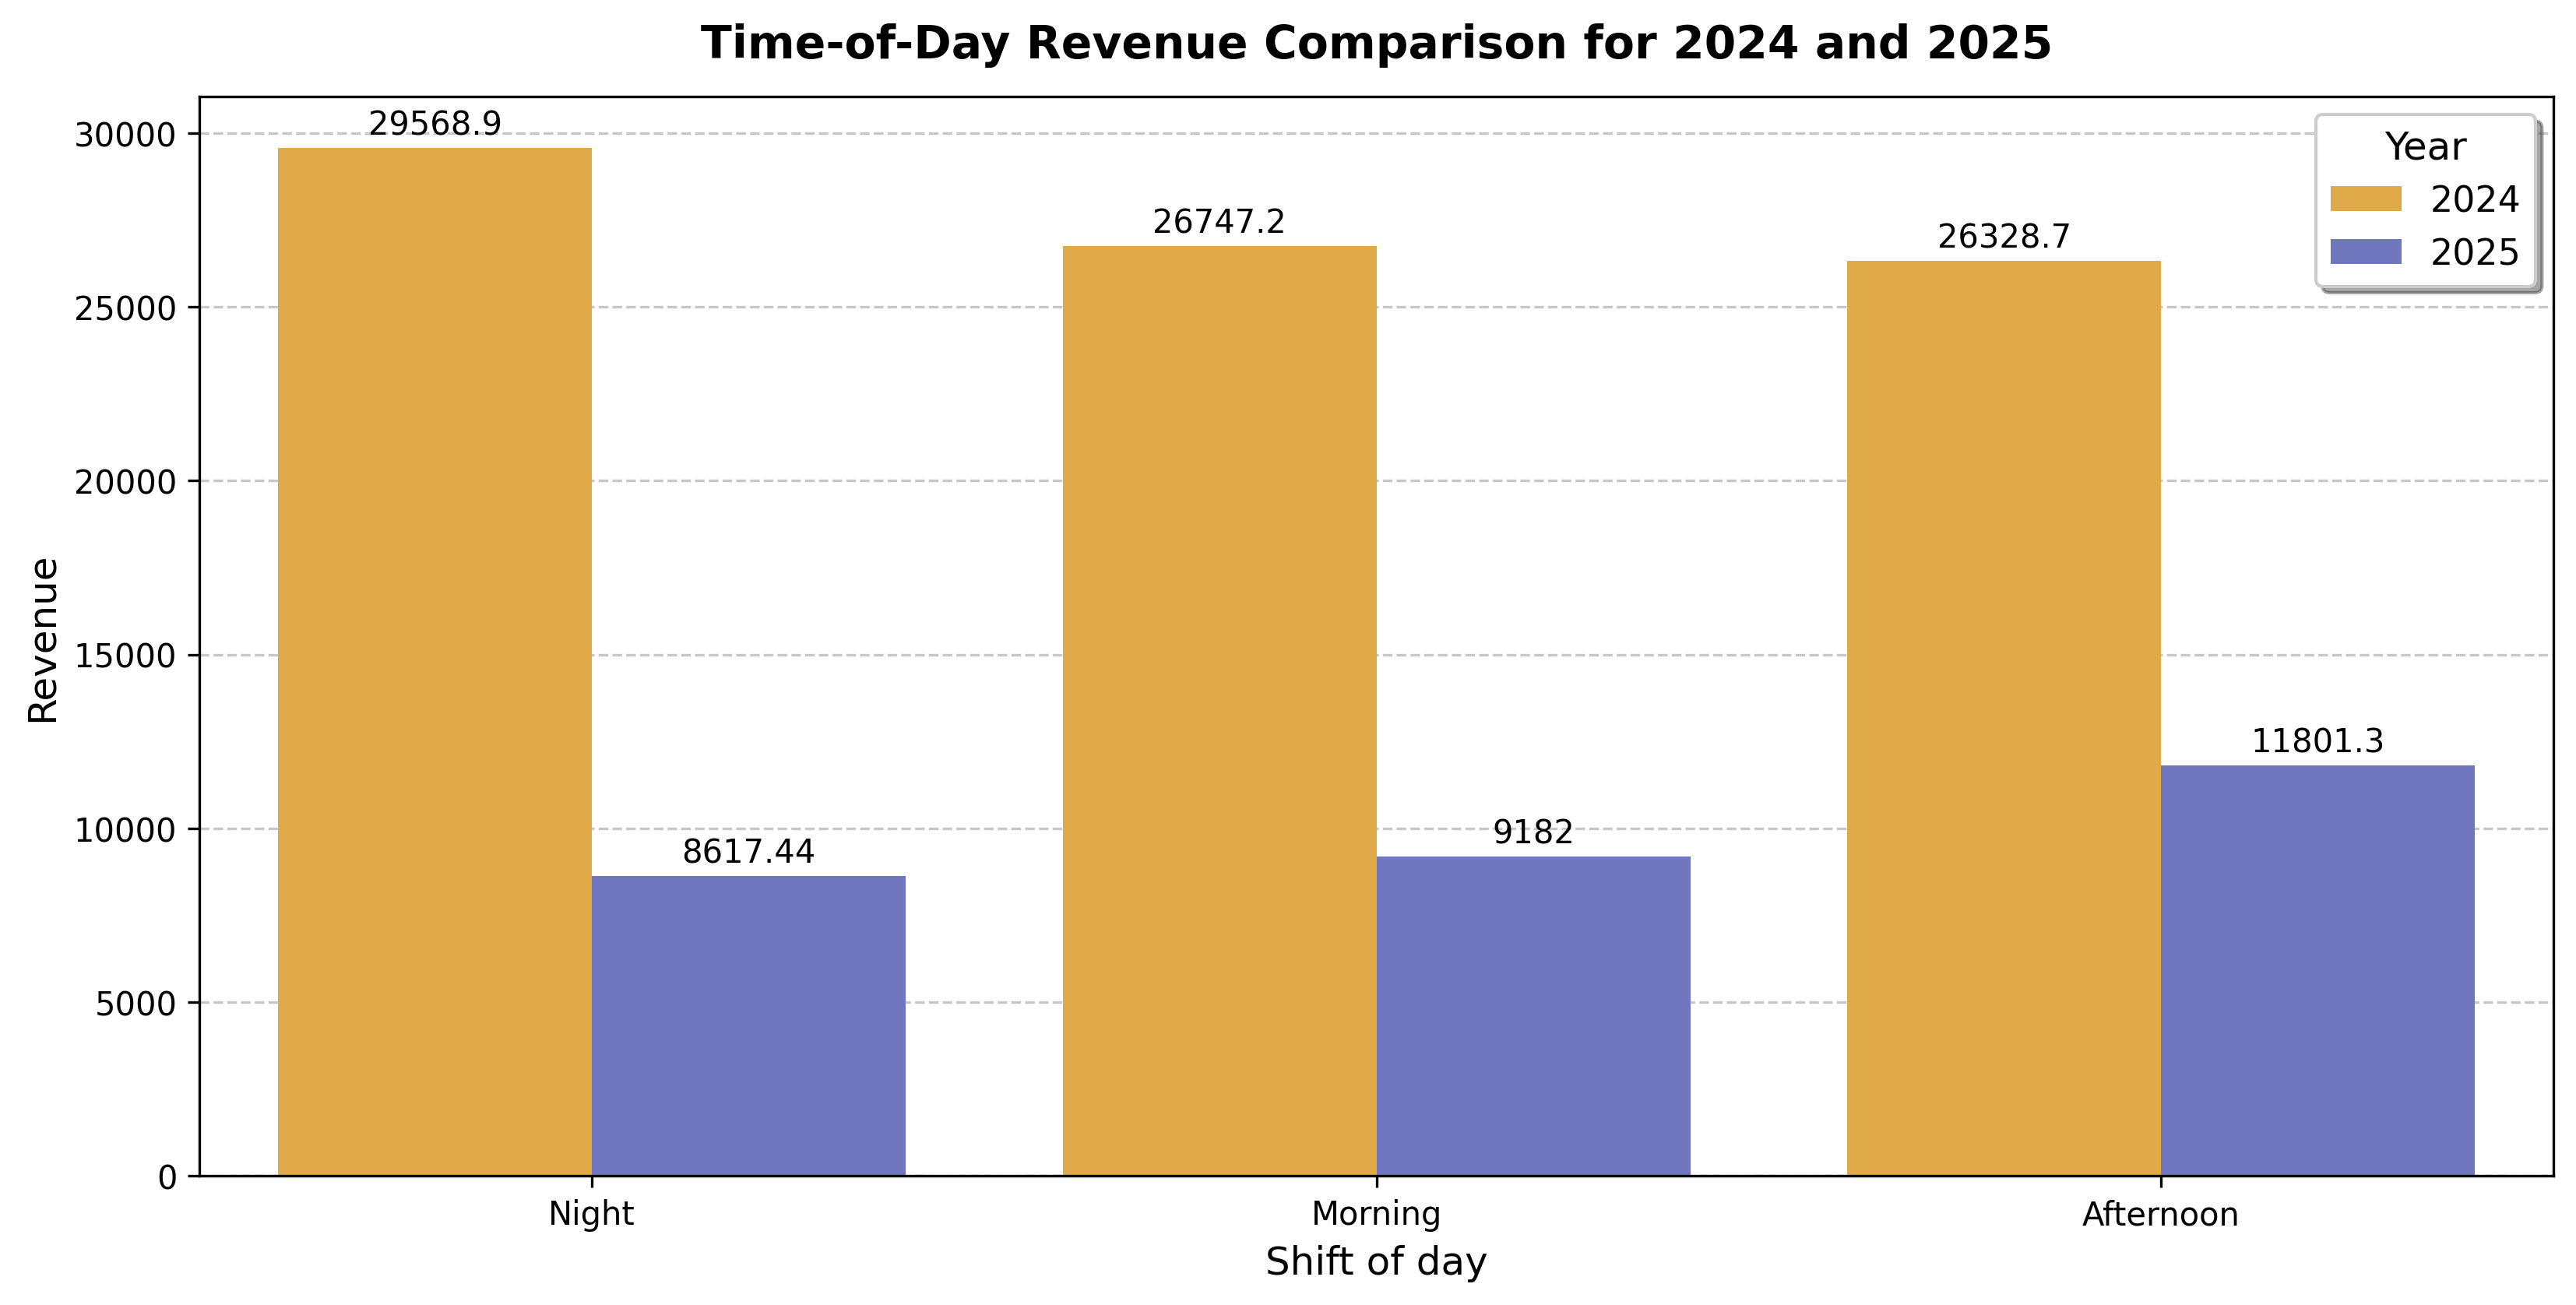

In [28]:
plt.figure(figsize=(13,6),dpi=300)
ax=sns.barplot(x='Time_of_Day',y='money',data=sft,hue='year',palette={2024: "#FAB12F", 2025: "#636CCB"})
ax.bar_label(ax.containers[0],padding=2)
ax.bar_label(ax.containers[1],padding=2)
plt.title('Time-of-Day Revenue Comparison for 2024 and 2025', fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Shift of day", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
ax.legend(title='Year', title_fontsize=12, fontsize=11, loc='upper right', frameon=True, shadow=True)
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
plt.show()

In [29]:
tod = df.groupby('Time_of_Day')['money'].sum().reset_index().sort_values(by='money',ascending=False)
tod

Time_of_Day     money
2       Night  38186.34
0   Afternoon  38130.04
1     Morning  35929.20

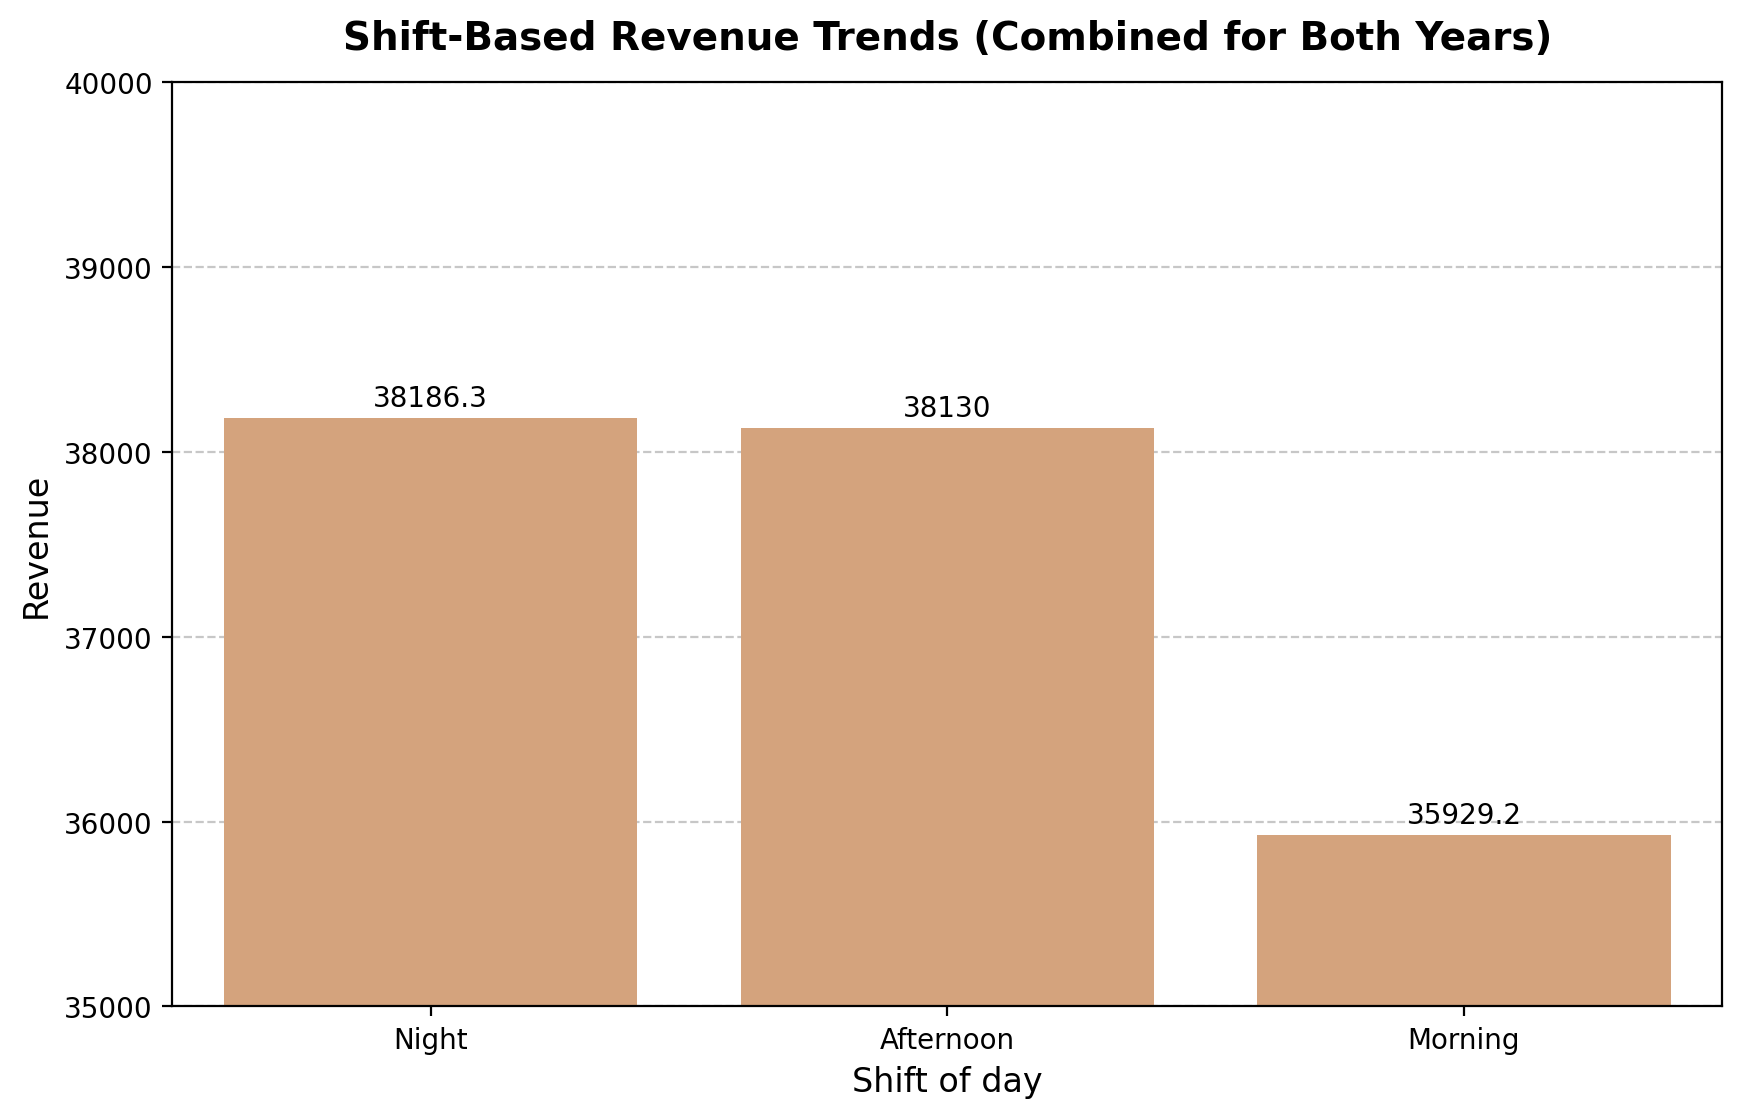

In [30]:
plt.figure(figsize=(10,6),dpi=200)
ax=sns.barplot(x='Time_of_Day',y='money',data=tod,color='#E2A16F')
ax.bar_label(ax.containers[0],padding=2)
plt.title('Shift-Based Revenue Trends (Combined for Both Years)', fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Shift of day", fontsize=12)
plt.ylim(35000,40000)
plt.ylabel("Revenue", fontsize=12)
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
plt.show()

> ### ***In 2024, the Night shift (4pm to 10pm) generated the highest revenue at ₹29,568.90. This indicates that evening hours were the most profitable for the shop in 2024.***
> ### ***In 2025, the Afternoon shift (12pm to 4pm) led in revenue with ₹11,801.34, surpassing both Morning and Night shifts, showing a shift in peak sales hours compared to the previous year.***
> ### ***When considering combined data for both years, the Night shift emerged as the overall top-earning period with ₹38,186.34, followed by Afternoon and Morning shifts. This highlights that evening operations consistently contribute the most to overall revenue across years.***

### ◉ *How do sales vary by day of the week?*

In [31]:
week = df.groupby(['Weekday','year'])['money'].sum().reset_index().sort_values(by=['year','money'],ascending=[True,False])
week

Weekday  year     money
10     Tue  2024  14122.28
2      Mon  2024  11990.96
4      Sat  2024  11637.72
8      Thu  2024  11618.16
0      Fri  2024  11432.50
6      Sun  2024  11194.94
12     Wed  2024  10648.24
3      Mon  2025   5372.14
1      Fri  2025   5370.16
13     Wed  2025   5102.22
9      Thu  2025   4473.24
11     Tue  2025   4046.10
5      Sat  2025   3095.80
7      Sun  2025   2141.12

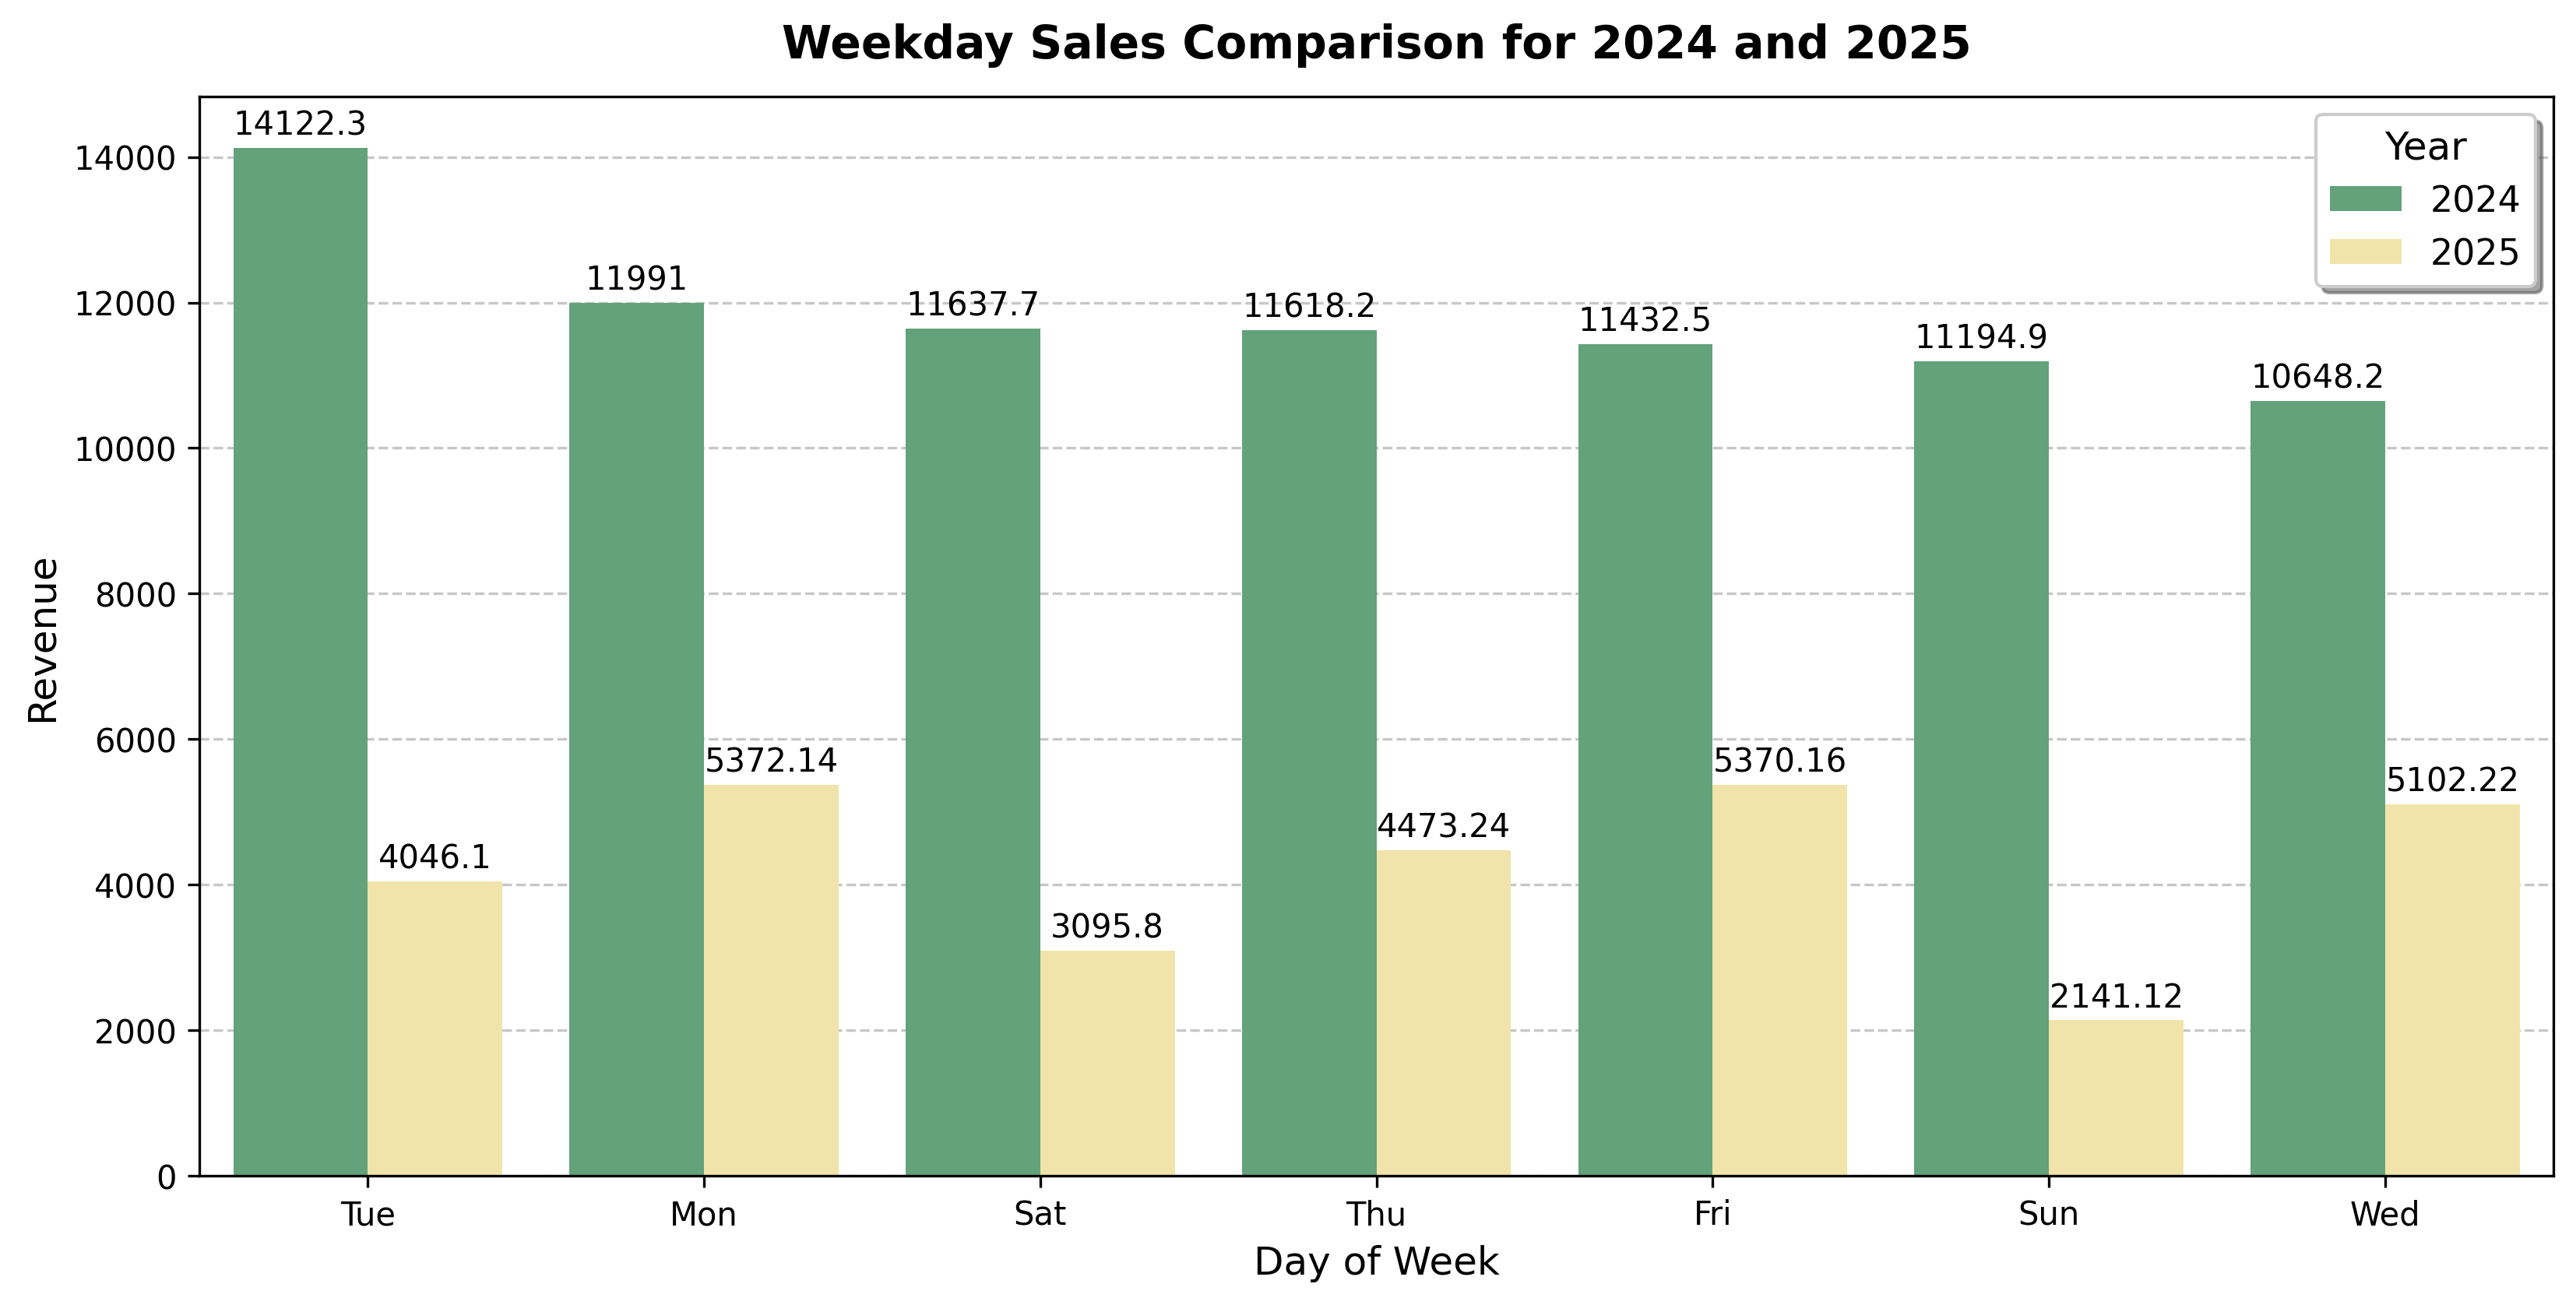

In [32]:
plt.figure(figsize=(13,6),dpi=300)
ax=sns.barplot(x='Weekday',y='money',data=week,hue='year',palette={2024: "#59AC77", 2025: "#FDEB9E"})
ax.bar_label(ax.containers[0],padding=2)
ax.bar_label(ax.containers[1],padding=2)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title('Weekday Sales Comparison for 2024 and 2025', fontsize=14, fontweight='bold', pad=12)
ax.legend(title='Year', title_fontsize=12, fontsize=11, loc='upper right', frameon=True, shadow=True)
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
plt.show()

In [33]:
weekT = df.groupby('Weekday')['money'].sum().reset_index().sort_values(by='money',ascending=False)
weekT

Weekday     money
5     Tue  18168.38
1     Mon  17363.10
0     Fri  16802.66
4     Thu  16091.40
6     Wed  15750.46
2     Sat  14733.52
3     Sun  13336.06

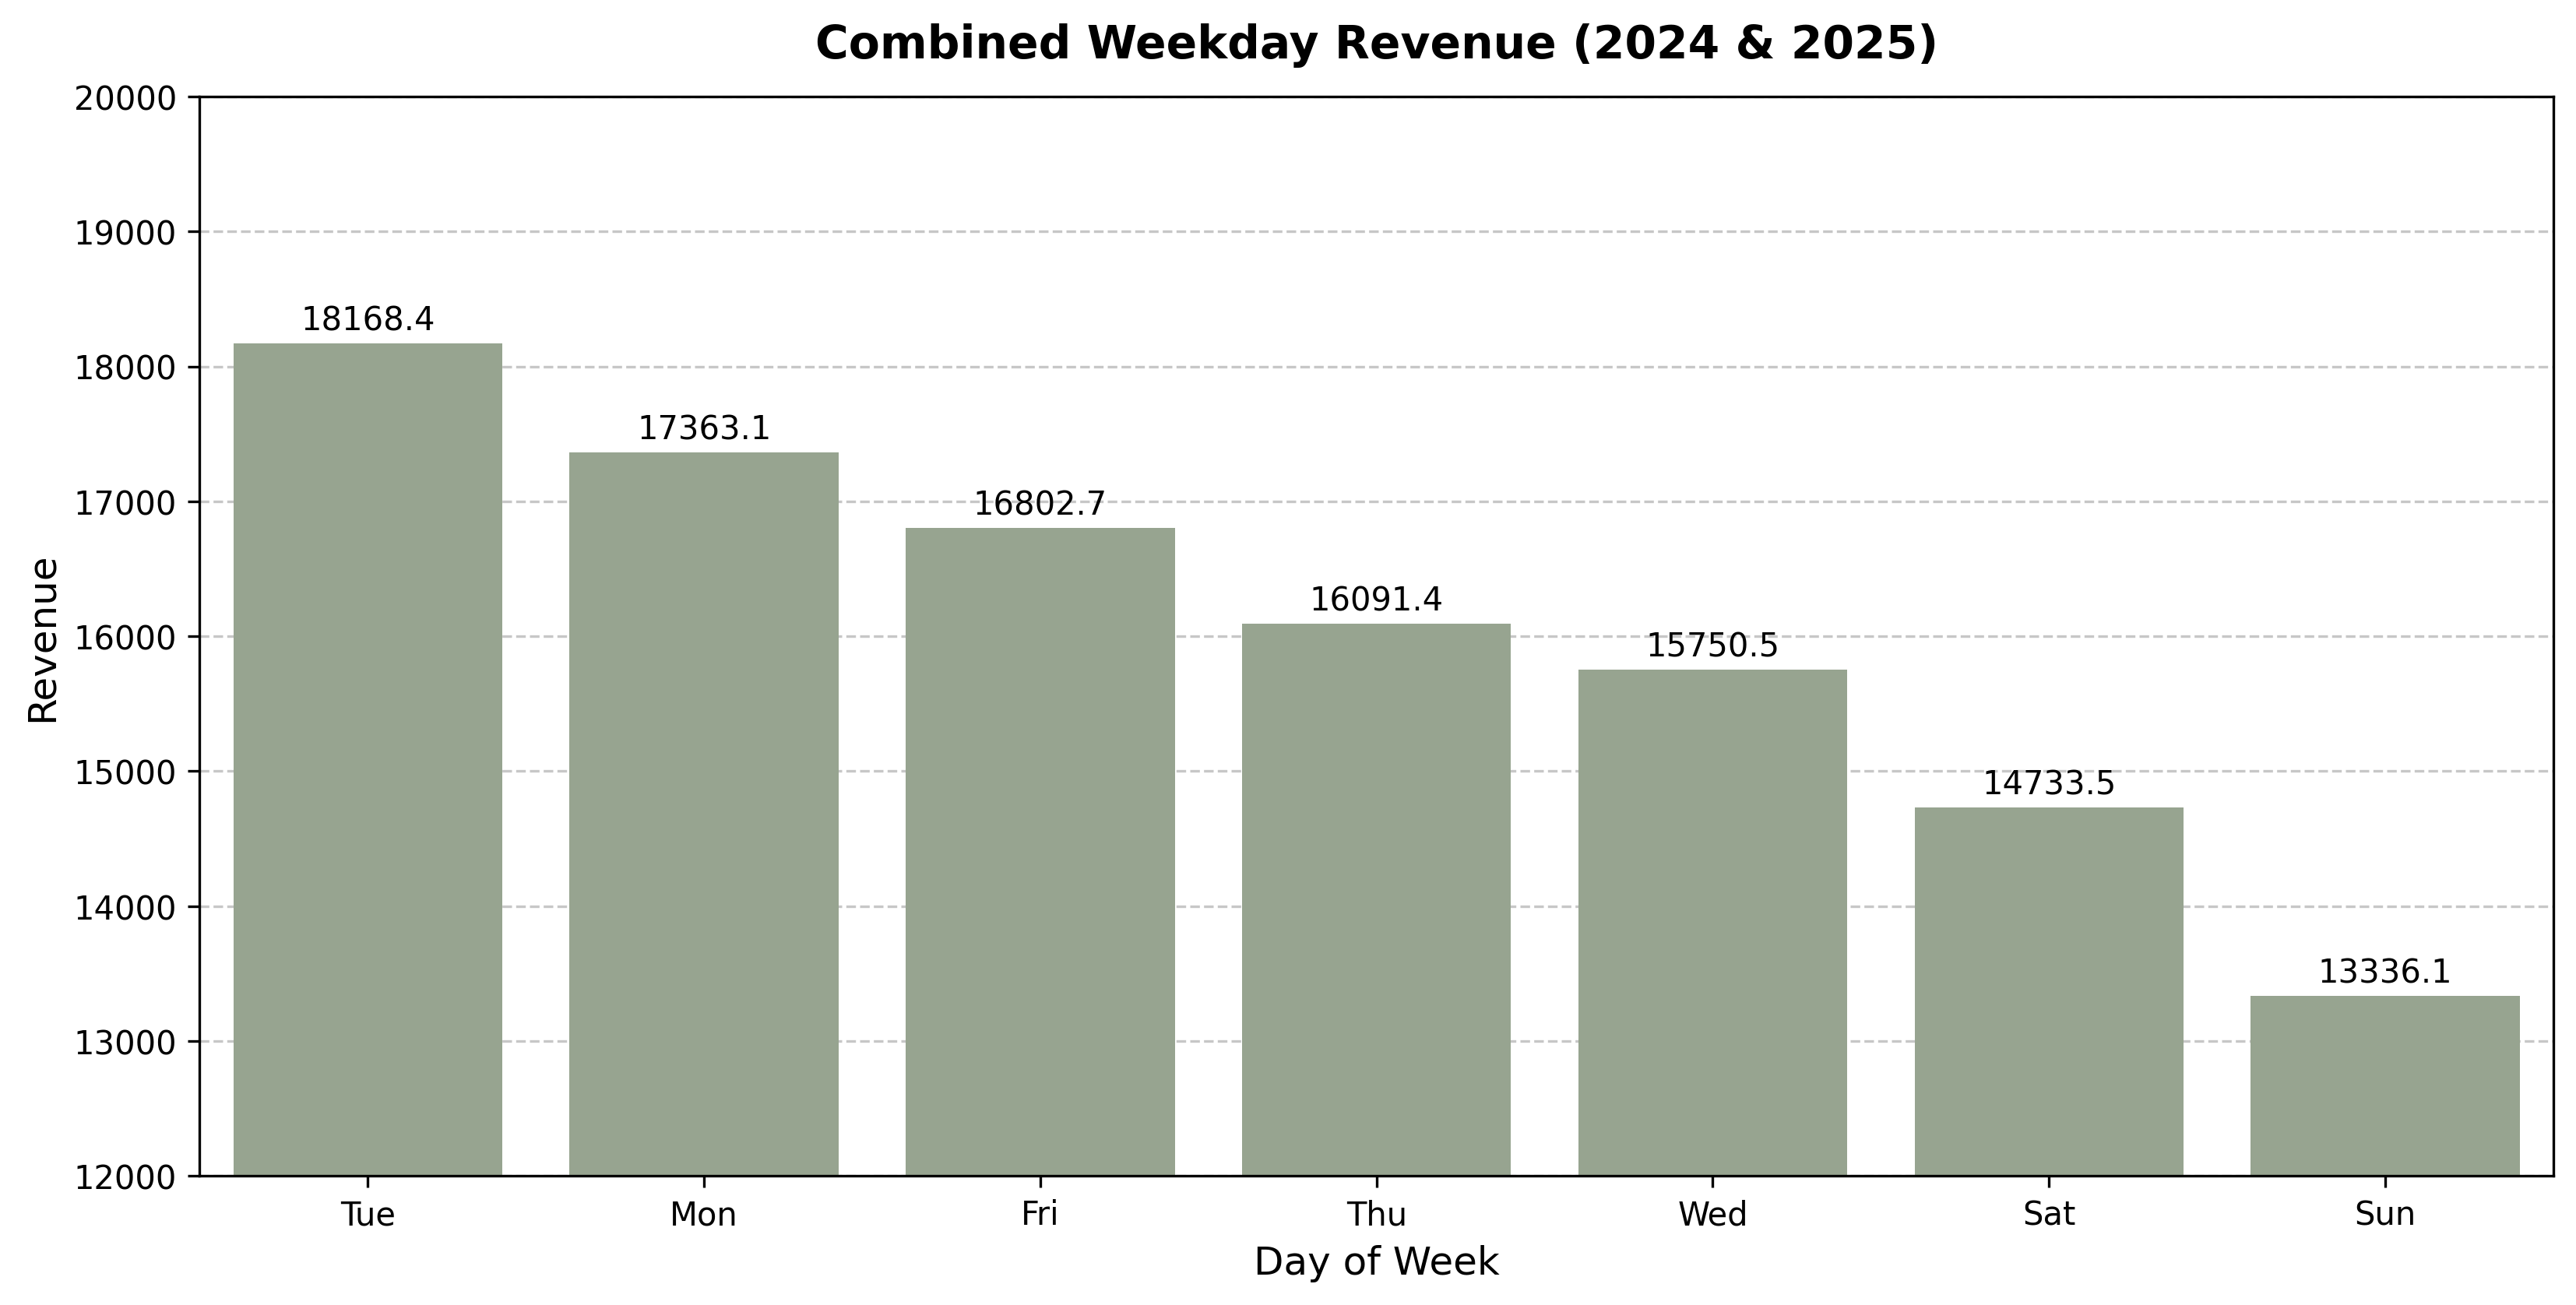

In [34]:
plt.figure(figsize=(13,6),dpi=300)
ax=sns.barplot(x='Weekday',y='money',data=weekT,color='#96A78D')
ax.bar_label(ax.containers[0],padding=2)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.title('Combined Weekday Revenue (2024 & 2025)', fontsize=14, fontweight='bold', pad=12)
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
plt.ylim(12000,20000)
plt.show()

> ### ***In 2024, Tuesday (14,122.28) and Monday (11,990.96) generated the highest revenue. Sunday (11194.94) and Wednesday (10648.24) saw the lowest revenue, with midweek peaks overall.***
> ### ***In 2025, Monday (5,372.14) and Friday (5,370.16) were the top-performing days. Sunday (2,141.12) and Saturday (3,095.80) had the lowest sales, showing a significant drop from 2024.***
> ### ***For both years combined, Tuesday (18,168.38) and Monday (17,363.10) led in total revenue. Weekends remained the lowest, highlighting the consistent early-week peak pattern.***

### ◉ *Which weekday generates the highest revenue?*


> ### ***In 2024, Tuesday (14,122.28) was the top revenue-generating weekday.***
> ### ***while in 2025, Monday (5,372.14) recorded the highest sales.***
> ### ***When combining both years, Tuesday emerges as the highest revenue-generating weekday overall (18,168.38), highlighting a consistent early-week peak in coffee sales.***

### ◉ *Do weekends or weekdays perform better in terms of sales?*

> ### ***Weekdays consistently outperform weekends in terms of revenue.***
> ### ***Both 2024 and 2025 show that Monday–Tuesday generate the highest sales, while Saturday and Sunday contribute the lowest.***
> ### ***Even in the combined data, early-week days dominate revenue, indicating that coffee sales peak during weekdays rather than weekends.***

### ◉ *How do sales vary by month?*

In [35]:
month = df.groupby(['Month_name','year'])['money'].sum().reset_index().sort_values(by=['year','money'],ascending=[True,False])
month

Month_name  year     money
11        Oct  2024  13891.16
12        Sep  2024   9988.64
10        Nov  2024   8590.54
2         Dec  2024   8237.74
9         May  2024   8164.42
6         Jun  2024   7617.76
1         Aug  2024   7613.84
5         Jul  2024   6915.94
7         Mar  2024   5905.20
0         Apr  2024   5719.56
3         Feb  2025  13215.48
8         Mar  2025   9986.44
4         Jan  2025   6398.86

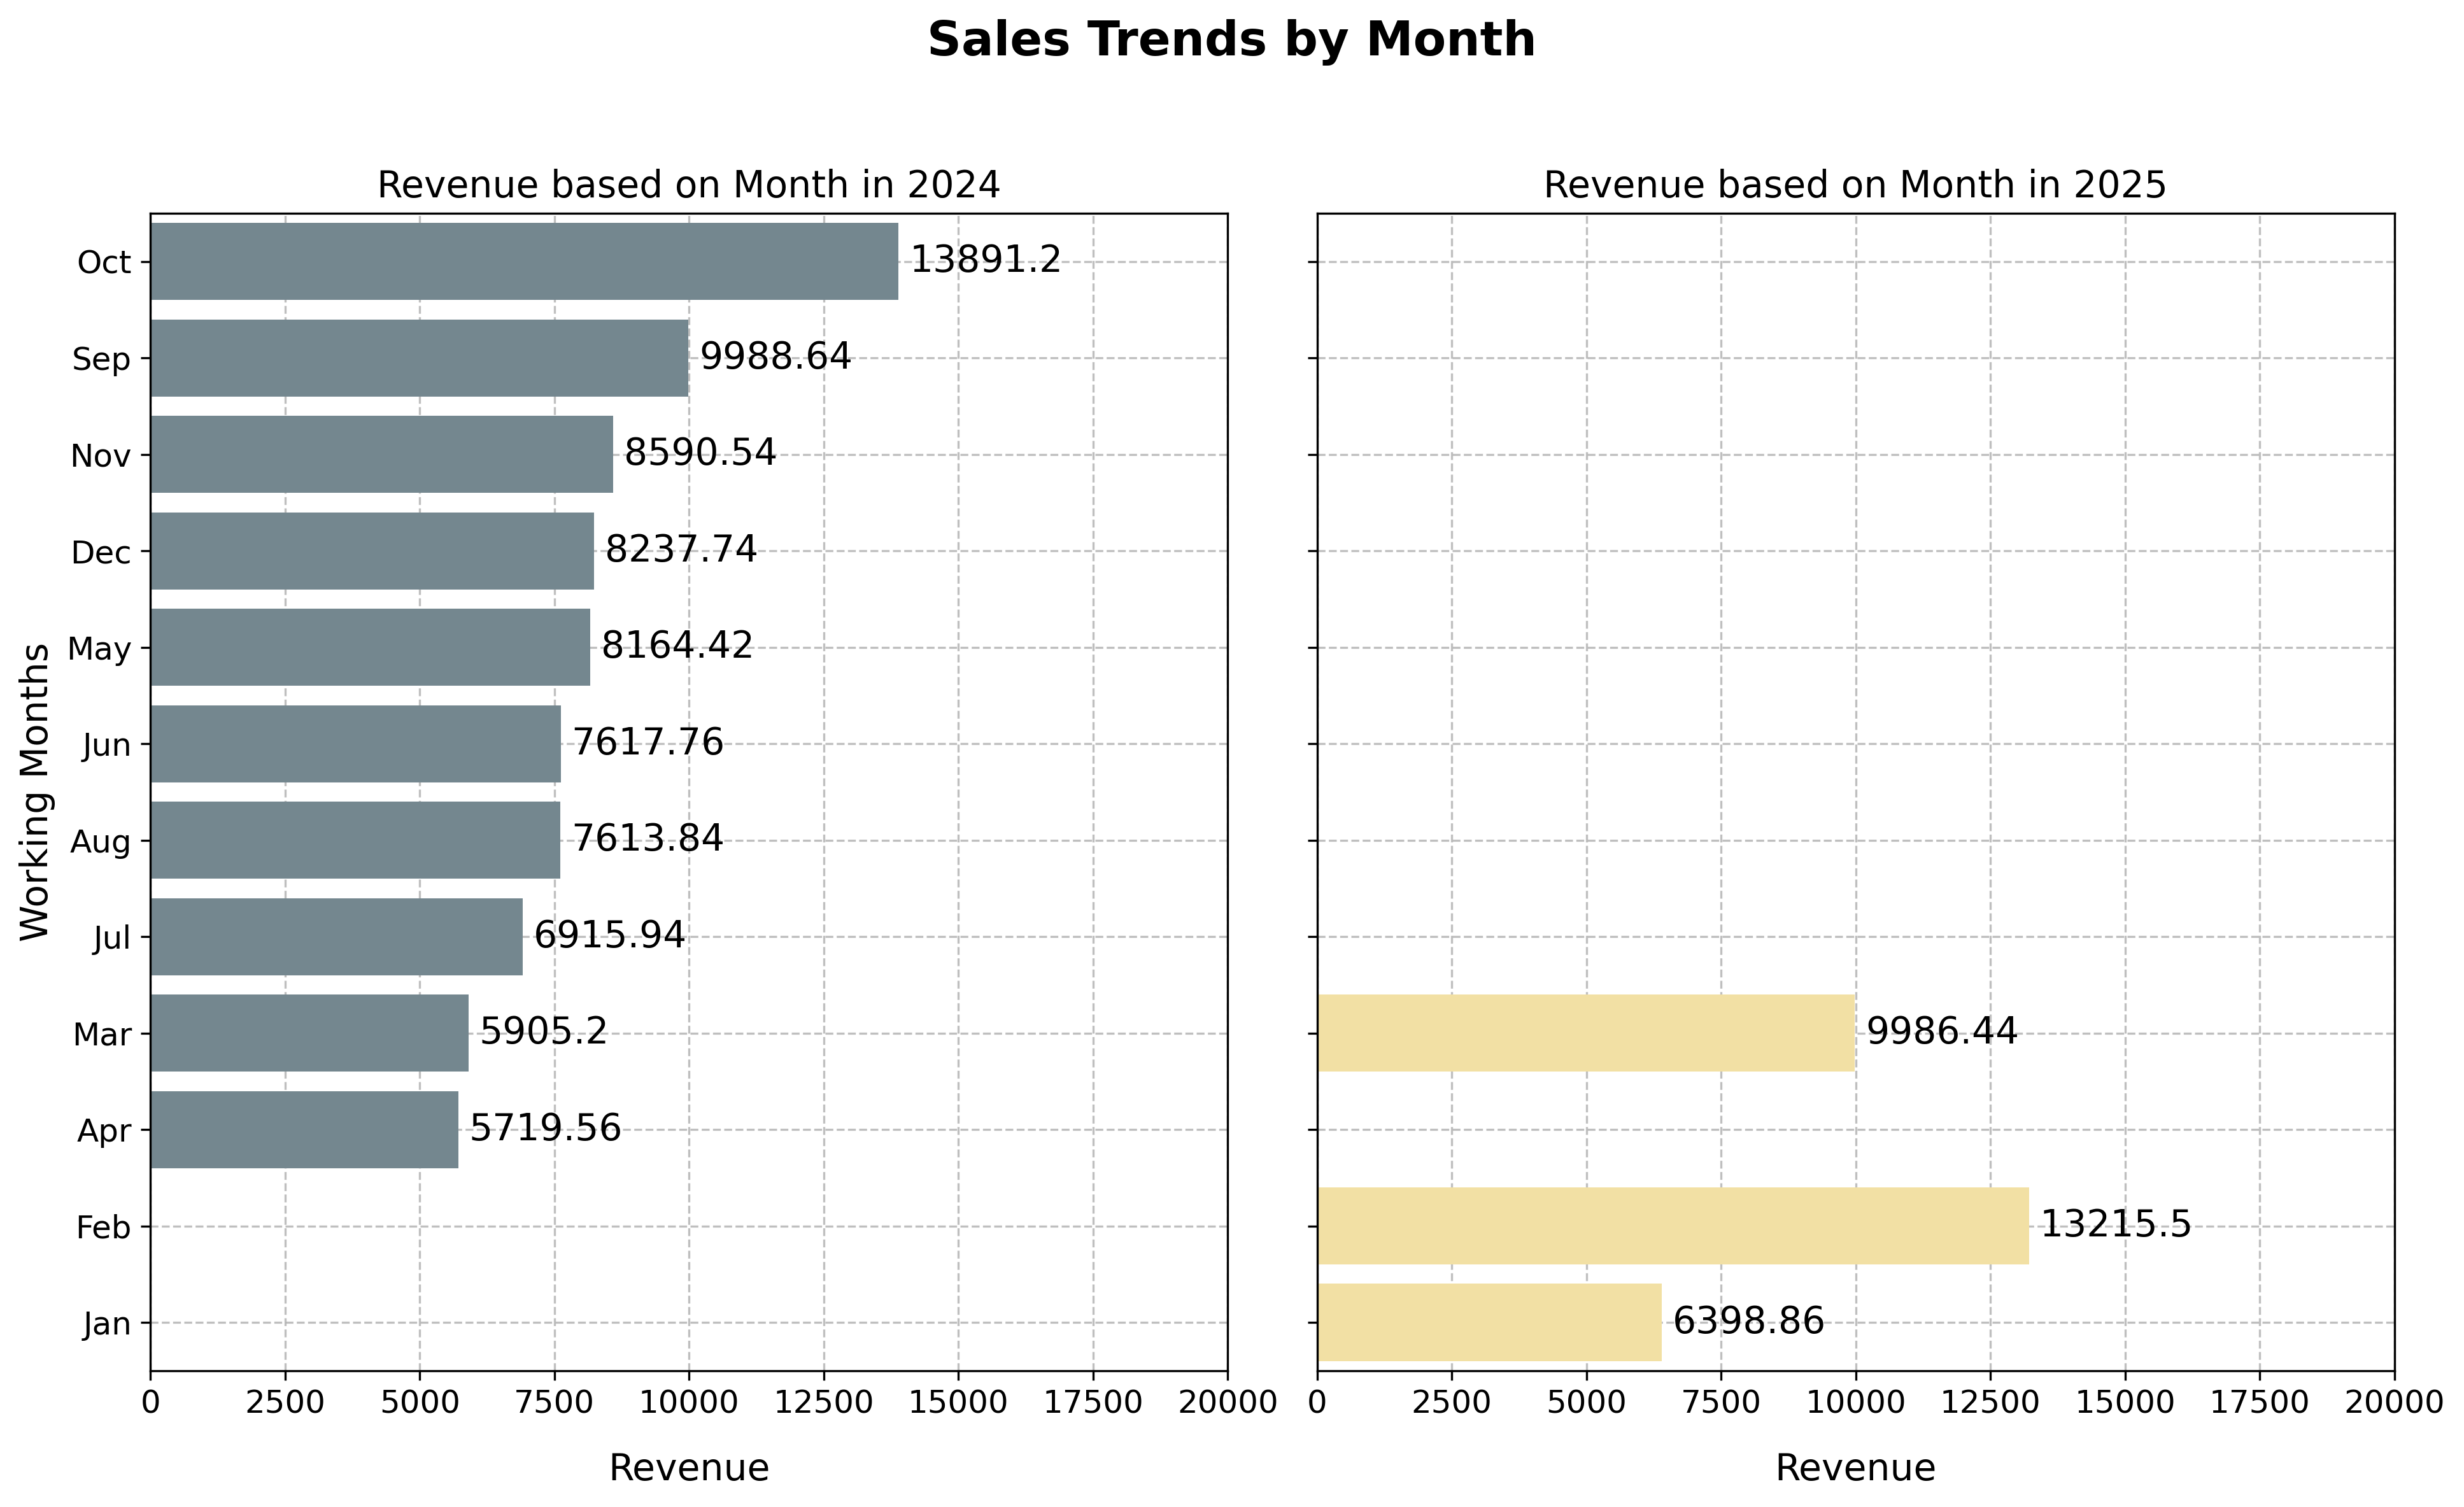

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(13,8), sharey=True,dpi=300)

month24 = month[month['year']==2024].sort_values(by='money',ascending=False)
month25 = month[month['year']==2025].sort_values(by='money',ascending=False)


# Plot 2024
sns.barplot(x='money', y='Month_name', data=month24, ax=axes[0], color="#708993", orient='h',dodge=True)
axes[0].set_title("Revenue based on Month in 2024",fontsize=14)
axes[0].set_xlim(0, 20000)
axes[0].set_xlabel("Revenue",fontsize=14,labelpad=12)
axes[0].set_ylabel("Working Months",fontsize=14)
axes[0].bar_label(axes[0].containers[0],fontsize=14,padding=4) 
axes[0].tick_params(axis='y', labelsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].xaxis.grid(True, linestyle="--", alpha=0.8)
axes[0].yaxis.grid(True, linestyle="--", alpha=0.8)
axes[0].set_axisbelow(True)


# Plot 2025
sns.barplot(x='money', y='Month_name', data=month25, ax=axes[1], color="#FFE797", orient='h',dodge=True)
axes[1].set_title("Revenue based on Month in 2025",fontsize=14)
axes[1].set_xlim(0, 20000)
axes[1].set_xlabel("Revenue",fontsize=14,labelpad=12)
axes[1].set_ylabel("")
axes[1].bar_label(axes[1].containers[0],fontsize=14,padding=4)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].xaxis.grid(True, linestyle="--", alpha=0.8)
axes[1].yaxis.grid(True, linestyle="--", alpha=0.8)
axes[1].set_axisbelow(True)

plt.suptitle("Sales Trends by Month", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [37]:
monthT = df.groupby('Month_name')['money'].sum().reset_index()
monthT.loc[12,:] = ["Mar (Average)",monthT.loc[7,'money'] / 2]
monthT = monthT.sort_values(by='money',ascending=False)
monthT

Month_name     money
7             Mar  15891.64
10            Oct  13891.16
3             Feb  13215.48
11            Sep   9988.64
9             Nov   8590.54
2             Dec   8237.74
8             May   8164.42
12  Mar (Average)   7945.82
6             Jun   7617.76
1             Aug   7613.84
5             Jul   6915.94
4             Jan   6398.86
0             Apr   5719.56

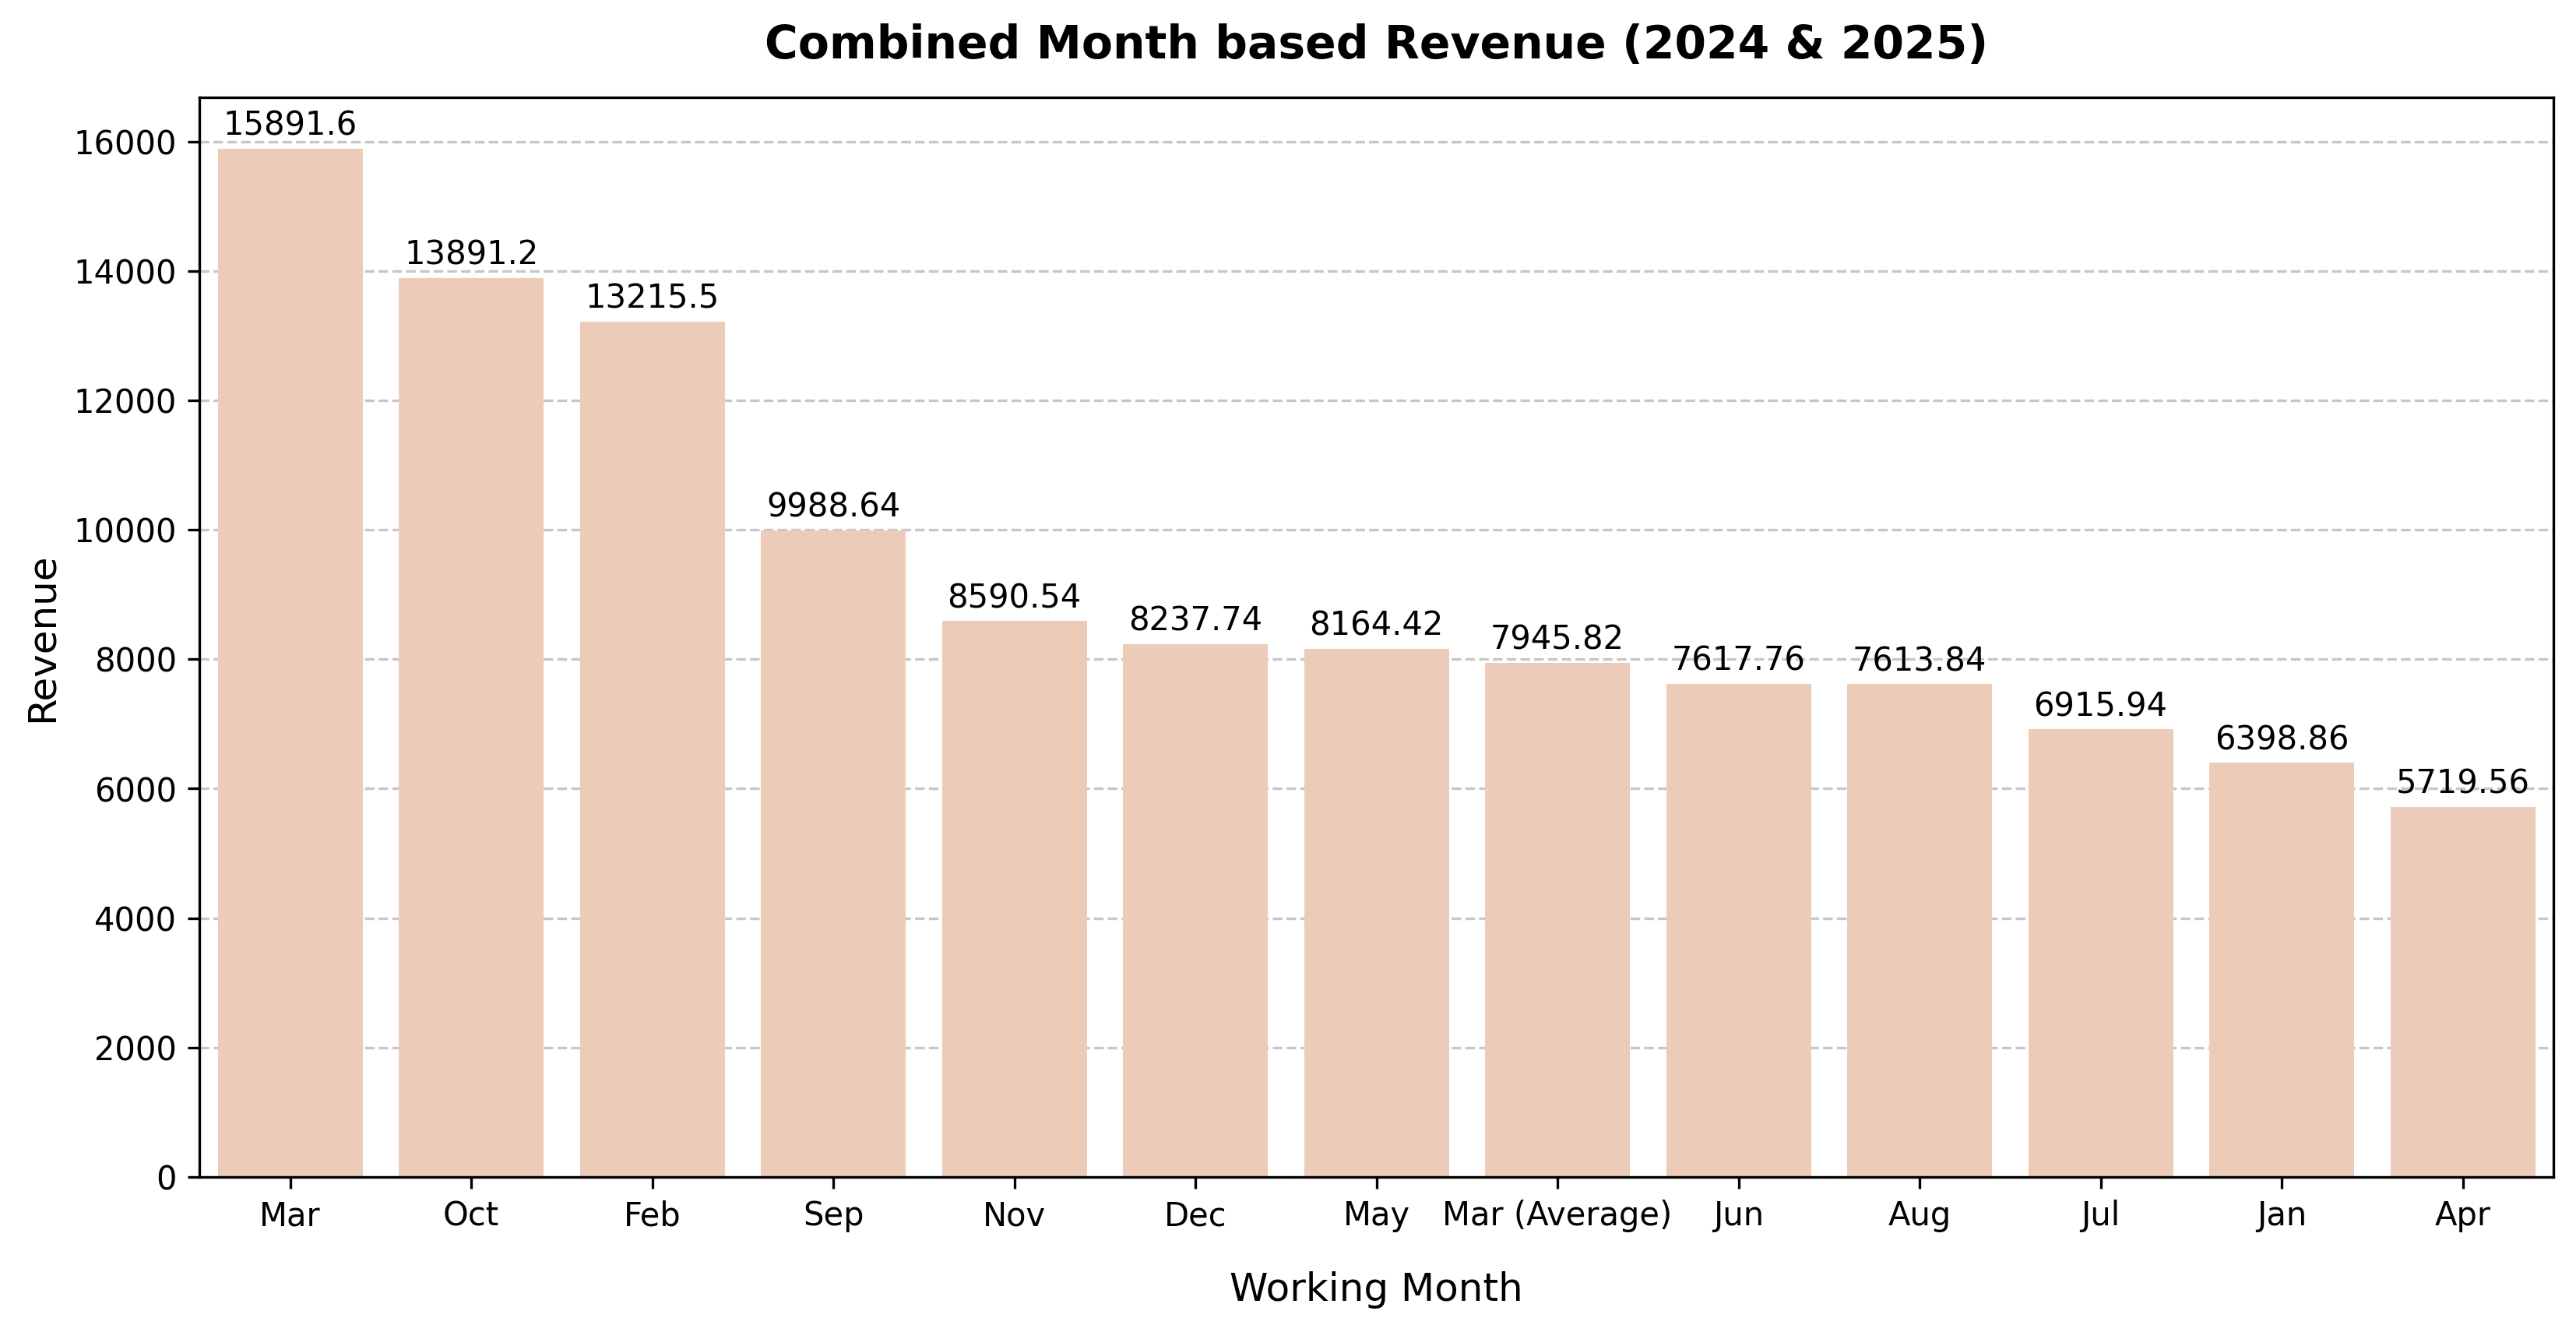

In [38]:
plt.figure(figsize=(13,6),dpi=300)
ax=sns.barplot(x='Month_name',y='money',data=monthT,color='#F5C9B0')
ax.bar_label(ax.containers[0],padding=2)
plt.xlabel("Working Month", fontsize=12,labelpad=12)
plt.ylabel("Revenue", fontsize=12)
plt.title('Combined Month based Revenue (2024 & 2025)', fontsize=14, fontweight='bold', pad=12)
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
plt.show()

> ### ***In 2024, Data is available from March to December. The highest sales occurred in October (13,891.16), followed by September (9,988.64) and November (8,590.54). The lowest sales were in April (5,719.56).***
> ### ***In 2025, Data is available from January to March. Peak sales were in February (13,215.48) and March (9,986.44), while the lowest was in January (6,398.86).***
> ### ***Overall (Combined 2024 & 2025), March (15,891.64) and October (13,891.16) recorded the highest sales, whereas April (5,719.56) and January (6,398.86) had the lowest.***
> ### ***Note: In the combined analysis, March shows the highest sales because it includes data from both 2024 and 2025. For a more precise comparison, one could consider averaging the values across the years.***

### ◉ *What is the best month for coffee sales?*

> ### ***In 2024, October recorded the highest coffee sales, making it the best month of the year.***
> ### ***In 2025, February achieved peak coffee sales, emerging as the top month.***
> ### ***Overall, when combining data from 2024 and 2025, March and October stand out as the best months for coffee sales.***

### ◉ *Is there any seasonal pattern in coffee sales?*

In [39]:
season = df.groupby(['Month_name','year'])['money'].sum().reset_index().sort_values(by='money',ascending=False)
def to_season(value):
    if value == 'Dec' or value== 'Jan' or value== 'Feb':
        return "Winter (Dec, Jan, Feb)"
    if value == 'Mar' or value=='Apr' or value=='May':
        return "Spring (Mar, Apr, May)"
    if value == 'Jun' or value=='Jul' or value=='Aug':
        return "Summer (Jun, Jul, Aug)"
    if value == 'Sep' or value=='Oct' or value=='Nov':
        return "Autumn (Sep, Oct, Nov)"

season['season']=season['Month_name'].apply(to_season)
season

Month_name  year     money                  season
11        Oct  2024  13891.16  Autumn (Sep, Oct, Nov)
3         Feb  2025  13215.48  Winter (Dec, Jan, Feb)
12        Sep  2024   9988.64  Autumn (Sep, Oct, Nov)
8         Mar  2025   9986.44  Spring (Mar, Apr, May)
10        Nov  2024   8590.54  Autumn (Sep, Oct, Nov)
2         Dec  2024   8237.74  Winter (Dec, Jan, Feb)
9         May  2024   8164.42  Spring (Mar, Apr, May)
6         Jun  2024   7617.76  Summer (Jun, Jul, Aug)
1         Aug  2024   7613.84  Summer (Jun, Jul, Aug)
5         Jul  2024   6915.94  Summer (Jun, Jul, Aug)
4         Jan  2025   6398.86  Winter (Dec, Jan, Feb)
7         Mar  2024   5905.20  Spring (Mar, Apr, May)
0         Apr  2024   5719.56  Spring (Mar, Apr, May)

In [40]:
season = season.groupby(['season','year'])['money'].sum().reset_index().sort_values(by=['year','money'],ascending=[True,False])
season

season  year     money
0  Autumn (Sep, Oct, Nov)  2024  32470.34
3  Summer (Jun, Jul, Aug)  2024  22147.54
1  Spring (Mar, Apr, May)  2024  19789.18
4  Winter (Dec, Jan, Feb)  2024   8237.74
5  Winter (Dec, Jan, Feb)  2025  19614.34
2  Spring (Mar, Apr, May)  2025   9986.44

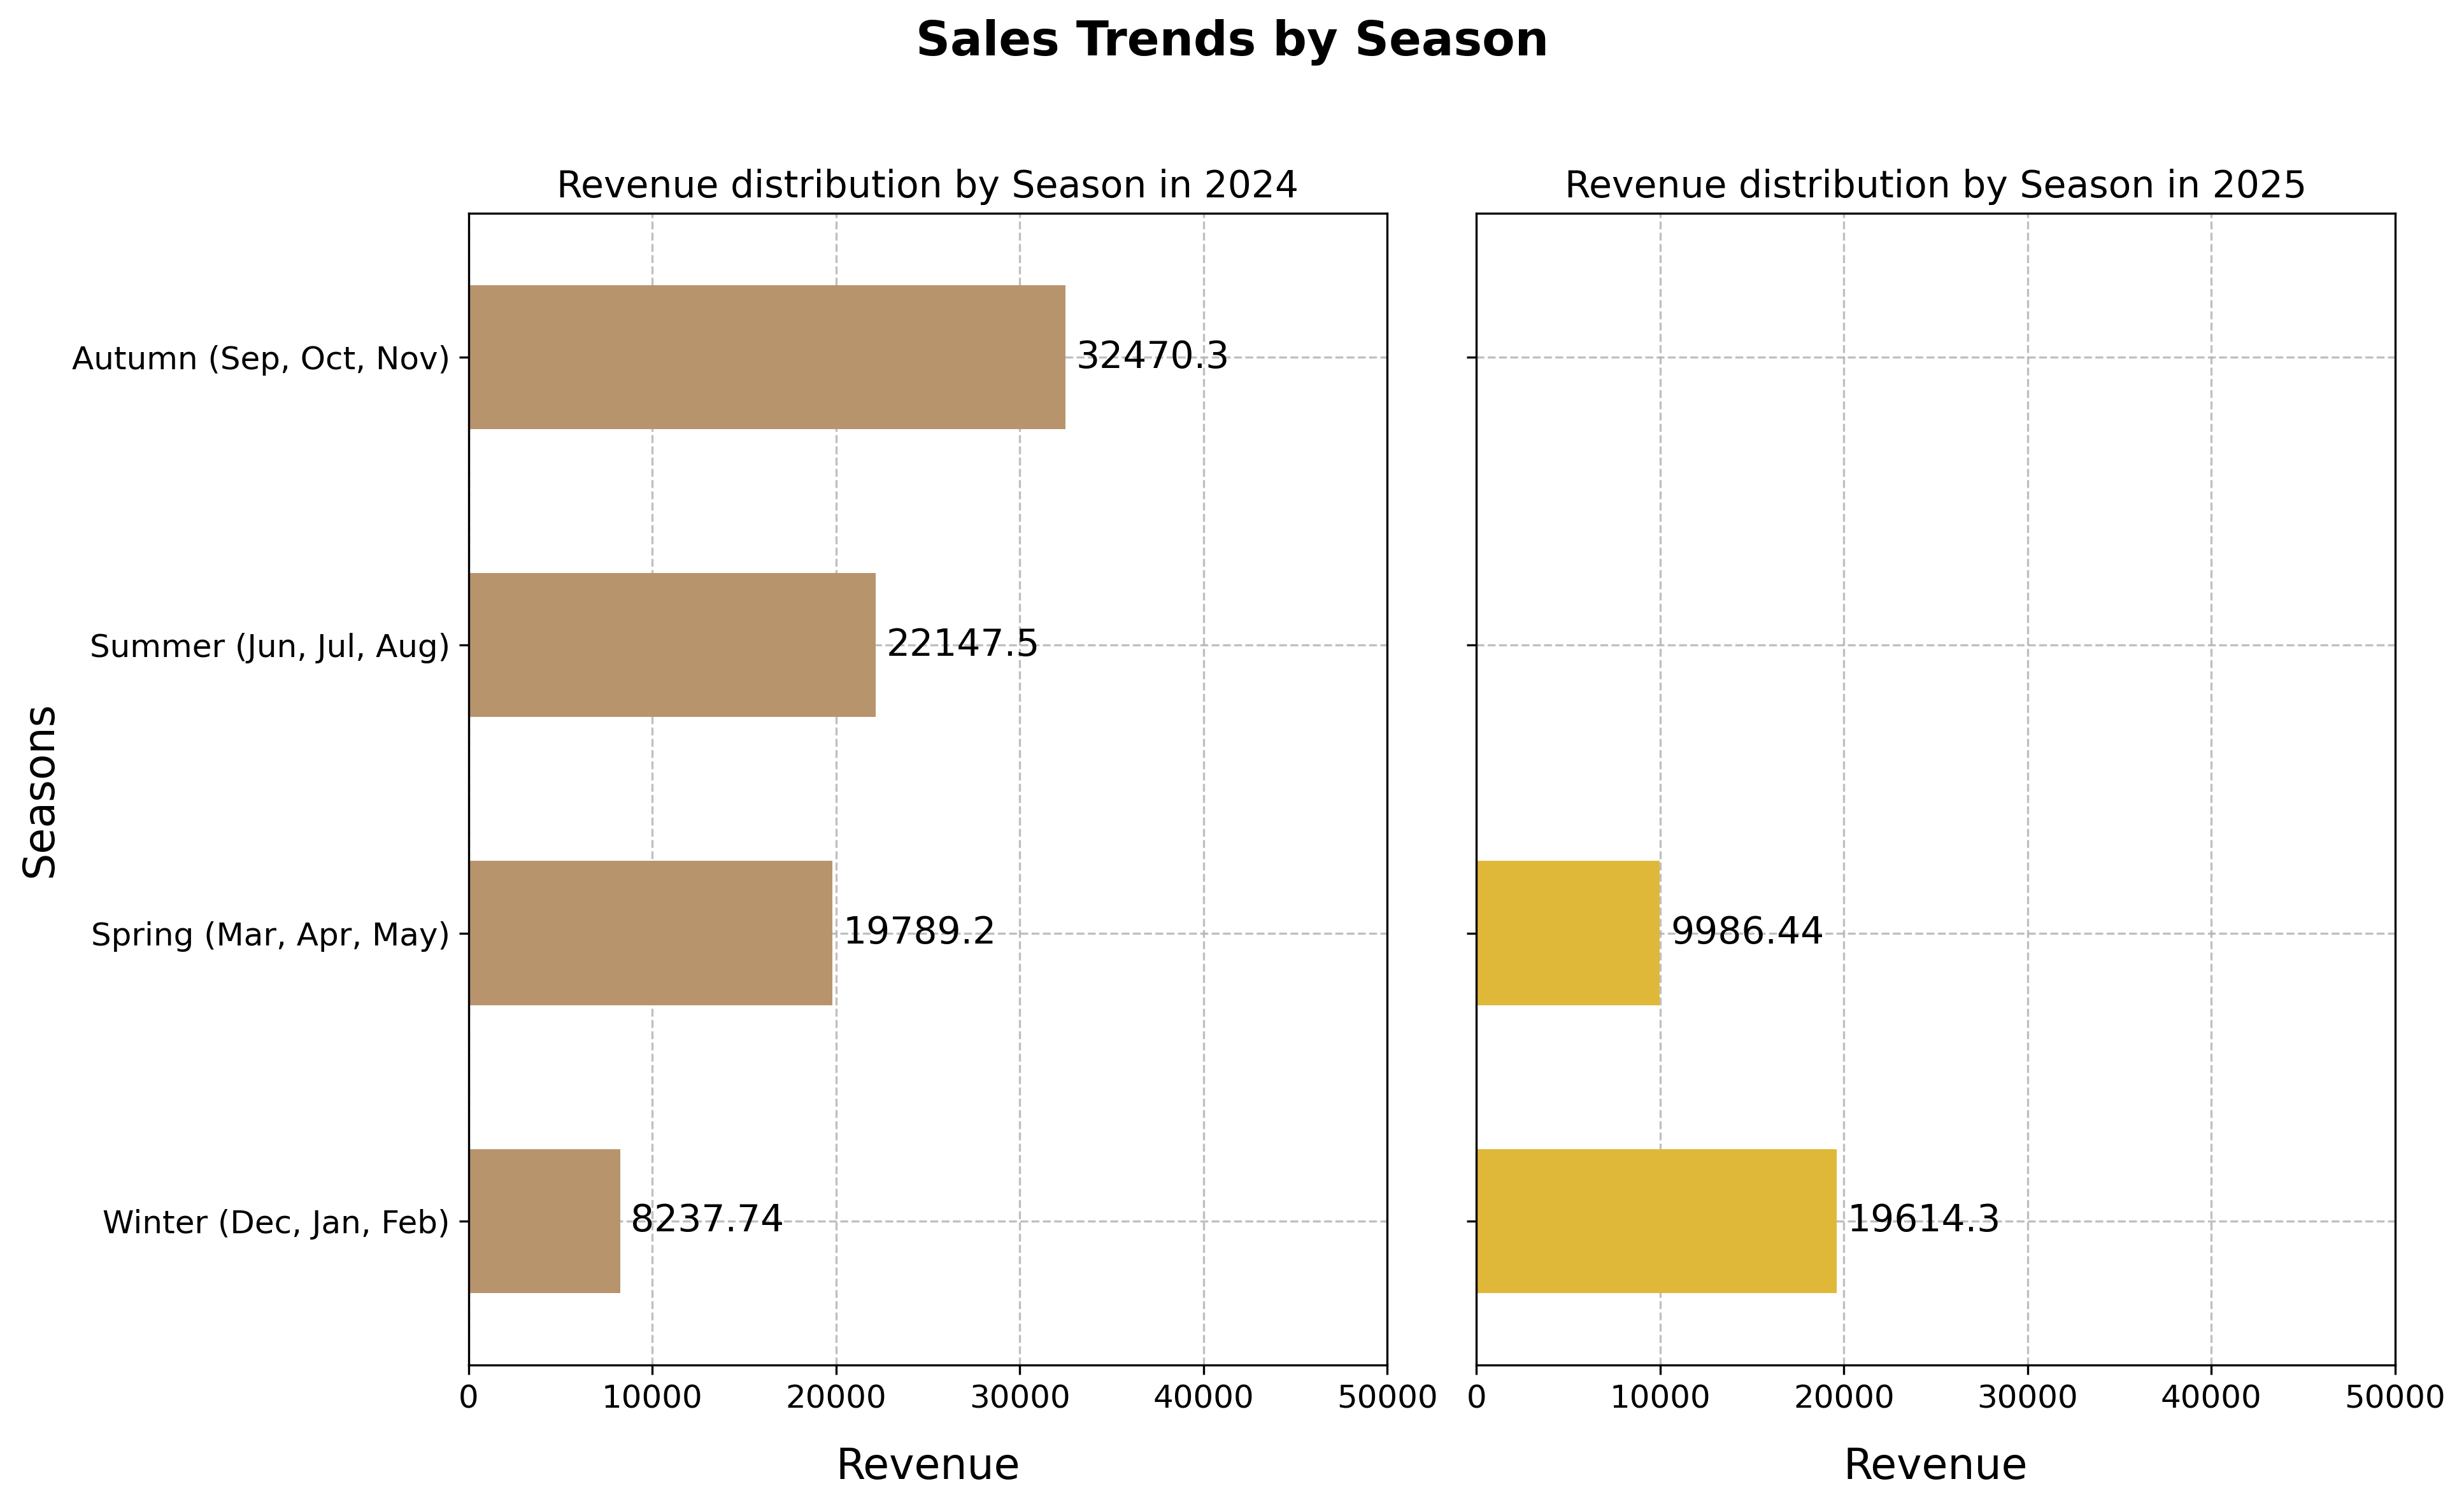

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(13,8), sharey=True,dpi=300)

season24 = season[season['year']==2024].sort_values(by='money',ascending=False)
season25 = season[season['year']==2025].sort_values(by='money',ascending=False)


# Plot 2024
sns.barplot(x='money', y='season', data=season24, ax=axes[0], color="#C59560", orient='h',dodge=True,width=0.5)
axes[0].set_title("Revenue distribution by Season in 2024",fontsize=14)
axes[0].set_xlim(0, 50000)
axes[0].set_xlabel("Revenue",fontsize=16,labelpad=12)
axes[0].set_ylabel("Seasons",fontsize=16)
axes[0].bar_label(axes[0].containers[0],fontsize=14,padding=4) 
axes[0].tick_params(axis='y', labelsize=12)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].xaxis.grid(True, linestyle="--", alpha=0.8)
axes[0].yaxis.grid(True, linestyle="--", alpha=0.8)
axes[0].set_axisbelow(True)


# Plot 2025
sns.barplot(x='money', y='season', data=season25, ax=axes[1], color="#FCC61D", orient='h',dodge=True,width=0.5)
axes[1].set_title("Revenue distribution by Season in 2025",fontsize=14)
axes[1].set_xlim(0, 50000)
axes[1].set_xlabel("Revenue",fontsize=16,labelpad=12)
axes[1].set_ylabel("")
axes[1].bar_label(axes[1].containers[0],fontsize=14,padding=4)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].xaxis.grid(True, linestyle="--", alpha=0.8)
axes[1].yaxis.grid(True, linestyle="--", alpha=0.8)
axes[1].set_axisbelow(True)

plt.suptitle("Sales Trends by Season", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [42]:
seasonT = season.groupby(['season'])['money'].sum().reset_index().sort_values(by="money",ascending=False)
seasonT

season     money
0  Autumn (Sep, Oct, Nov)  32470.34
1  Spring (Mar, Apr, May)  29775.62
3  Winter (Dec, Jan, Feb)  27852.08
2  Summer (Jun, Jul, Aug)  22147.54

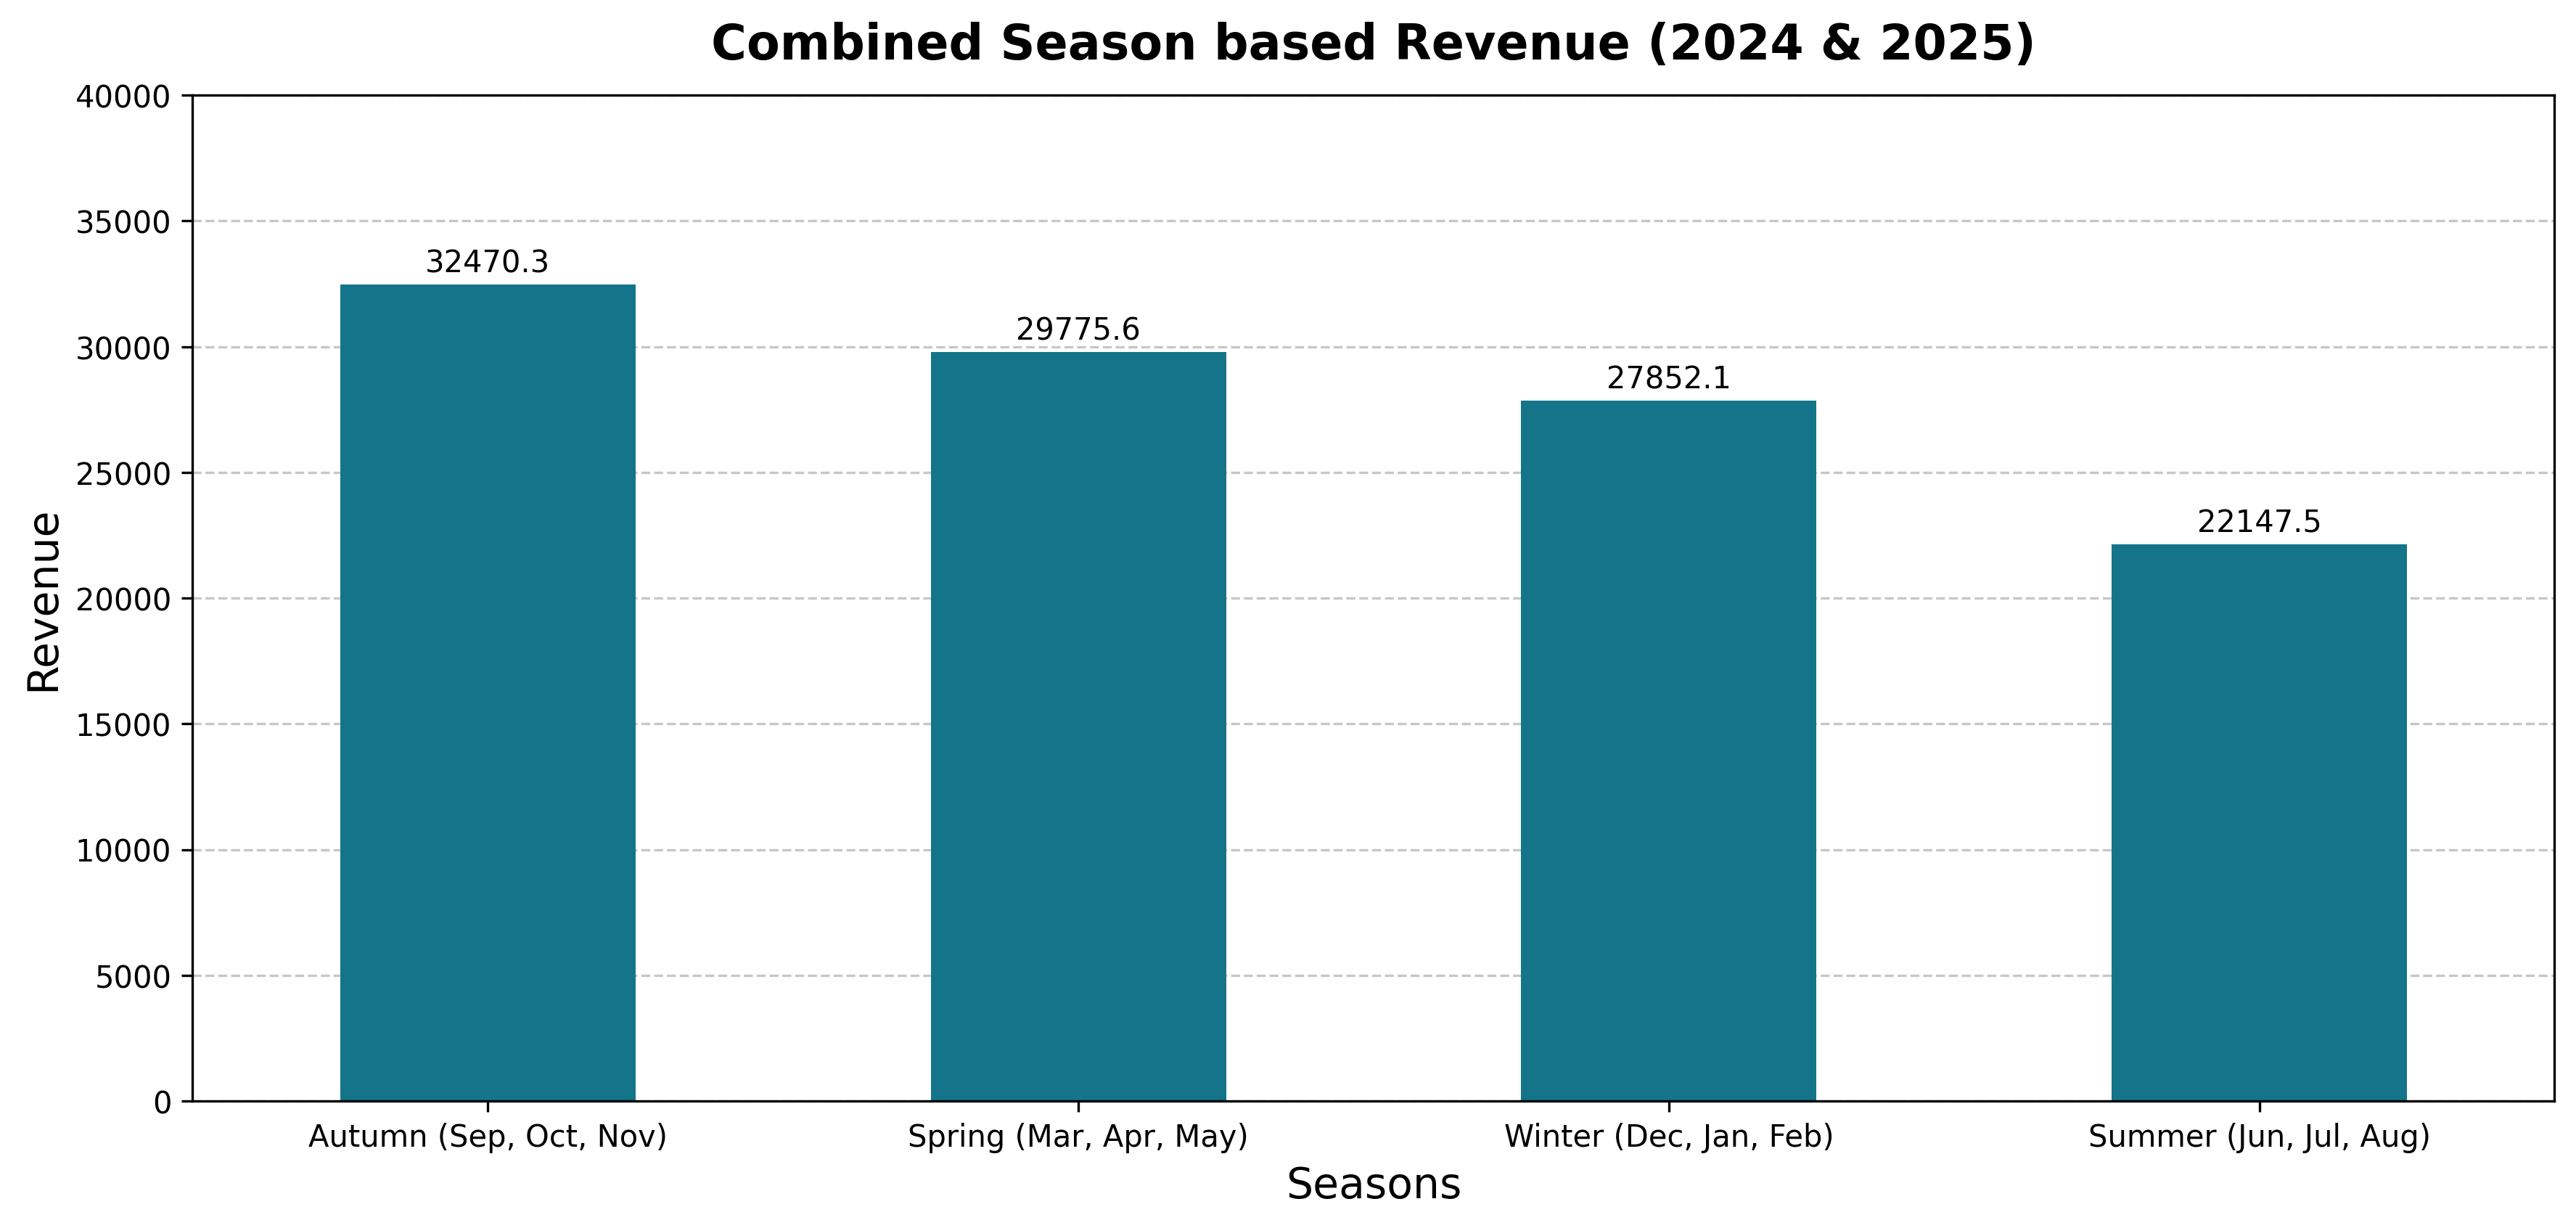

In [43]:
plt.figure(figsize=(14,6),dpi=300)
ax=sns.barplot(x='season',y='money',data=seasonT,color='#00809D',width=0.5)
ax.bar_label(ax.containers[0],padding=2)
plt.xlabel("Seasons", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.title('Combined Season based Revenue (2024 & 2025)', fontsize=16, fontweight='bold', pad=12)
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
plt.ylim(0,40000)
plt.show()

> ### ***In 2024, Autumn recorded the highest sales revenue at ₹32,470.34, followed by Summer (₹22,147.54) and Spring (₹19,789.18).***
> ### ***In 2025, Winter led with ₹19,614.34, followed by Spring (₹9,986.44).***
> ### ***Note: 2025 data only covers the Spring season (January to March 2025).***
> ### ***Overall, combining both years, Autumn remains the top revenue-generating season (₹32,470.34), followed by Spring (₹29,775.62), Winter (₹27,852.08), and Summer (₹22,147.54).***

### ◉ *How has revenue changed over time (daily/weekly trend)?*

In [44]:
daily = df.groupby(['Date','Weekday'])['money'].sum().reset_index()
daily['Day'] = daily['Date'].dt.day
daily['Month'] = daily['Date'].dt.month
daily

Date Weekday   money  Day  Month
0   2024-03-01     Fri  396.30    1      3
1   2024-03-02     Sat  188.10    2      3
2   2024-03-03     Sun  309.10    3      3
3   2024-03-04     Mon  135.20    4      3
4   2024-03-05     Tue  338.50    5      3
..         ...     ...     ...  ...    ...
376 2025-03-19     Wed  623.56   19      3
377 2025-03-20     Thu  597.60   20      3
378 2025-03-21     Fri  636.80   21      3
379 2025-03-22     Sat  365.42   22      3
380 2025-03-23     Sun  204.76   23      3

[381 rows x 5 columns]

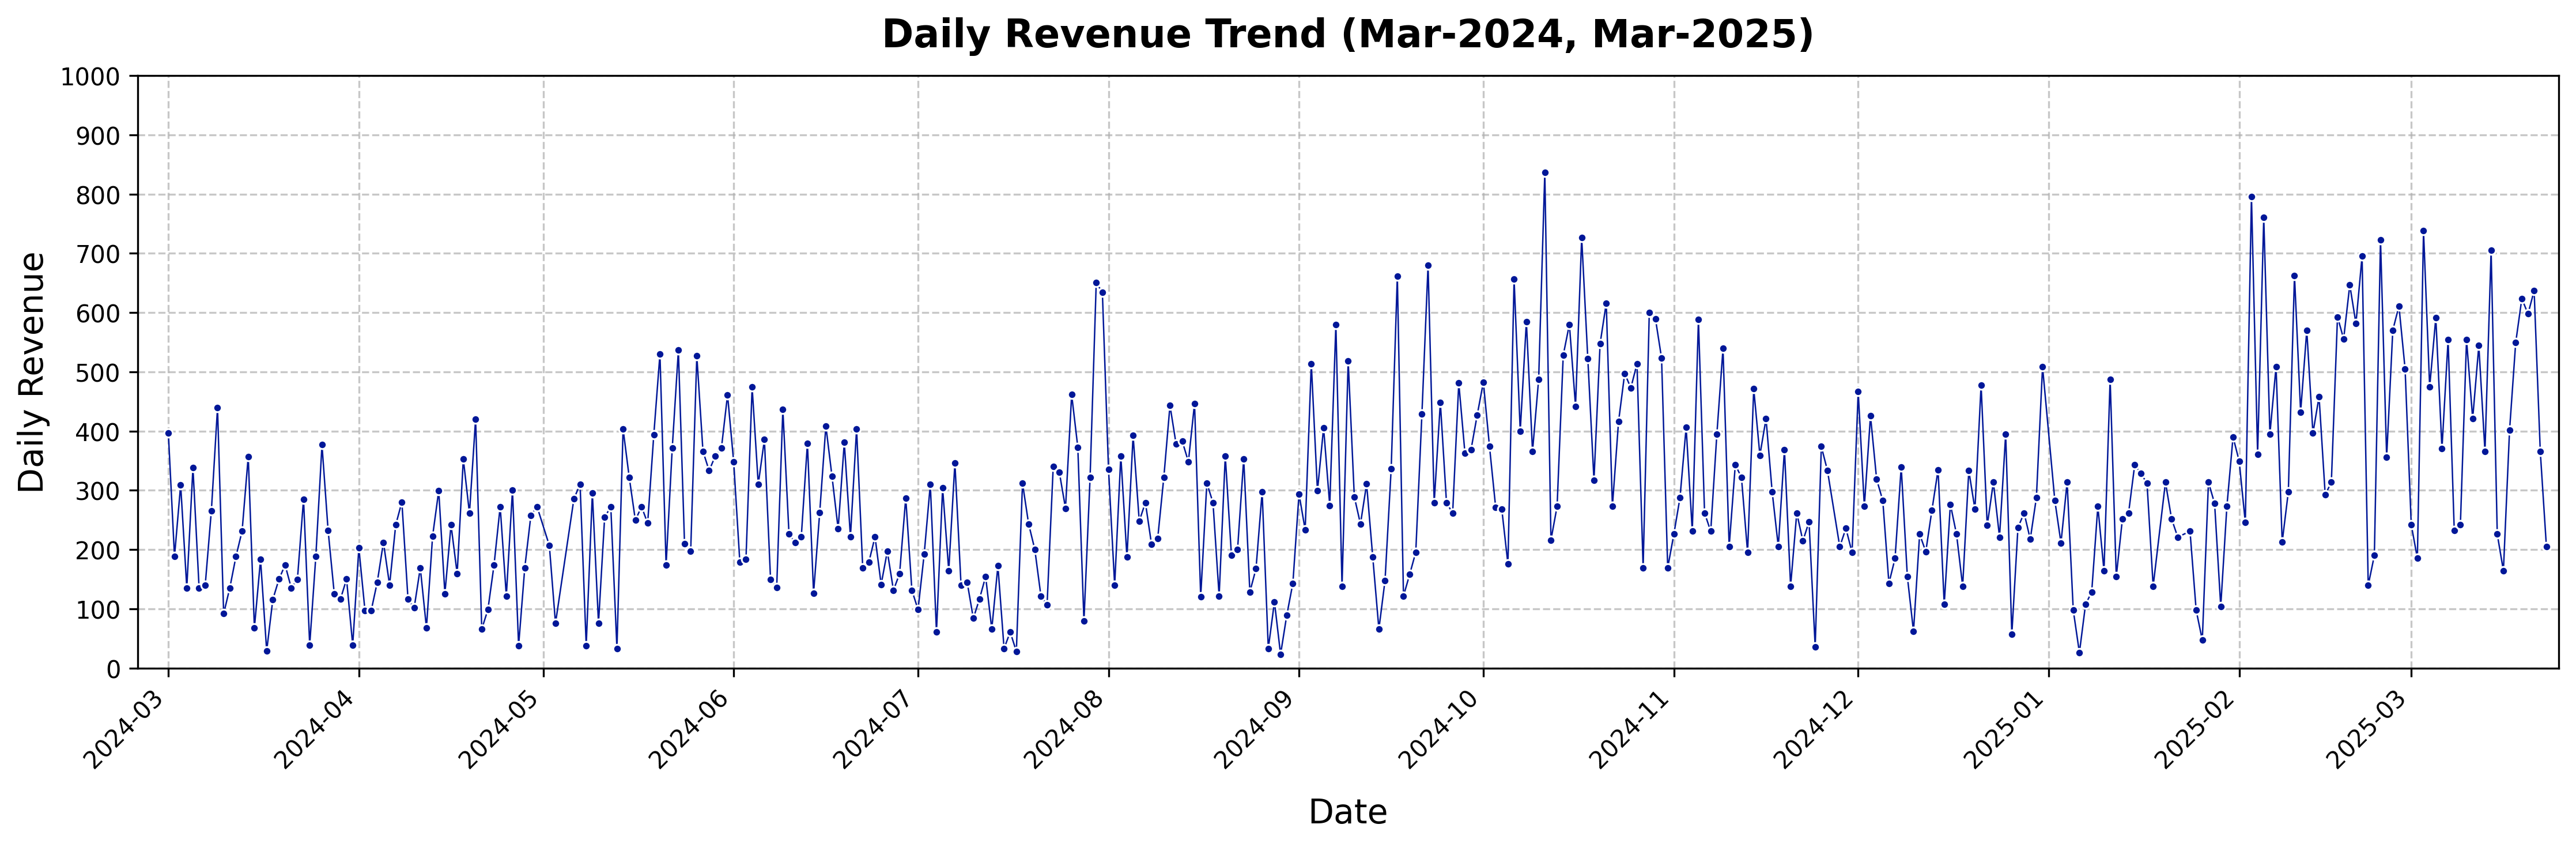

In [45]:
plt.figure(figsize=(15,5),dpi=300)

ax = sns.lineplot(x='Date', y='money', data=daily, color="#001798", marker='o',linewidth=0.6,markersize=3.5)

start = pd.to_datetime('2024-03-01')
end = pd.to_datetime('2025-03-31')
month_ticks = pd.date_range(start=start, end=end, freq='MS')  # 'MS' = Month Start
ax.set_xticks(month_ticks)
ax.set_xticklabels(month_ticks.strftime('%Y-%m'), rotation=45, ha='right')
ax.set_yticks(range(0, 1001, 100))
plt.xlabel("Date", fontsize=14, labelpad=10)
plt.ylabel("Daily Revenue", fontsize=14)
plt.title("Daily Revenue Trend (Mar-2024, Mar-2025)", fontsize=16, fontweight='bold', pad=12)
    
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.xaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
plt.xlim(pd.to_datetime('2024-02-25'),pd.to_datetime('2025-03-25'))
plt.ylim(0, 1000)
plt.tight_layout()
plt.show()

In [46]:
daily.sort_values(by='money',ascending=False).head(10)

Date Weekday   money  Day  Month
221 2024-10-11     Fri  836.66   11     10
332 2025-02-03     Mon  796.00    3      2
334 2025-02-05     Wed  760.24    5      2
360 2025-03-03     Mon  737.72    3      3
227 2024-10-17     Thu  726.46   17     10
353 2025-02-24     Mon  723.02   24      2
371 2025-03-14     Fri  704.88   14      3
350 2025-02-21     Fri  695.08   21      2
202 2024-09-22     Sun  679.88   22      9
339 2025-02-10     Mon  662.76   10      2

In [47]:
daily.sort_values(by='money',ascending=True).head(10)

Date Weekday  money  Day  Month
178 2024-08-29     Thu  23.02   29      8
306 2025-01-06     Mon  25.96    6      1
135 2024-07-17     Wed  27.92   17      7
16  2024-03-17     Sun  28.90   17      3
176 2024-08-27     Tue  32.82   27      8
70  2024-05-13     Mon  32.82   13      5
133 2024-07-15     Mon  32.82   15      7
265 2024-11-24     Sun  35.76   24     11
65  2024-05-08     Wed  37.72    8      5
57  2024-04-27     Sat  37.72   27      4

> ### ***On 11 October 2024, sales peaked at 836.66, while the lowest sales were recorded on 29 August 2024 at 23.02. Overall, daily sales show a stable upward trend without any massive drops.***
> ### ***In early period (March 2024 to May 2024) Sales mostly ranged between 100–300, occasionally dropping below 100.***
> ### ***From Mid May – June 2024, Sales exceeded 500, and never dropped below 100.***
> ### ***Sales surpassed 600 in August 2024, and 800 in October 2024 indicating a strong growth phase from August 2024 to October.***
> ### ***Most of the sales occurred between 100–500.***

In [48]:
a=1
def weeksort(value):
    global a
    if value=="Mon":
        a=a+1
    return a

daily['Week_label'] = daily['Weekday'].apply(weeksort)
weekly = daily.groupby('Week_label')['money'].sum().reset_index()
weekly.head()

Week_label   money
0           1   893.5
1           2  1545.5
2           3  1191.3
3           4  1047.8
4           5  1227.1

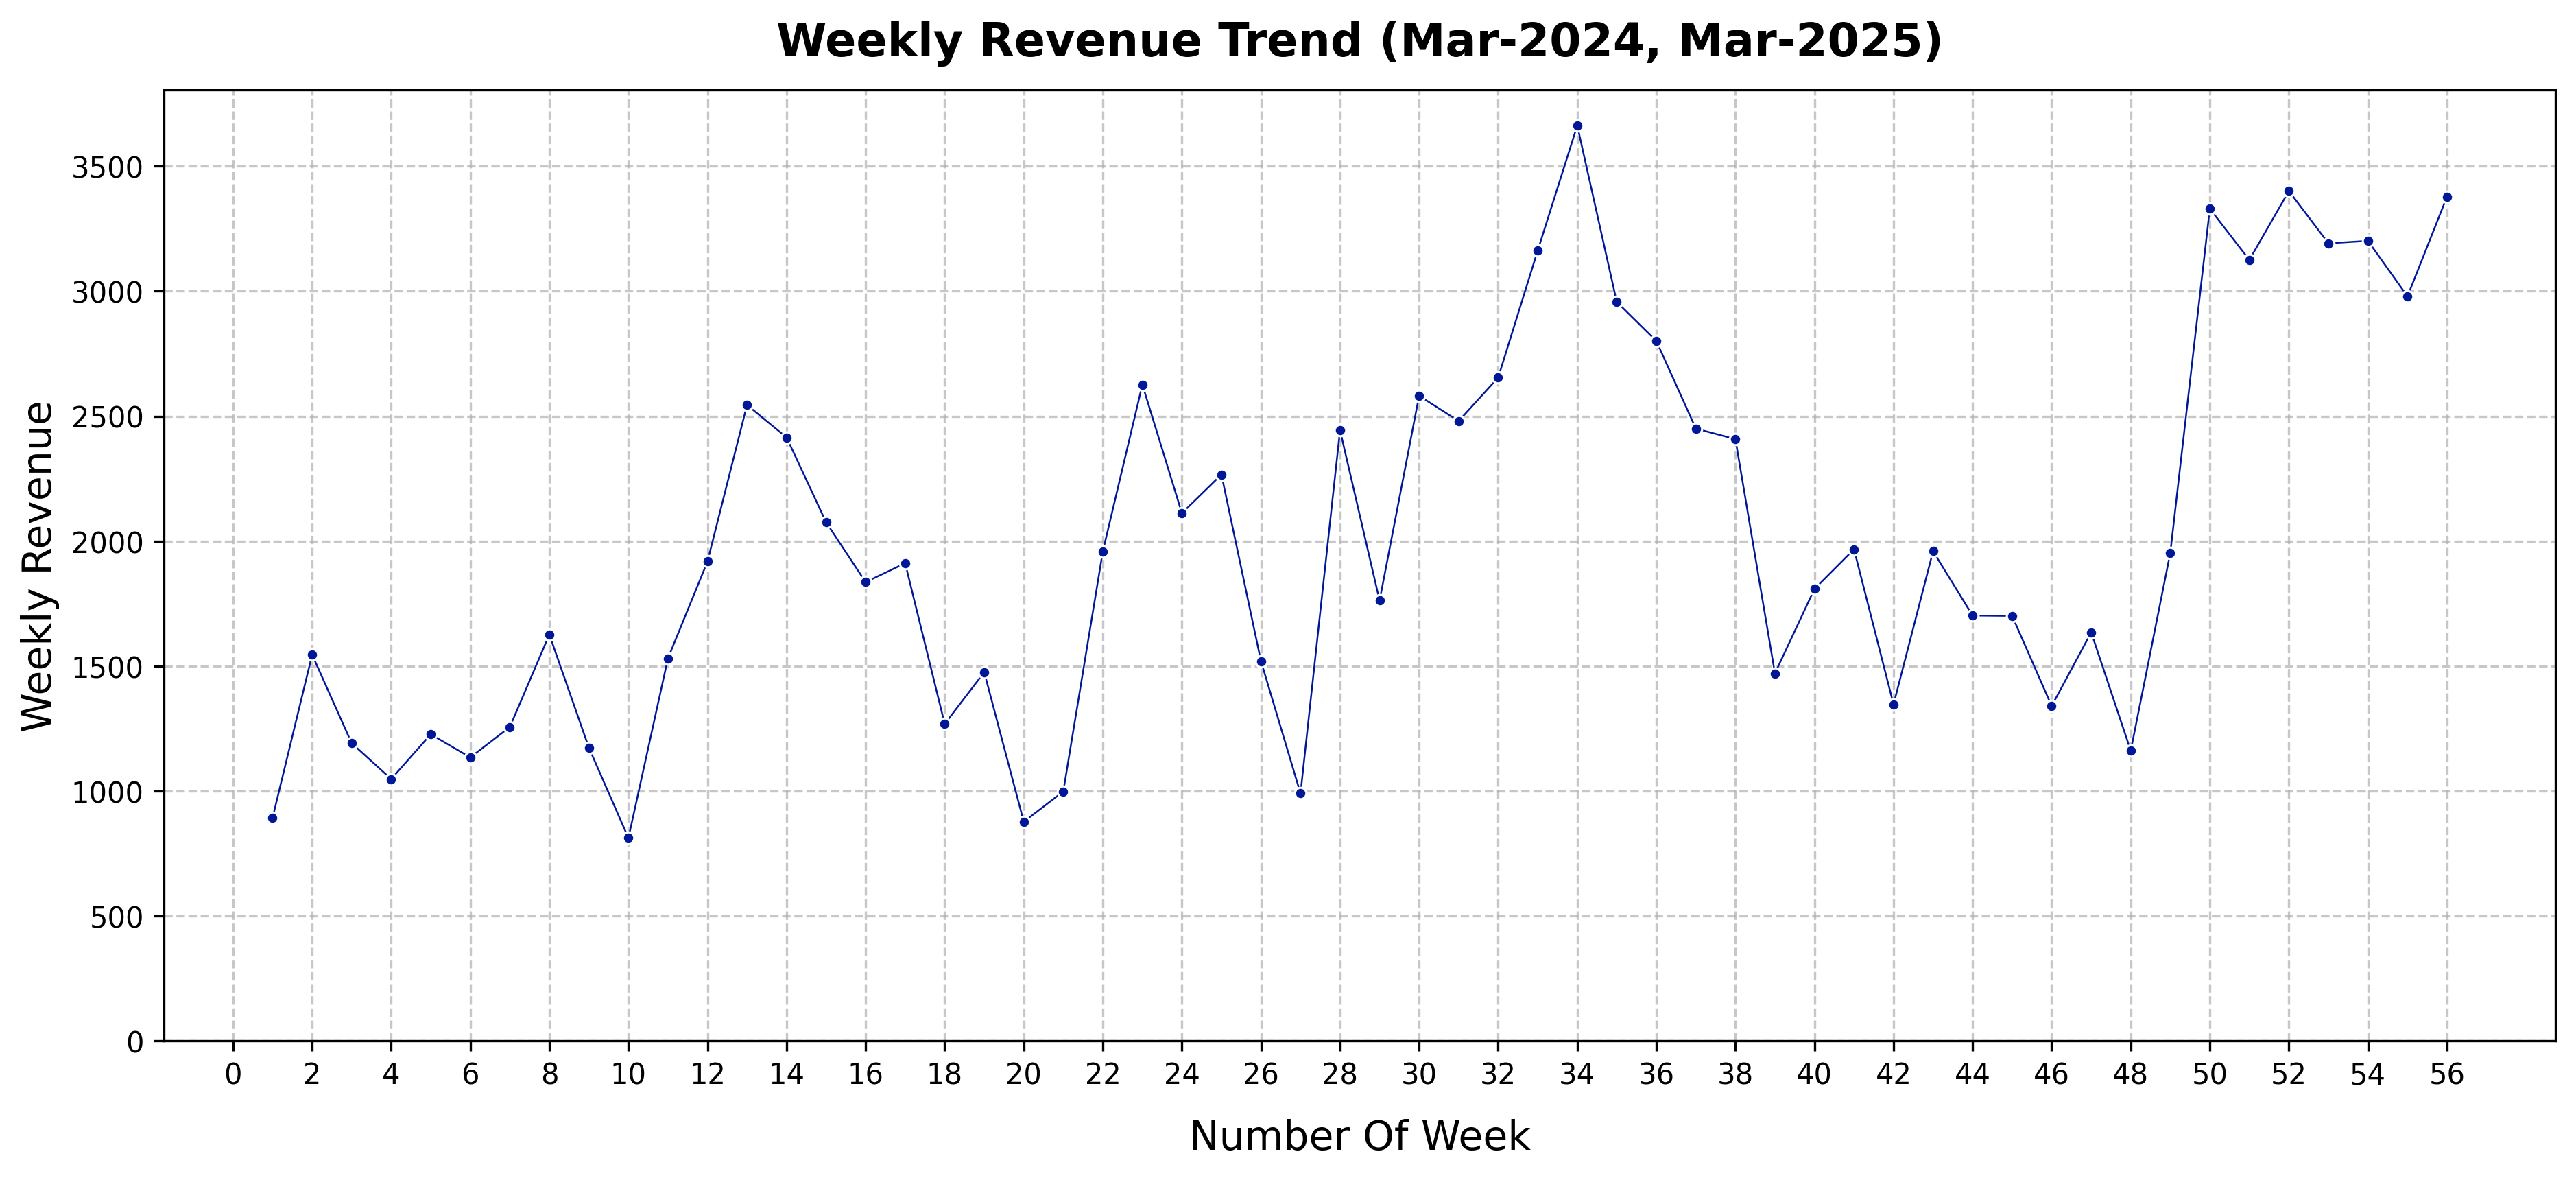

In [49]:
plt.figure(figsize=(15,6),dpi=300)

ax = sns.lineplot(x='Week_label', y='money', data=weekly, color="#001798", marker='o',linewidth=0.6,markersize=4)

plt.xlabel("Number Of Week", fontsize=14, labelpad=10)
plt.ylabel("Weekly Revenue", fontsize=14)
plt.title("Weekly Revenue Trend (Mar-2024, Mar-2025)", fontsize=16, fontweight='bold', pad=12)

ax.set_xticks(range(0,57,2))
ax.set_yticks(range(0,4000,500))

ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.xaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)

plt.show()

> ### ***Weekly sales show a general upward trend with some fluctuations, starting at 893.50 in Week 1 and dipping to the lowest at 812.18 in Week 10.***
> ### ***Weeks 1–10 indicate moderate growth, with sales mostly between 800–1500 and occasional spikes above 1500.***
> ### ***Weeks 11–34 mark a strong growth phase, eventually exceeding 2000 (Week:13 to 15,23 to 39) and peaking at 3662.64 in Week 34.***
> ### ***Weeks 50–56 maintain high sales, often above 3000, ending the year strong at 3378.44 in Week 56.***

In [50]:
def month_label(row):
    if row['Month'] == 1:
        return f"Jan ({row['year']:.0f})"
    elif row['Month'] == 2:
        return f"Feb ({row['year']:.0f})"
    elif row['Month'] == 3:
        return f"Mar ({row['year']:.0f})"
    elif row['Month'] == 4:
        return f"Apr ({row['year']:.0f})"
    elif row['Month'] == 5:
        return f"May ({row['year']:.0f})"
    elif row['Month'] == 6:
        return f"Jun ({row['year']:.0f})"
    elif row['Month'] == 7:
        return f"Jul ({row['year']:.0f})"
    elif row['Month'] == 8:
        return f"Aug ({row['year']:.0f})"
    elif row['Month'] == 9:
        return f"Sep ({row['year']:.0f})"
    elif row['Month'] == 10:
        return f"Oct ({row['year']:.0f})"
    elif row['Month'] == 11:
        return f"Nov ({row['year']:.0f})"
    elif row['Month'] == 12:
        return f"Dec ({row['year']:.0f})"
    else:
        return "Invalid"

daily['year'] = daily["Date"].dt.year
monthly = daily.groupby(['Month','year'])['money'].sum().reset_index().sort_values(by=['year','Month'],ascending=[True,True])
monthly['year'] = monthly['year'].astype(int)
monthly['label'] = monthly.apply(month_label,axis=1)
monthly.sort_values(by='money',ascending=False)


Month  year     money       label
10     10  2024  13891.16  Oct (2024)
1       2  2025  13215.48  Feb (2025)
9       9  2024   9988.64  Sep (2024)
3       3  2025   9986.44  Mar (2025)
11     11  2024   8590.54  Nov (2024)
12     12  2024   8237.74  Dec (2024)
5       5  2024   8164.42  May (2024)
6       6  2024   7617.76  Jun (2024)
8       8  2024   7613.84  Aug (2024)
7       7  2024   6915.94  Jul (2024)
0       1  2025   6398.86  Jan (2025)
2       3  2024   5905.20  Mar (2024)
4       4  2024   5719.56  Apr (2024)

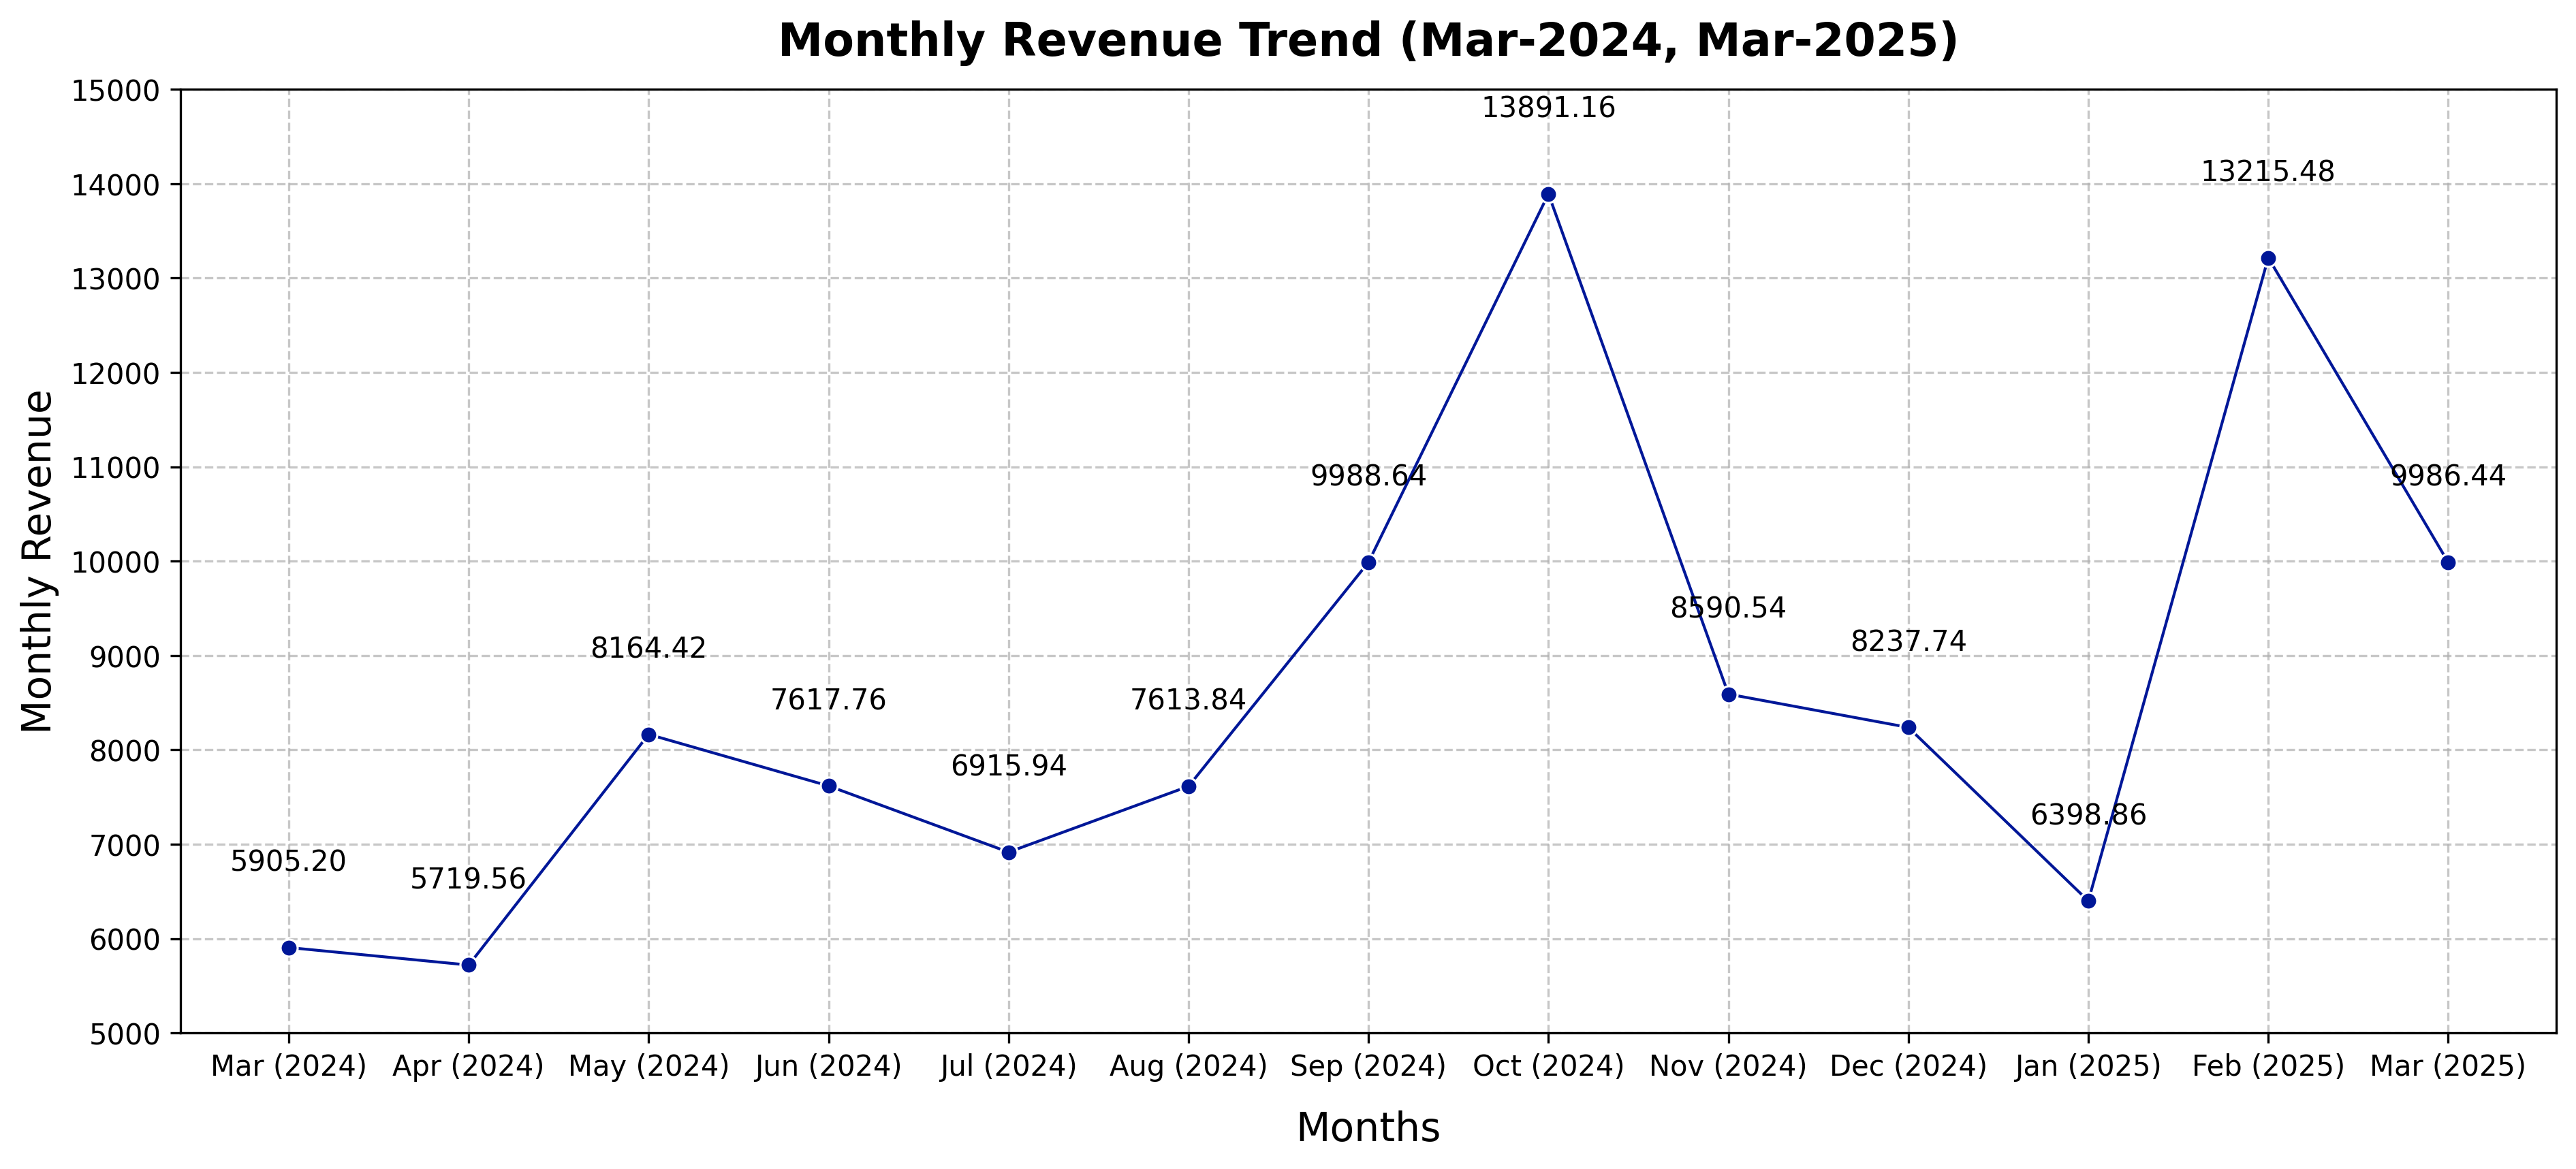

In [51]:

plt.figure(figsize=(15,6),dpi=300)

ax = sns.lineplot(x='label', y='money', data=monthly, color="#001798", marker='o',linewidth=1,markersize=6)

plt.xlabel("Months", fontsize=14, labelpad=10)
plt.ylabel("Monthly Revenue", fontsize=14)
plt.title("Monthly Revenue Trend (Mar-2024, Mar-2025)", fontsize=16, fontweight='bold', pad=12)
ax.set_yticks(range(5000,16000,1000))

for i, row in monthly.iterrows():
    ax.text(x=row['label'], y=row['money'] + 750,s=f"{row['money']:.2f}", ha='center', va='bottom',fontsize=10,color='black')

ax.yaxis.grid(True, linestyle="--", alpha=0.7)
ax.xaxis.grid(True, linestyle="--", alpha=0.7)
ax.set_axisbelow(True)
plt.show()

> ### ***Monthly revenue shows an overall fluctuating upward trend, starting at 5905.20 in Mar 2024 and dipping slightly to 5719.56 in Apr 2024.***
> ### ***Revenue rises sharply in May 2024 (8164.42) and remains strong through Sep 2024 (9988.64), peaking at 13891.16 in Oct 2024.***
> ### ***After Oct 2024, revenue dips in Nov–Jan 2025 (8590.54 to 6398.86), showing moderate decline before rising again.***
> ### ***Revenue rebounds strongly in Feb 2025 (13215.48) and remains high at 9986.44 in Mar 2025, ending the period on a strong note.***

## ***C. Customer Behavior Insights :***

### ◉ *Which coffee is most popular during mornings vs afternoons vs night?*

In [52]:
df.head()
pop = df.groupby(['Time_of_Day','coffee_name']).agg(quantity=('coffee_name', 'count')).reset_index().sort_values(by=['Time_of_Day','quantity'],ascending=[True,False])
pop

Time_of_Day          coffee_name  quantity
7    Afternoon                Latte       270
1    Afternoon  Americano with Milk       239
0    Afternoon            Americano       233
2    Afternoon           Cappuccino       164
4    Afternoon              Cortado        88
6    Afternoon        Hot Chocolate        80
3    Afternoon                Cocoa        75
5    Afternoon             Espresso        56
9      Morning  Americano with Milk       331
8      Morning            Americano       219
15     Morning                Latte       215
12     Morning              Cortado       143
10     Morning           Cappuccino       122
11     Morning                Cocoa        58
14     Morning        Hot Chocolate        49
13     Morning             Espresso        44
23       Night                Latte       272
17       Night  Americano with Milk       239
18       Night           Cappuccino       200
22       Night        Hot Chocolate       147
16       Night            Americano       112
19       Night                Cocoa       106
20       Night              Cortado        56
21       Night             Espresso        29

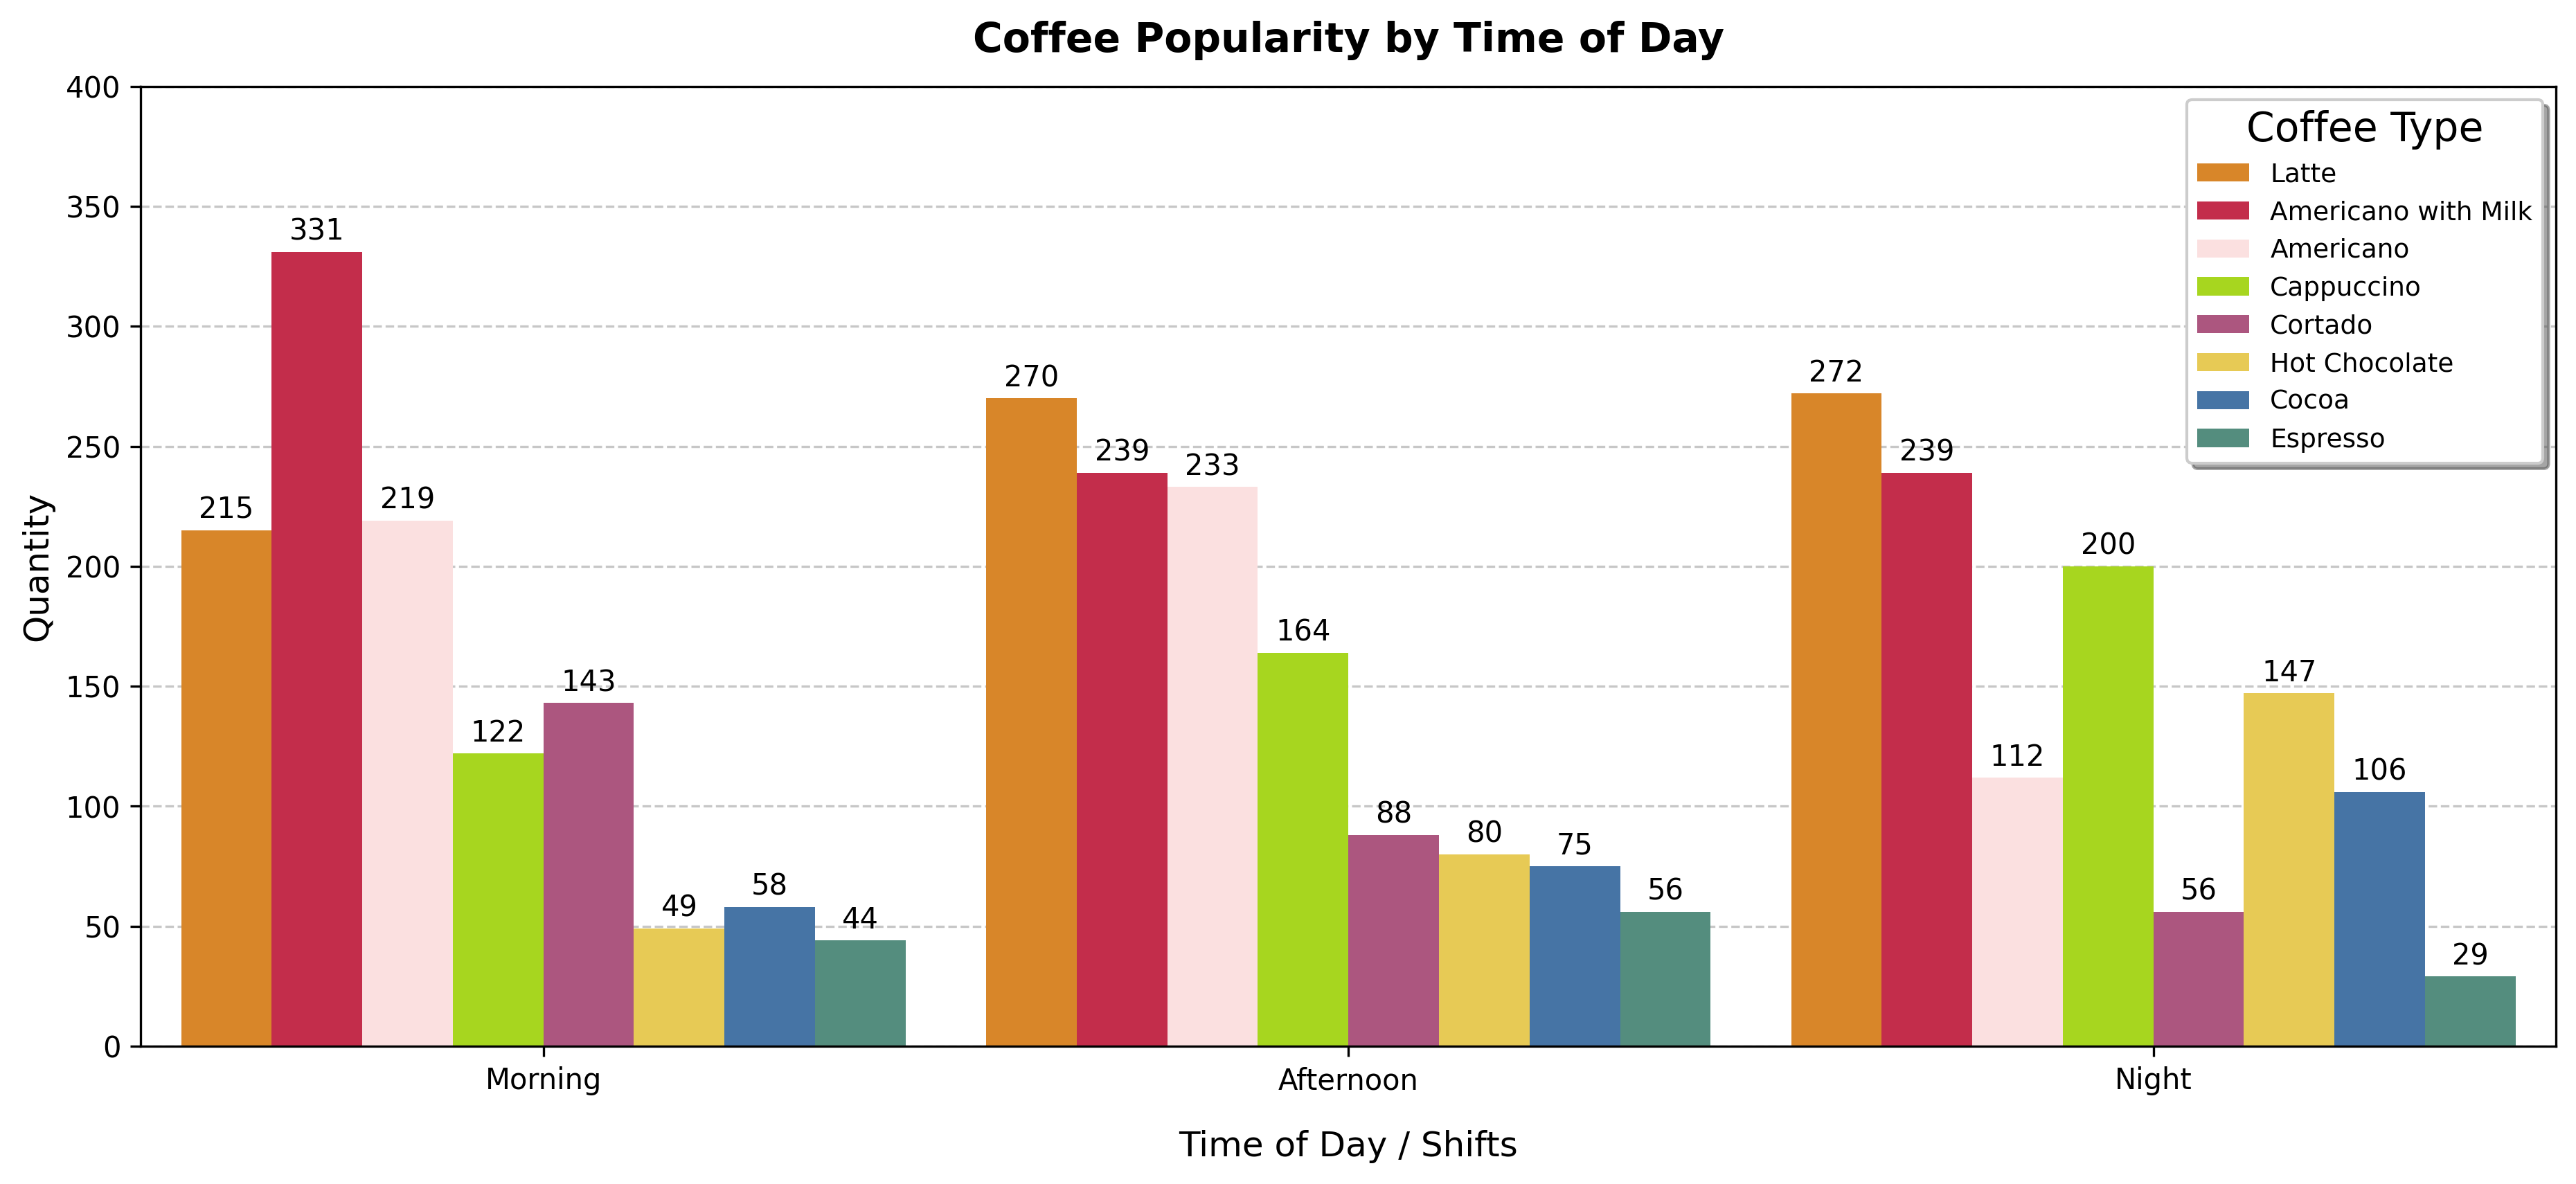

In [53]:
plt.figure(figsize=(15,6), dpi=300)
palette = ["#F5880C", "#DC143C", "#FFDCDC", "#B6F500", "#BA487F", '#FFD93D', '#3674B5', "#4A9782"]
order=['Morning','Afternoon','Night']
ax= sns.barplot(x='Time_of_Day', y='quantity', hue='coffee_name',order=order, data=pop,dodge=True,width=0.9,palette=palette)

for i in range(0,8):
    ax.bar_label(ax.containers[i],padding=2)
    
plt.xlabel("Time of Day / Shifts", fontsize=12,labelpad=12)
plt.ylabel("Quantity", fontsize=12)
plt.title("Coffee Popularity by Time of Day", fontsize=14, fontweight='bold',pad=12)
plt.legend(title='Coffee Type', title_fontsize=14,fontsize=12, loc='upper right', frameon=True, shadow=True,prop={'size': 9})
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
plt.ylim(0,400)
ax.set_axisbelow(True)
plt.show()

> ### ***In Morning, "Americano with Milk" is the most popular coffee type based on quantity.***
> ### ***In Afternoon, "Latte" is the most popular coffee type.***
> ### ***From Evening to Night, again "Latte" remains the most popular coffee type.***
> ### ***In all Time Shifts "Espresso" is consistently the least popular coffee of all time.***

### ◉ *Are there any coffee preferences on weekends vs weekdays?*

In [54]:
def daysConv(value):
    if value in ['Mon','Tue','Wed','Thu','Fri']:
        return "Weekdays"
    elif value in ['Sat','Sun']:
        return "Weekends"
days = df.groupby(['Weekday','coffee_name']).agg(count=('coffee_name','count'),money=('money','sum')).reset_index()
days['label'] = days['Weekday'].apply(daysConv)
days=days.groupby(['label','coffee_name']).agg(count=('count','sum'),money=('money','sum')).reset_index()
days['Average Price'] = days['money']/days['count']
days = days.sort_values(by=['label','count'],ascending=[True,False]).reset_index(drop=True)
days

label          coffee_name  count     money  Average Price
0   Weekdays  Americano with Milk    590  18012.38      30.529458
1   Weekdays                Latte    580  20588.90      35.498103
2   Weekdays            Americano    449  11672.70      25.997105
3   Weekdays           Cappuccino    347  12457.72      35.901210
4   Weekdays        Hot Chocolate    212   7619.34      35.940283
5   Weekdays                Cocoa    192   6855.14      35.703854
6   Weekdays              Cortado    189   4891.74      25.882222
7   Weekdays             Espresso     99   2078.08      20.990707
8   Weekends  Americano with Milk    219   6738.74      30.770502
9   Weekends                Latte    177   6286.40      35.516384
10  Weekends           Cappuccino    139   4981.42      35.837554
11  Weekends            Americano    115   2977.56      25.891826
12  Weekends              Cortado     98   2493.12      25.440000
13  Weekends        Hot Chocolate     64   2314.12      36.158125
14  Weekends                Cocoa     47   1666.02      35.447234
15  Weekends             Espresso     30    612.20      20.406667

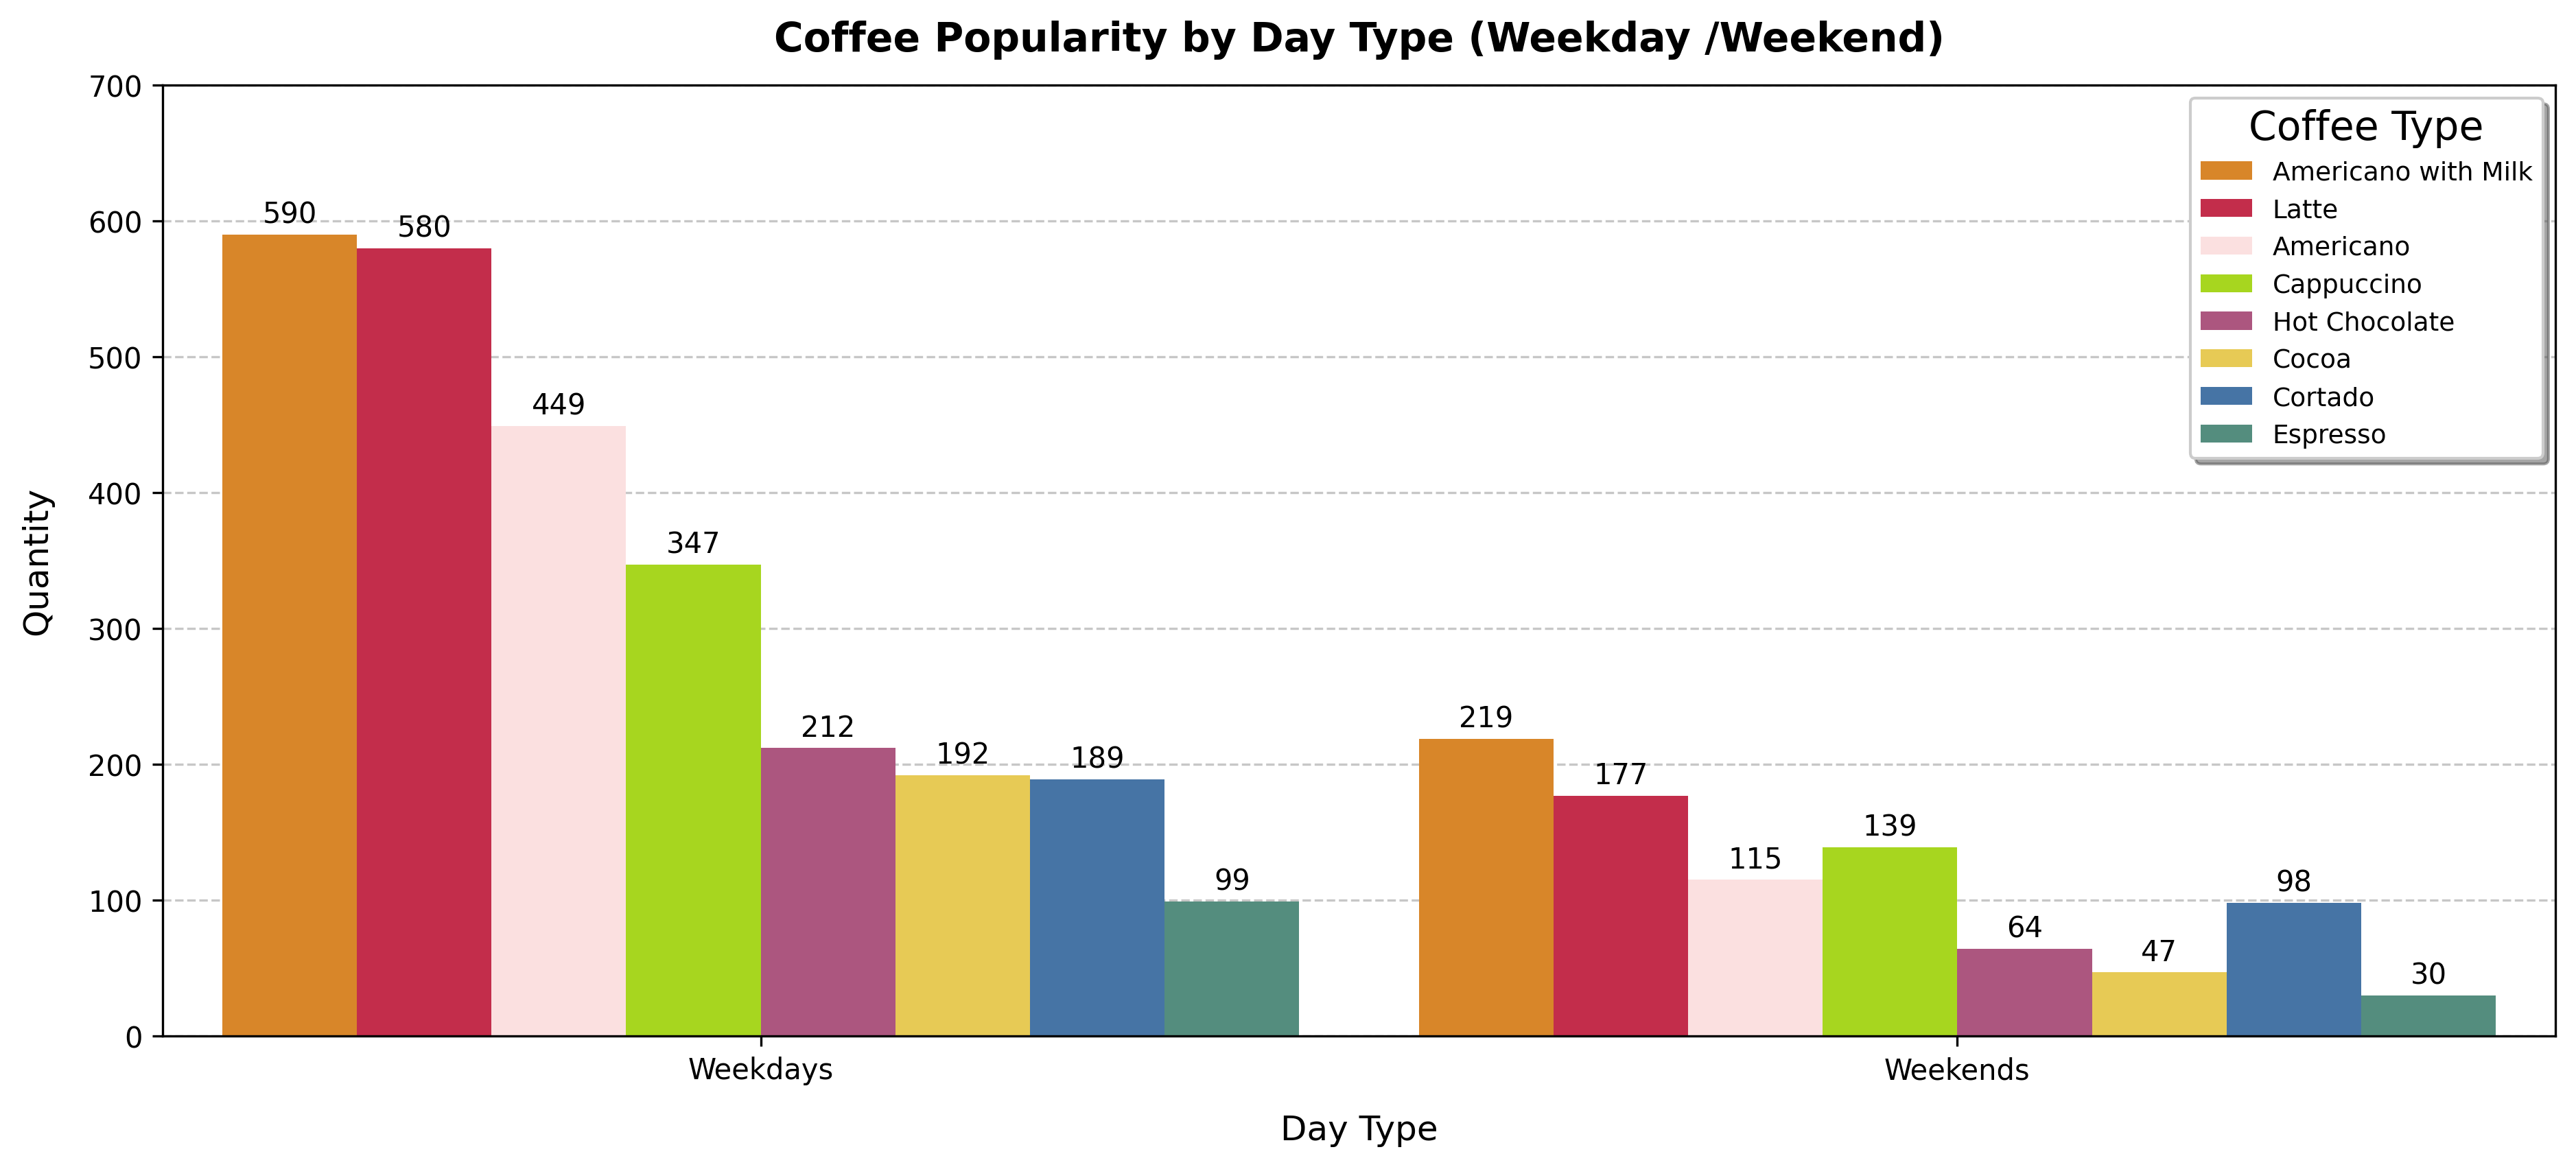

In [55]:
plt.figure(figsize=(15,6), dpi=300)
palette = ["#F5880C", "#DC143C", "#FFDCDC", "#B6F500", "#BA487F", '#FFD93D', '#3674B5', "#4A9782"]
order=['Weekdays','Weekends']
ax= sns.barplot(x='label', y='count', hue='coffee_name',order=order, data=days,dodge=True,width=0.9,palette=palette)

for i in range(0,8):
    ax.bar_label(ax.containers[i],padding=2)
    
plt.xlabel("Day Type", fontsize=12,labelpad=10)
plt.ylabel("Quantity", fontsize=12,labelpad=12)
plt.title("Coffee Popularity by Day Type (Weekday /Weekend)", fontsize=14, fontweight='bold',pad=12)
plt.legend(title='Coffee Type', title_fontsize=14,fontsize=12, loc='upper right', frameon=True, shadow=True,prop={'size': 9})
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
plt.ylim(0,700)
ax.set_axisbelow(True)
plt.show()

> ### ***There is no huge difference in weekday and weekend coffee preferences; we can see a slight increase in the sales of Cappuccino and Cortado on weekends.***
> ### ***"Americano with Milk" is the most preferred coffee type on both weekdays and weekends.***
> ### ***Following "Americano with Milk", "Latte" is the second most preferred coffee type on weekdays as well as weekends.***

### ◉ *Do customers tend to buy cheaper coffee during weekdays and expensive coffee on weekends?*

In [56]:
days_price=days.sort_values(by=['label','Average Price'],ascending=[True,False])
days_price

label          coffee_name  count     money  Average Price
4   Weekdays        Hot Chocolate    212   7619.34      35.940283
3   Weekdays           Cappuccino    347  12457.72      35.901210
5   Weekdays                Cocoa    192   6855.14      35.703854
1   Weekdays                Latte    580  20588.90      35.498103
0   Weekdays  Americano with Milk    590  18012.38      30.529458
2   Weekdays            Americano    449  11672.70      25.997105
6   Weekdays              Cortado    189   4891.74      25.882222
7   Weekdays             Espresso     99   2078.08      20.990707
13  Weekends        Hot Chocolate     64   2314.12      36.158125
10  Weekends           Cappuccino    139   4981.42      35.837554
9   Weekends                Latte    177   6286.40      35.516384
14  Weekends                Cocoa     47   1666.02      35.447234
8   Weekends  Americano with Milk    219   6738.74      30.770502
11  Weekends            Americano    115   2977.56      25.891826
12  Weekends              Cortado     98   2493.12      25.440000
15  Weekends             Espresso     30    612.20      20.406667

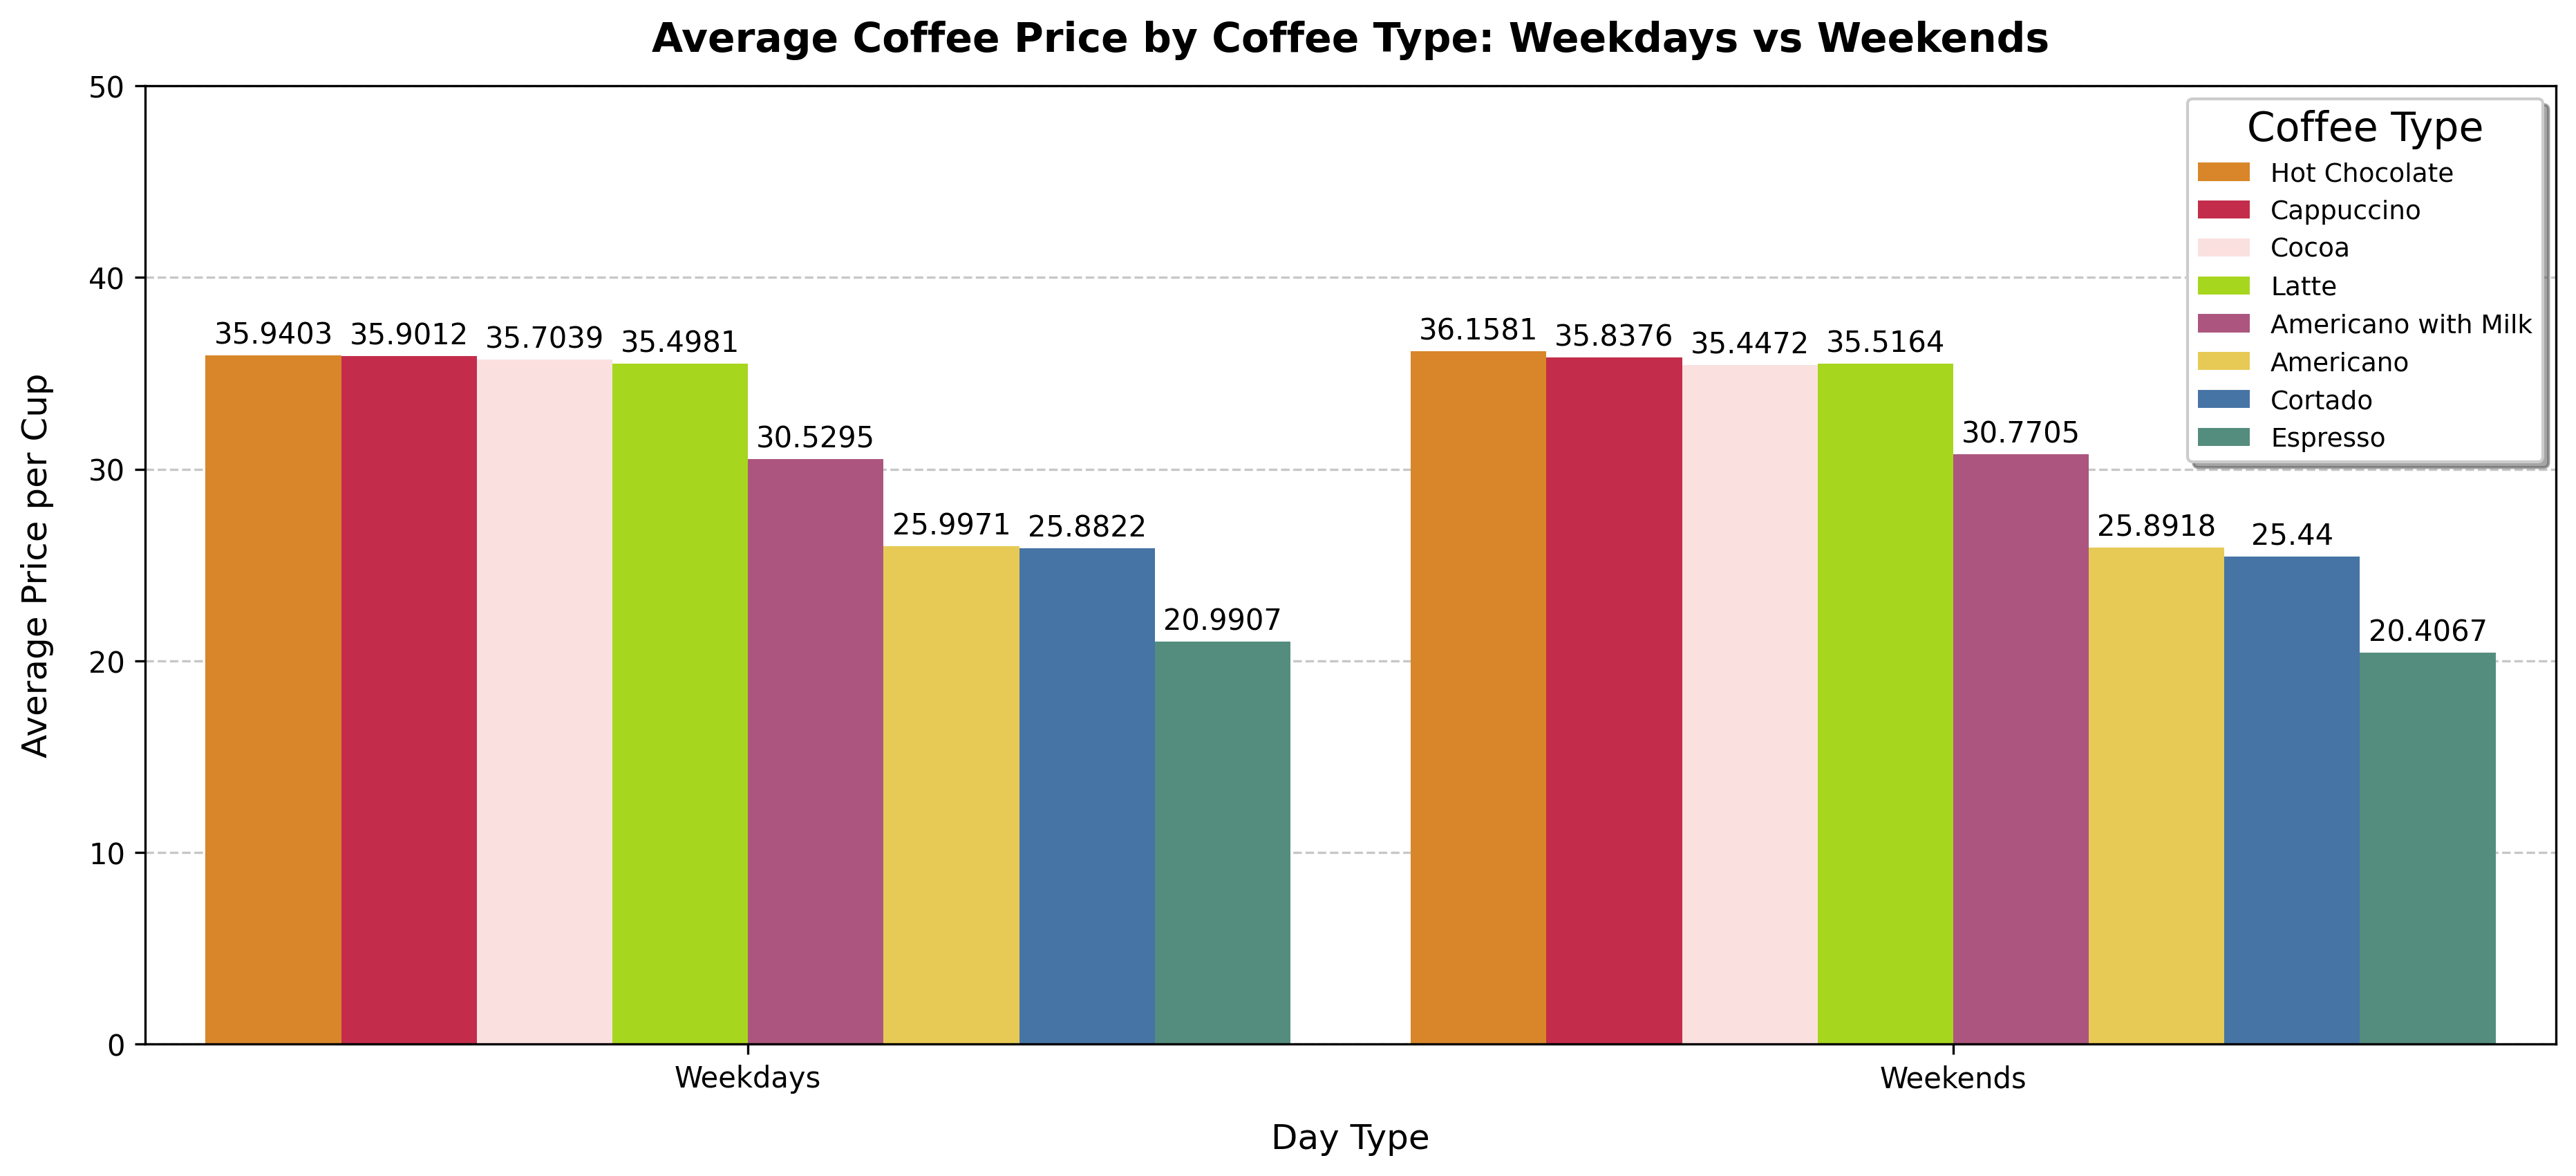

In [57]:
plt.figure(figsize=(15,6), dpi=300)
palette = ["#F5880C", "#DC143C", "#FFDCDC", "#B6F500", "#BA487F", '#FFD93D', '#3674B5', "#4A9782"]
# order=['Weekdays','Weekends']
ax= sns.barplot(x='label', y='Average Price', hue='coffee_name',order=order, data=days_price,dodge=True,width=0.9,palette=palette)

for i in range(0,8):
    ax.bar_label(ax.containers[i],padding=2)
    
plt.xlabel("Day Type", fontsize=12,labelpad=10)
plt.ylabel("Average Price per Cup", fontsize=12,labelpad=12)
plt.title("Average Coffee Price by Coffee Type: Weekdays vs Weekends", fontsize=14, fontweight='bold',pad=12)
plt.legend(title='Coffee Type', title_fontsize=14,fontsize=12, loc='upper right', frameon=True, shadow=True,prop={'size': 9})
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
plt.ylim(0,50)
ax.set_axisbelow(True)
plt.show()

> ### ***The analysis considers the average price per cup of each coffee type on weekdays and weekends.***
> ### ***Overall, there is no significant difference in average prices between the two day types.***
> ### ***A slight increase in the price of Hot Chocolate is observed on weekends.***
> ### ***This indicates that customers spend similarly on coffee regardless of whether it’s a weekday or weekend, showing a consistent spending pattern.***

### ◉ *Are certain coffee types seasonal favorites (e.g., Hot Chocolate in winter)?*

In [58]:
cByS = df[['coffee_name','Month_name','money']].copy()
cByS['season'] = cByS['Month_name'].apply(to_season)
cByS = cByS.groupby(['season','coffee_name']).agg(count=('coffee_name','count'),totalRevenue=('money','count')).reset_index()
cByS = cByS.sort_values(by=['season','count'],ascending=[True,False]).reset_index(drop=True)
cByS

season          coffee_name  count  totalRevenue
0   Autumn (Sep, Oct, Nov)                Latte    282           282
1   Autumn (Sep, Oct, Nov)  Americano with Milk    238           238
2   Autumn (Sep, Oct, Nov)           Cappuccino    111           111
3   Autumn (Sep, Oct, Nov)        Hot Chocolate    106           106
4   Autumn (Sep, Oct, Nov)            Americano    101           101
5   Autumn (Sep, Oct, Nov)              Cortado     88            88
6   Autumn (Sep, Oct, Nov)                Cocoa     76            76
7   Autumn (Sep, Oct, Nov)             Espresso     27            27
8   Spring (Mar, Apr, May)            Americano    207           207
9   Spring (Mar, Apr, May)  Americano with Milk    174           174
10  Spring (Mar, Apr, May)                Latte    169           169
11  Spring (Mar, Apr, May)           Cappuccino    146           146
12  Spring (Mar, Apr, May)        Hot Chocolate     66            66
13  Spring (Mar, Apr, May)              Cortado     63            63
14  Spring (Mar, Apr, May)                Cocoa     48            48
15  Spring (Mar, Apr, May)             Espresso     30            30
16  Summer (Jun, Jul, Aug)  Americano with Milk    203           203
17  Summer (Jun, Jul, Aug)                Latte    164           164
18  Summer (Jun, Jul, Aug)           Cappuccino    112           112
19  Summer (Jun, Jul, Aug)            Americano     87            87
20  Summer (Jun, Jul, Aug)              Cortado     73            73
21  Summer (Jun, Jul, Aug)             Espresso     38            38
22  Summer (Jun, Jul, Aug)        Hot Chocolate     31            31
23  Summer (Jun, Jul, Aug)                Cocoa     24            24
24  Winter (Dec, Jan, Feb)  Americano with Milk    194           194
25  Winter (Dec, Jan, Feb)            Americano    169           169
26  Winter (Dec, Jan, Feb)                Latte    142           142
27  Winter (Dec, Jan, Feb)           Cappuccino    117           117
28  Winter (Dec, Jan, Feb)                Cocoa     91            91
29  Winter (Dec, Jan, Feb)        Hot Chocolate     73            73
30  Winter (Dec, Jan, Feb)              Cortado     63            63
31  Winter (Dec, Jan, Feb)             Espresso     34            34

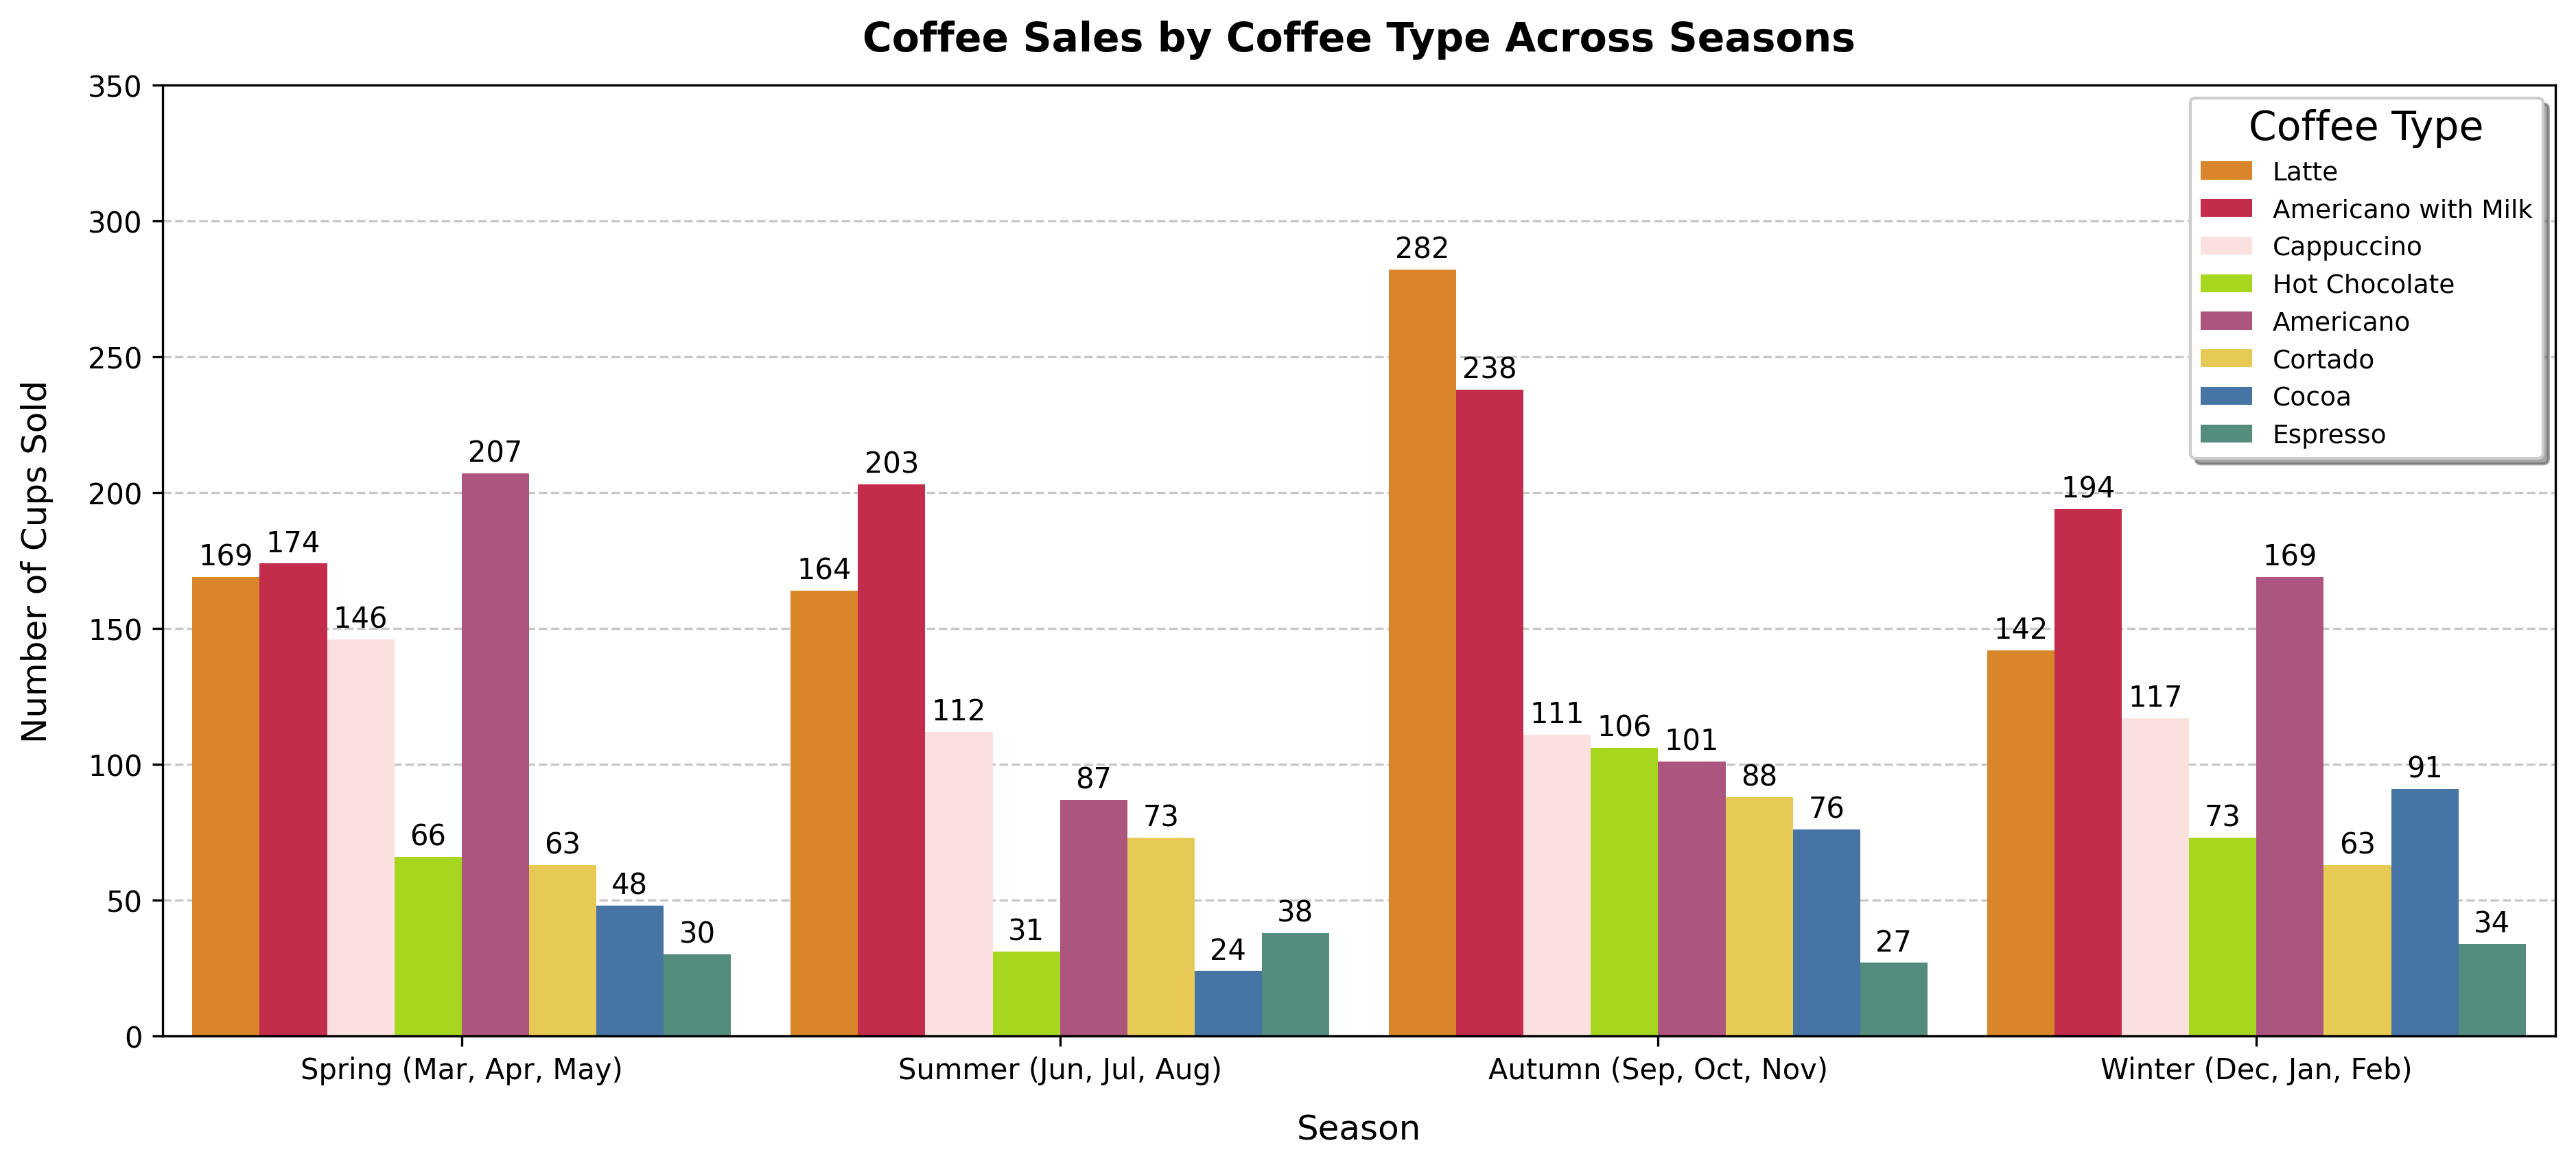

In [59]:
plt.figure(figsize=(15,6), dpi=300)
palette = ["#F5880C", "#DC143C", "#FFDCDC", "#B6F500", "#BA487F", '#FFD93D', '#3674B5', "#4A9782"]
order = ["Spring (Mar, Apr, May)", "Summer (Jun, Jul, Aug)", "Autumn (Sep, Oct, Nov)", "Winter (Dec, Jan, Feb)"]
ax= sns.barplot(x='season', y='count', hue='coffee_name',order=order,data=cByS,dodge=True,width=0.9,palette=palette)

for i in range(0,8):
    ax.bar_label(ax.containers[i],padding=2)
    
plt.xlabel("Season", fontsize=12,labelpad=10)
plt.ylabel("Number of Cups Sold", fontsize=12,labelpad=12)
plt.title("Coffee Sales by Coffee Type Across Seasons", fontsize=14, fontweight='bold',pad=12)
plt.legend(title='Coffee Type', title_fontsize=14,fontsize=12, loc='upper right', frameon=True, shadow=True,prop={'size': 9})
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
plt.ylim(0,350)
ax.set_axisbelow(True)
plt.show()

> ### ***In Spring (Mar, Apr, May), “Americano” is the most preferred coffee with 207 orders, while “Espresso” is the least favored with only 30 orders.***
> ### ***In Summer (Jun, Jul, Aug), “Americano with Milk” is the favorite coffee with 203 orders, whereas “Cocoa” is the least preferred with 24 orders.***
> ### ***In Autumn (Sep, Oct, Nov), “Latte” is the most popular coffee with 282 orders, and “Espresso” ranks the lowest with 27 orders.***
> ### ***In Winter (Dec, Jan, Feb), “Americano with Milk” remains the top choice with 194 orders, while “Espresso” continues to be the least liked with 34 orders.***
> ### ***Overall, “Espresso” is consistently the least popular coffee across all seasons, whereas “Americano with Milk” and “Latte” are the most favored choices throughout the year.***

## ***D. Coffee Type Performance :***

### ◉ *Which coffee has the highest repeat purchase trend (sold consistently across days)?*

In [60]:
Cp = df.groupby(['coffee_name','Date'])['money'].sum().reset_index()
Cp['Date'] = pd.to_datetime(Cp['Date'])
CpT = Cp.groupby(['coffee_name']).agg(day_count=('coffee_name','count'),totalMoney=('money','sum')).reset_index()
CpT=CpT.sort_values(by='day_count',ascending=False).reset_index(drop=True)
CpT

coffee_name  day_count  totalMoney
0  Americano with Milk        310    24751.12
1                Latte        302    26875.30
2           Cappuccino        252    17439.14
3            Americano        243    14650.26
4              Cortado        172     7384.86
5        Hot Chocolate        157     9933.46
6                Cocoa        138     8521.16
7             Espresso        102     2690.28

Number of Total Working Days: 381


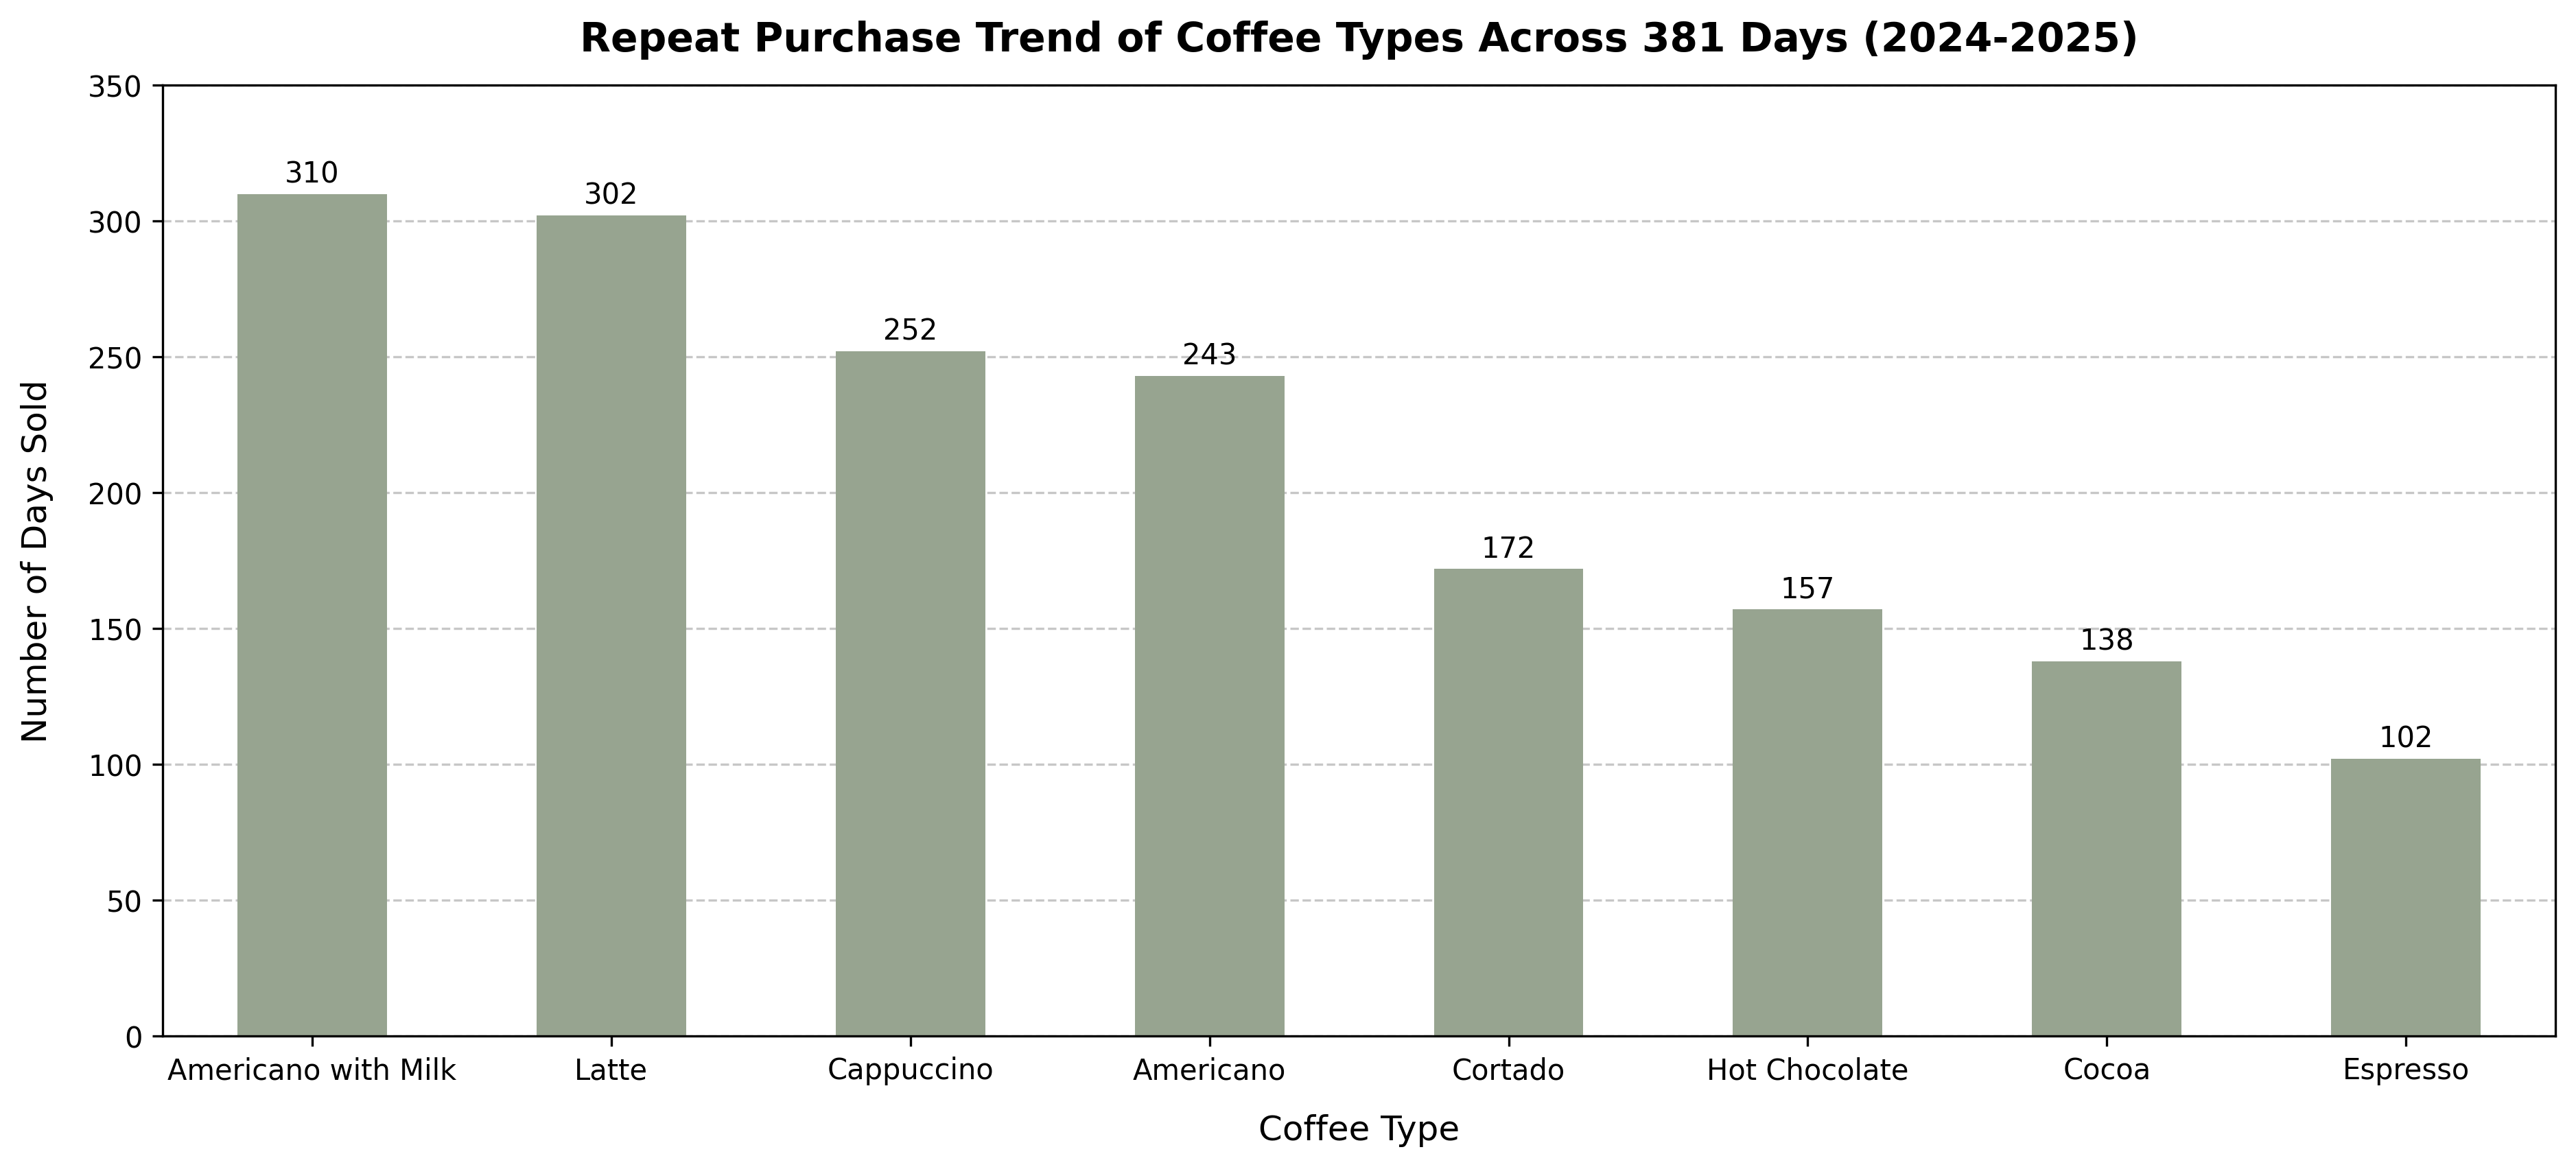

In [61]:
plt.figure(figsize=(15,6), dpi=300)
ax= sns.barplot(x='coffee_name', y='day_count',data=CpT,width=0.5,color="#96A78D")

ax.bar_label(ax.containers[0],padding=2)

plt.xlabel("Coffee Type", fontsize=12,labelpad=10)
plt.ylabel("Number of Days Sold", fontsize=12,labelpad=12)
plt.title(f"Repeat Purchase Trend of Coffee Types Across 381 Days (2024-2025)", fontsize=14, fontweight='bold',pad=12)
ax.yaxis.grid(True, linestyle="--", alpha=0.7)
plt.ylim(0,350)
ax.set_axisbelow(True)
print("Number of Total Working Days:",df['Date'].nunique())
plt.show()


> ### ***Most sold: Americano with Milk – 310 days, the top daily choice.***
> ### ***Close competitor: Latte – 302 days, strong steady demand.***
> ### ***Moderate sales: Cappuccino – 252 days, Americano – 243 days.***
> ### ***Lower sales: Cortado – 172 days, Hot Chocolate – 157 days, Cocoa – 138 days.***
> ### ***Least sold: Espresso – 102 days, least preferred.***
> ### ***Trend: Americano with Milk and Latte dominate daily purchases; others are occasional choices.***

<hr>

### Developed by  : **Siddhesh Parwade** (05/10/2025)  

[![GitHub](https://img.shields.io/badge/GitHub-SiddheshParwade-181717?logo=github&logoColor=white)](https://github.com/SiddheshParwade)  
[![LinkedIn](https://img.shields.io/badge/LinkedIn-SiddheshParwade-0A66C2?logo=linkedin&logoColor=white)](https://www.linkedin.com/in/siddheshparwade/)  
[![Email](https://img.shields.io/badge/Email-siddheshparwade%40gmail.com-D14836?logo=gmail&logoColor=white)](mailto:siddheshparwade@gmail.com)  